# GLOBAL E-COMMERCE PURCHASE AMOUNT PREDICTION USING MACHINE LEARNING PROJECT

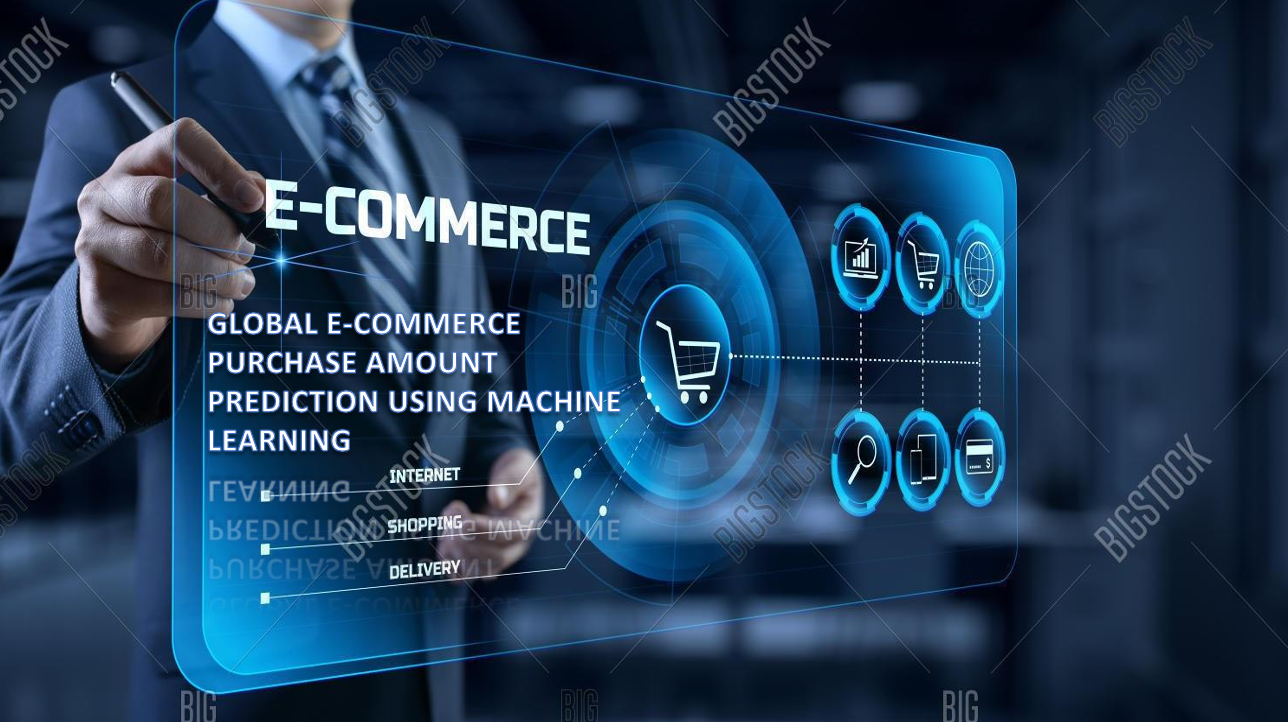

In [6]:
import IPython
from IPython.display import Image
Image('C:\\Users\\Admin\\OneDrive\\Desktop\\Global E-Commerce Data Analysis\\Project Image.png')

### About The Datasets

* This dataset contains detailed e-commerce transaction records covering customer demographics, purchasing behavior, and shopping preferences across multiple countries. It closely reflects real-world online retail activity, providing insights into the most commonly used payment methods and the countries with the highest levels of online purchasing.

### Description of Data

* Each row in this dataset represents a single transaction from a global e-commerce platform. Customer information, such as age, gender, location, and device used, is combined with purchase details, including product category, payment method, and transaction amount.
* The target variable, ReturningCustomer, indicates whether a customer made repeat purchases. This makes the dataset particularly useful for customer retention analysis and predictive modeling. Due to natural class imbalance, the dataset is also suitable for applying advanced techniques such as SMOTE, class weighting, and ensemble-based machine learning models like Random Forest and XGBoost.

### Use Cases

* Customer behavior analysis
* Retention and churn prediction
* Marketing strategy optimization
* Machine learning experimentation and portfolio projects

## 1. IMPORT PYTHON LIBRARY

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 2. IMPORT DATA SOURCES

In [173]:
ecommerce = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Global E-Commerce Data Analysis\\archive (1)\\Global_Ecommerce_Customer_Behavior.csv')

In [175]:
ecommerce.head()

CustomerID  Age  Gender   Location  \
0  3da027c0-f1fc-44e6-96af-dcf86b9755fc   56  Female      India   
1  c24726e5-9cc1-4cf4-839c-9a73e994e2c6   69  Female  Australia   
2  8ce0eed2-b53e-4b25-97c8-047035fe95ba   46    Male      India   
3  466fcfe9-aa9c-47e4-80b5-d56c1f1dc02a   32    Male      India   
4  da2cee58-ea77-41d5-81d9-0eb59d7ef33c   60    Male         UK   

  ProductCategory  PurchaseAmount PaymentMethod PurchaseDate DeviceUsed  \
0           Books          706.87        PayPal   13-05-2024     Mobile   
1     Electronics         1753.53          Cash   26-01-2024     Mobile   
2     Electronics         1239.12        PayPal   17-02-2025    Desktop   
3           Books         1455.74        PayPal   18-04-2025     Mobile   
4        Clothing         1003.83        PayPal   08-05-2024    Desktop   

  ReturningCustomer  
0                No  
1                No  
2                No  
3                No  
4               Yes

In [177]:
ecommerce.shape

# There are 10 Columns & 1,00,000 Rows

(100000, 10)

In [179]:
# The List of Columns

ecommerce.columns

Index(['CustomerID', 'Age', 'Gender', 'Location', 'ProductCategory',
       'PurchaseAmount', 'PaymentMethod', 'PurchaseDate', 'DeviceUsed',
       'ReturningCustomer'],
      dtype='object')

### 2. A Proper Arrangement of Data (ecommerce_data)

In [187]:
ecommerce_data = ecommerce[['PurchaseDate',
          'CustomerID',
          'Gender',
          'Age',
          'Location',
          'ProductCategory',
          'DeviceUsed',
          'PaymentMethod',
          'ReturningCustomer',
          'PurchaseAmount']]

In [189]:
ecommerce_data.head()

PurchaseDate                            CustomerID  Gender  Age   Location  \
0   13-05-2024  3da027c0-f1fc-44e6-96af-dcf86b9755fc  Female   56      India   
1   26-01-2024  c24726e5-9cc1-4cf4-839c-9a73e994e2c6  Female   69  Australia   
2   17-02-2025  8ce0eed2-b53e-4b25-97c8-047035fe95ba    Male   46      India   
3   18-04-2025  466fcfe9-aa9c-47e4-80b5-d56c1f1dc02a    Male   32      India   
4   08-05-2024  da2cee58-ea77-41d5-81d9-0eb59d7ef33c    Male   60         UK   

  ProductCategory DeviceUsed PaymentMethod ReturningCustomer  PurchaseAmount  
0           Books     Mobile        PayPal                No          706.87  
1     Electronics     Mobile          Cash                No         1753.53  
2     Electronics    Desktop        PayPal                No         1239.12  
3           Books     Mobile        PayPal                No         1455.74  
4        Clothing    Desktop        PayPal               Yes         1003.83

### 2. B Rename The Column in Proper

In [191]:
ecommerce_data.rename(columns={'PurchaseDate':'Purchase_Date'},inplace=True)

ecommerce_data.rename(columns={'CustomerID':'Customer_ID'},inplace=True)

ecommerce_data.rename(columns={'DeviceUsed':'Device_Used'},inplace=True)

ecommerce_data.rename(columns={'ProductCategory':'Product_Category'},inplace=True)

ecommerce_data.rename(columns={'PurchaseAmount':'Purchase_Amount'},inplace=True)

ecommerce_data.rename(columns={'PaymentMethod':'Payment_Method'},inplace=True)

ecommerce_data.rename(columns={'ReturningCustomer':'Returning_Customer'},inplace=True)

### 2. C Identifying The Data Type

In [193]:
ecommerce_data['Purchase_Date'] =  pd.to_datetime(ecommerce_data['Purchase_Date'],dayfirst=True)

### 2. D Identifying The Missing Value

In [195]:
# There is not Any Misssing Value in This Data Sets

ecommerce_data.isnull().sum()

Purchase_Date         0
Customer_ID           0
Gender                0
Age                   0
Location              0
Product_Category      0
Device_Used           0
Payment_Method        0
Returning_Customer    0
Purchase_Amount       0
dtype: int64

### 2. E Identifying Inconsistenacy Data

In [197]:
# 2 Unique Gender
ecommerce_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [199]:
# 6 Unique Location
ecommerce_data['Location'].unique()

array(['India', 'Australia', 'UK', 'Germany', 'Canada', 'USA'],
      dtype=object)

In [201]:
# 3 Unique Device
ecommerce_data['Device_Used'].unique()

array(['Mobile', 'Desktop', 'Tablet'], dtype=object)

In [203]:
# 5 Unique Product Category
ecommerce_data['Product_Category'].unique()

array(['Books', 'Electronics', 'Clothing', 'Sports', 'Home'], dtype=object)

In [205]:
# 4 Unique Payment Method
ecommerce_data['Payment_Method'].unique()

array(['PayPal', 'Cash', 'Credit Card', 'Debit Card'], dtype=object)

### 2. F Break Down the Purchase Date Into Year & Month

In [207]:
ecommerce_data.insert(loc=1,
                     column='Purchase_Year',
                     value=ecommerce_data['Purchase_Date'].dt.year)

ecommerce_data.insert(loc=2,
                     column='Purchase_Month',
                     value=ecommerce_data['Purchase_Date'].dt.month)

ecommerce_data.insert(loc=3,
                     column='Month_Name',
                     value=ecommerce_data['Purchase_Date'].dt.month_name())

### 2. G Descrptive Stastatics Analysis

In [209]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Purchase_Date       100000 non-null  datetime64[ns]
 1   Purchase_Year       100000 non-null  int32         
 2   Purchase_Month      100000 non-null  int32         
 3   Month_Name          100000 non-null  object        
 4   Customer_ID         100000 non-null  object        
 5   Gender              100000 non-null  object        
 6   Age                 100000 non-null  int64         
 7   Location            100000 non-null  object        
 8   Product_Category    100000 non-null  object        
 9   Device_Used         100000 non-null  object        
 10  Payment_Method      100000 non-null  object        
 11  Returning_Customer  100000 non-null  object        
 12  Purchase_Amount     100000 non-null  float64       
dtypes: datetime64[ns](1), float64(

In [211]:
ecommerce_data.describe(include='all')

Purchase_Date  Purchase_Year  Purchase_Month  \
count                          100000  100000.000000   100000.000000   
unique                            NaN            NaN             NaN   
top                               NaN            NaN             NaN   
freq                              NaN            NaN             NaN   
mean    2024-12-15 19:03:13.823999744    2024.459150        6.501400   
min               2023-12-17 00:00:00    2023.000000        1.000000   
25%               2024-06-17 00:00:00    2024.000000        4.000000   
50%               2024-12-17 00:00:00    2024.000000        7.000000   
75%               2025-06-15 00:00:00    2025.000000        9.000000   
max               2025-12-16 00:00:00    2025.000000       12.000000   
std                               NaN       0.537879        3.454649   

       Month_Name                           Customer_ID  Gender  \
count      100000                                100000  100000   
unique         12                                100000       2   
top       January  3da027c0-f1fc-44e6-96af-dcf86b9755fc    Male   
freq         8625                                     1   50120   
mean          NaN                                   NaN     NaN   
min           NaN                                   NaN     NaN   
25%           NaN                                   NaN     NaN   
50%           NaN                                   NaN     NaN   
75%           NaN                                   NaN     NaN   
max           NaN                                   NaN     NaN   
std           NaN                                   NaN     NaN   

                  Age Location Product_Category Device_Used Payment_Method  \
count   100000.000000   100000           100000      100000         100000   
unique            NaN        6                5           3              4   
top               NaN       UK            Books      Tablet    Credit Card   
freq              NaN    16859            20150       33522          25239   
mean        43.500270      NaN              NaN         NaN            NaN   
min         18.000000      NaN              NaN         NaN            NaN   
25%         31.000000      NaN              NaN         NaN            NaN   
50%         43.000000      NaN              NaN         NaN            NaN   
75%         56.000000      NaN              NaN         NaN            NaN   
max         69.000000      NaN              NaN         NaN            NaN   
std         14.970933      NaN              NaN         NaN            NaN   

       Returning_Customer  Purchase_Amount  
count              100000    100000.000000  
unique                  2              NaN  
top                    No              NaN  
freq                70191              NaN  
mean                  NaN      1002.547118  
min                   NaN        10.020000  
25%                   NaN       502.755000  
50%                   NaN      1002.725000  
75%                   NaN      1499.670000  
max                   NaN      2000.000000  
std                   NaN       574.990256

## 3. OUTLIER DETECTION

### 3.A Outlier Detection Of Age

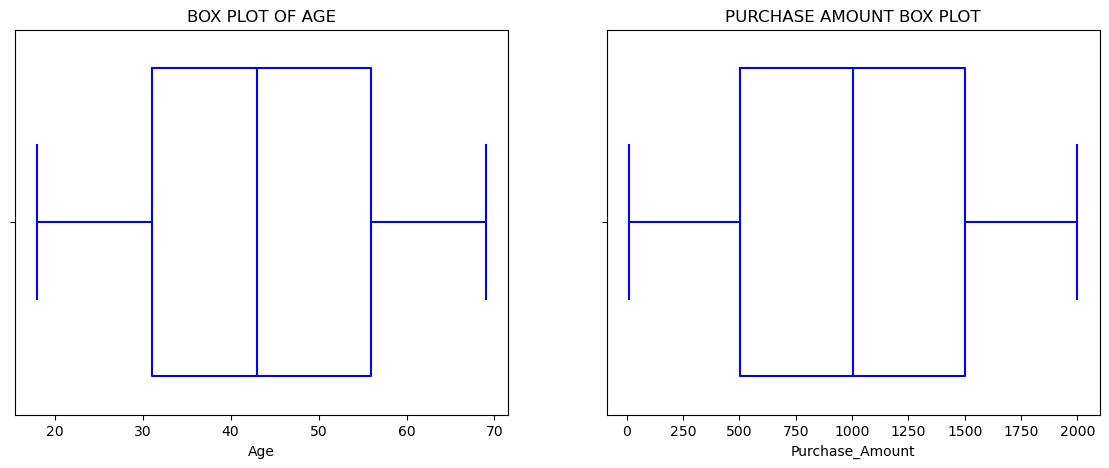

In [215]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(data=ecommerce_data,x=ecommerce_data['Age'],color='blue',fill=False)
plt.title('BOX PLOT OF AGE')

plt.subplot(1,2,2)
sns.boxplot(data=ecommerce_data,x=ecommerce_data['Purchase_Amount'],color='Blue',fill=False)
plt.title('PURCHASE AMOUNT BOX PLOT')
plt.show()

### Executive Summary :-

* The age data shows a balanced and stable distribution with no extreme outliers. Most customers fall within the working-age segment (approx. 30–55 years), indicating a consistent and reliable core customer base without abnormal age-driven risk.
* Purchase values exhibit a wide spread, reflecting diverse spending behavior. While higher purchase amounts are present, they remain within expected business limits, suggesting premium or high-value customers rather than anomalies.

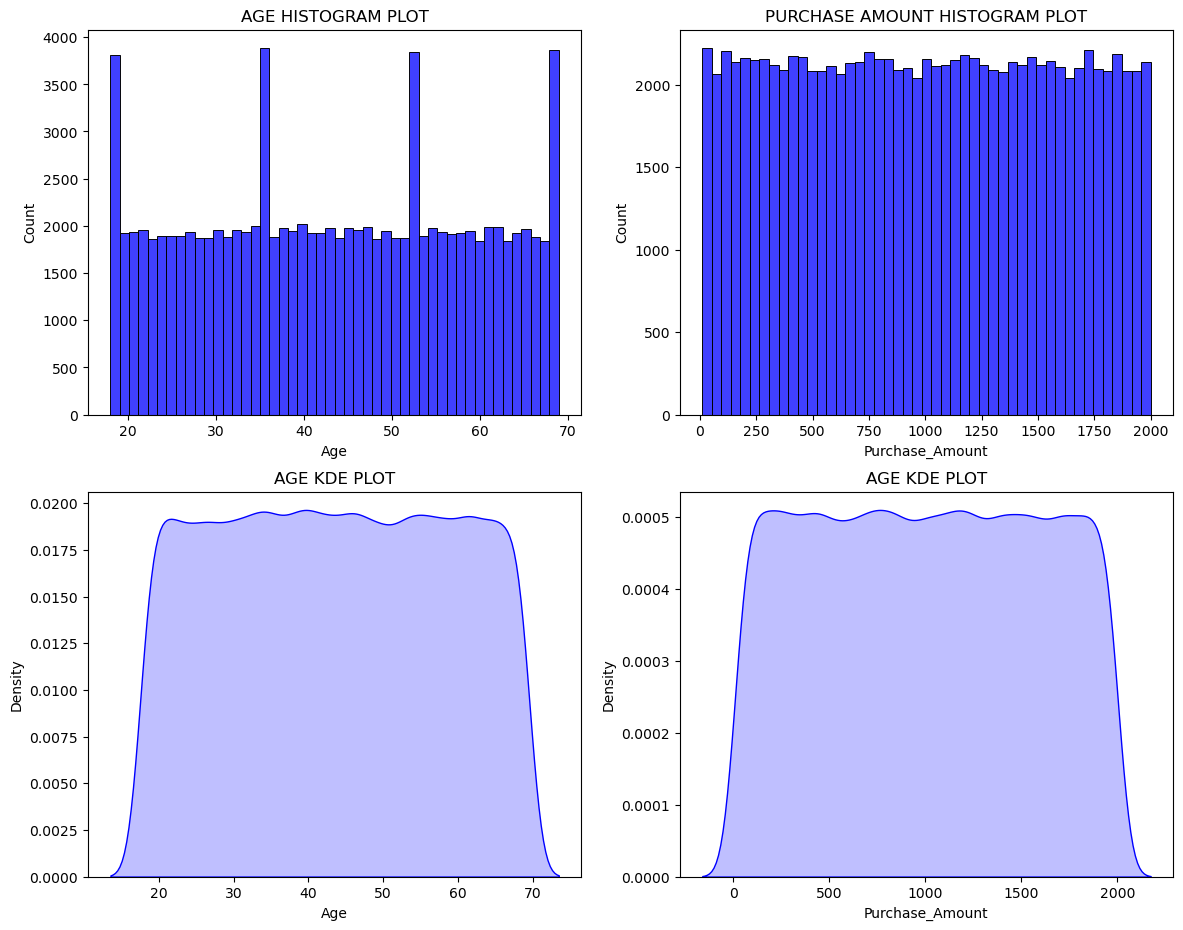

In [217]:
plt.figure(figsize=(14,11))

plt.subplot(2,2,1)
sns.histplot(data=ecommerce_data,x=ecommerce_data['Age'],color='blue')
plt.title('AGE HISTOGRAM PLOT')

plt.subplot(2,2,2)
sns.histplot(data=ecommerce_data,x=ecommerce_data['Purchase_Amount'],color='blue')
plt.title('PURCHASE AMOUNT HISTOGRAM PLOT')

plt.subplot(2,2,3)
sns.kdeplot(data=ecommerce_data,x=ecommerce_data['Age'],color='blue',fill=True)
plt.title('AGE KDE PLOT')

plt.subplot(2,2,4)
sns.kdeplot(data=ecommerce_data,x=ecommerce_data['Purchase_Amount'],color='blue',fill=True)
plt.title('AGE KDE PLOT')
plt.show()

### Executive Summary :-

* The age distribution is broad and evenly spread (18–70 years), with no abnormal concentration or extreme outliers. This indicates a diverse and balanced customer base, reducing dependency on any single age segment.
* Purchase amounts are widely distributed across low to high values, with a stable density across the range. High-value purchases are consistent and expected, not anomalies—highlighting the presence of premium and value-driven customers.

## 4. EXPLORATORY DATA ANALYSIS (EDA) - (Eecommerce_data)

In [219]:
import warnings
warnings.filterwarnings('ignore')

### 4.A Time Based Variables (Trend Analysis)

* Which Year have the highest Order Placed ?
* Which Year have the highest Sales ?
* Which Month have the highest Order Placed ?
* Which months have the highest sales?
* Any seasonal spikes?
* Trend consistency over time?
* Are we growing or declining over time?
(Revenue, orders, customers – MoM / YoY trend)
* Which months drive the highest revenue and which hurt performance?
(Seasonality & peak vs off-season)
* Is growth coming from more customers or higher spending per customer?
(Volume vs value analysis)
* Do customer purchase behaviors change across seasons?
(Festival periods, discounts, year-end effects)
* Are returning customers increasing over time?
(Retention trend & loyalty strength)
* Which time periods show abnormal spikes or drops—and why?
(Campaign impact, supply issues, market events)
* How stable is our revenue month-to-month?
(Volatility & predictability of cash flows)
* Are recent trends sustainable or short-term fluctuations?
(Structural growth vs temporary lift)
* How does performance this year compare to last year at the same time?
(Like-for-like YoY benchmarking)
* Based on historical trends, what should we expect next quarter?
(Forecasting & strategic planning)

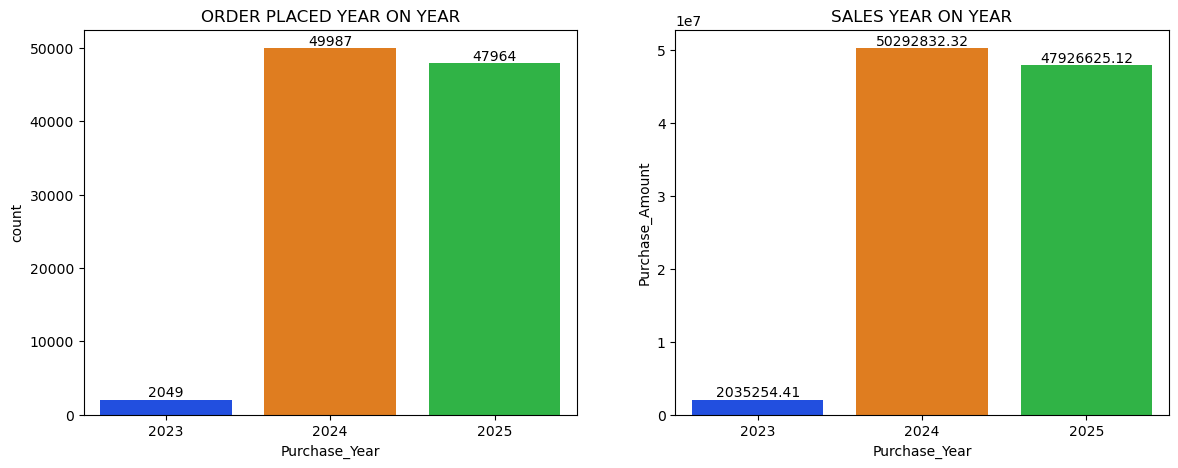

In [221]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=ecommerce_data['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year'),
           x=ecommerce_data['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['Purchase_Year'],
           y=ecommerce_data['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count'],palette='bright')
for i,j in enumerate(ecommerce_data['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('ORDER PLACED YEAR ON YEAR')

plt.subplot(1,2,2)
sns.barplot(data=ecommerce_data.groupby(by='Purchase_Year').agg({'Purchase_Amount':'sum'}).reset_index(),
           x=ecommerce_data.groupby(by='Purchase_Year').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Year'],
           y=ecommerce_data.groupby(by='Purchase_Year').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],palette='bright')
for i,j,in enumerate(ecommerce_data.groupby(by='Purchase_Year').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('SALES YEAR ON YEAR')
plt.show()

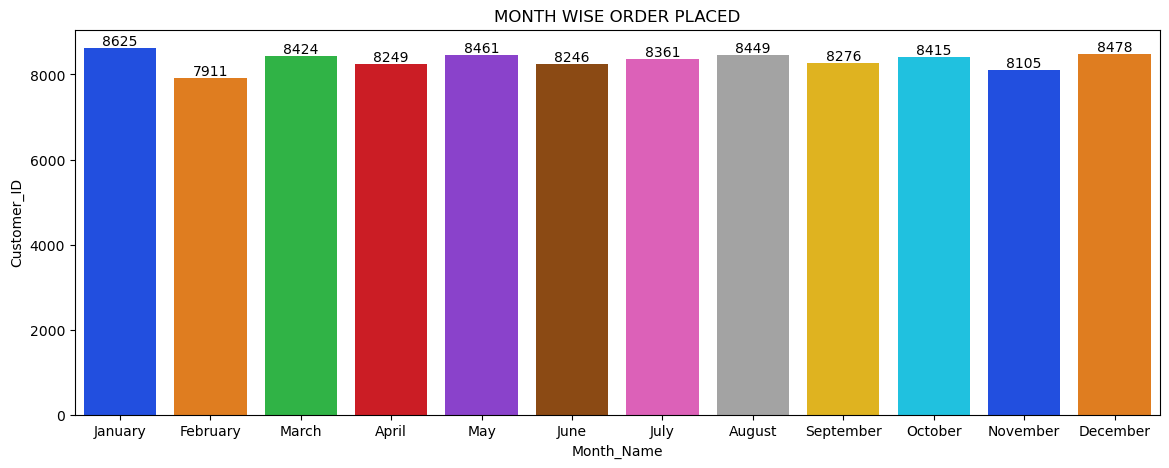

In [223]:
plt.figure(figsize=(14,5))
sns.barplot(data=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index(),
           x=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Month_Name'],
           y=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],palette='bright')
for i,j in enumerate(ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('MONTH WISE ORDER PLACED')
plt.show()

### Executive Suumary :-

* Monthly order volumes remain consistently strong, ranging roughly between 7.9K and 8.6K orders, indicating predictable and resilient customer demand with no sharp seasonal drop-offs.
* January, May, August, and December emerge as high-performing months, suggesting the impact of new-year demand, mid-year momentum, and year-end purchasing behavior.
* February and November show slightly lower order volumes, presenting opportunities for targeted promotions or campaign-driven demand stimulation.

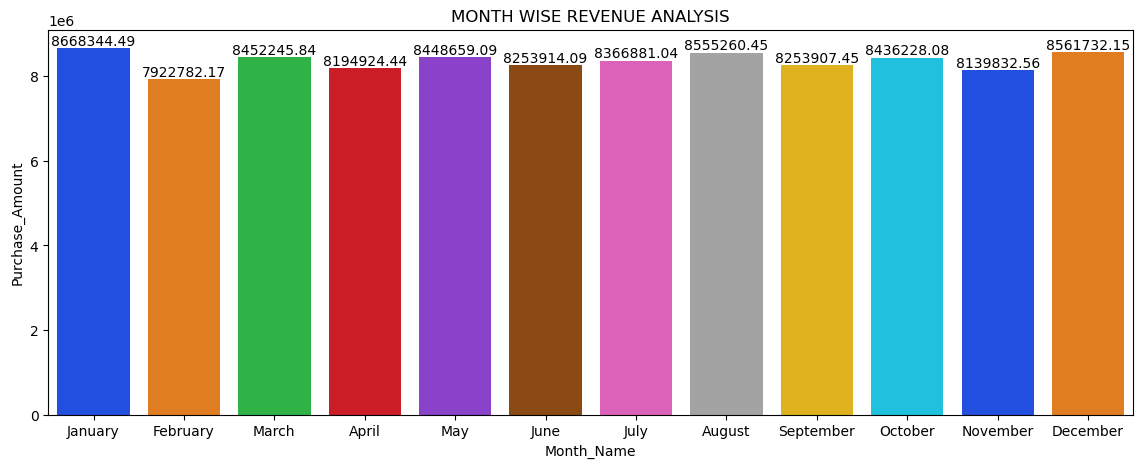

In [225]:
plt.figure(figsize=(14,5))
sns.barplot(data=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index(),
           x=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Month_Name'],
           y=ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],palette='bright')
for i,j in enumerate(ecommerce_data.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('MONTH WISE REVENUE ANALYSIS')
plt.show()

### Executive Summary :-

* Monthly revenue remains strong and stable, ranging approximately between 7.9M and 8.7M, indicating a predictable and resilient revenue engine with limited volatility.
* January, March, May, August, and December emerge as high-revenue months, reflecting the combined impact of seasonal demand, promotional activity, and higher customer spend.
* February records the lowest revenue, highlighting a post-holiday demand dip and an opportunity for targeted promotions to smooth revenue continuity.

### 4.B Year Wise Monthly Sales & Revenue Analysis (2023,2023 & 2025)

* ecommerce_2023
* ecommerce_2024
* ecommerce_2025

In [227]:
ecommerce_2023 = ecommerce_data[ecommerce_data['Purchase_Year'] == 2023]
ecommerce_2023 = ecommerce_2023.reset_index(drop='index')

In [229]:
ecommerce_2023.head()

Purchase_Date  Purchase_Year  Purchase_Month Month_Name  \
0    2023-12-29           2023              12   December   
1    2023-12-31           2023              12   December   
2    2023-12-21           2023              12   December   
3    2023-12-18           2023              12   December   
4    2023-12-31           2023              12   December   

                            Customer_ID  Gender  Age   Location  \
0  1f8c12db-097e-4ab3-bffb-e60d9d842925    Male   47  Australia   
1  02f440d2-d238-4c0b-99d5-9cef647ffbf6  Female   25    Germany   
2  dd8d6f99-d9a4-4fc4-be1e-59f7a856ef8e    Male   69    Germany   
3  004564c1-3bb6-41a5-b411-620710794521    Male   56         UK   
4  117d058e-fb2f-407e-b622-60724c08d8f2    Male   29        USA   

  Product_Category Device_Used Payment_Method Returning_Customer  \
0            Books      Mobile    Credit Card                 No   
1      Electronics      Tablet           Cash                Yes   
2            Books      Tablet     Debit Card                 No   
3           Sports      Mobile         PayPal                 No   
4           Sports      Mobile           Cash                 No   

   Purchase_Amount  
0           587.63  
1          1099.06  
2          1055.82  
3          1407.02  
4           335.43

In [231]:
ecommerce_2023.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()

Purchase_Month Month_Name  Purchase_Amount
0              12   December       2035254.41

### Executive Summary :-

* December records a total purchase amount of ~2.04 million, making it the highest revenue-contributing month in the period analyzed.
* The strong December performance clearly indicates year-end / festive-driven purchasing behavior, where customers demonstrate higher spend per transaction, not just higher order volume.

In [233]:
ecommerce_2024 = ecommerce_data[ecommerce_data['Purchase_Year'] == 2024]
ecommerce_2024 = ecommerce_2024.reset_index(drop='index')

In [235]:
ecommerce_2024.head()

Purchase_Date  Purchase_Year  Purchase_Month Month_Name  \
0    2024-05-13           2024               5        May   
1    2024-01-26           2024               1    January   
2    2024-05-08           2024               5        May   
3    2024-03-20           2024               3      March   
4    2024-11-08           2024              11   November   

                            Customer_ID  Gender  Age   Location  \
0  3da027c0-f1fc-44e6-96af-dcf86b9755fc  Female   56      India   
1  c24726e5-9cc1-4cf4-839c-9a73e994e2c6  Female   69  Australia   
2  da2cee58-ea77-41d5-81d9-0eb59d7ef33c    Male   60         UK   
3  f82c0f28-c4fb-43e6-9aee-62bc26631e20    Male   38     Canada   
4  14b5d897-85f2-4ed0-8b63-e1195b2dac98  Female   56      India   

  Product_Category Device_Used Payment_Method Returning_Customer  \
0            Books      Mobile         PayPal                 No   
1      Electronics      Mobile           Cash                 No   
2         Clothing     Desktop         PayPal                Yes   
3             Home      Tablet     Debit Card                 No   
4           Sports     Desktop           Cash                Yes   

   Purchase_Amount  
0           706.87  
1          1753.53  
2          1003.83  
3            56.21  
4            10.30

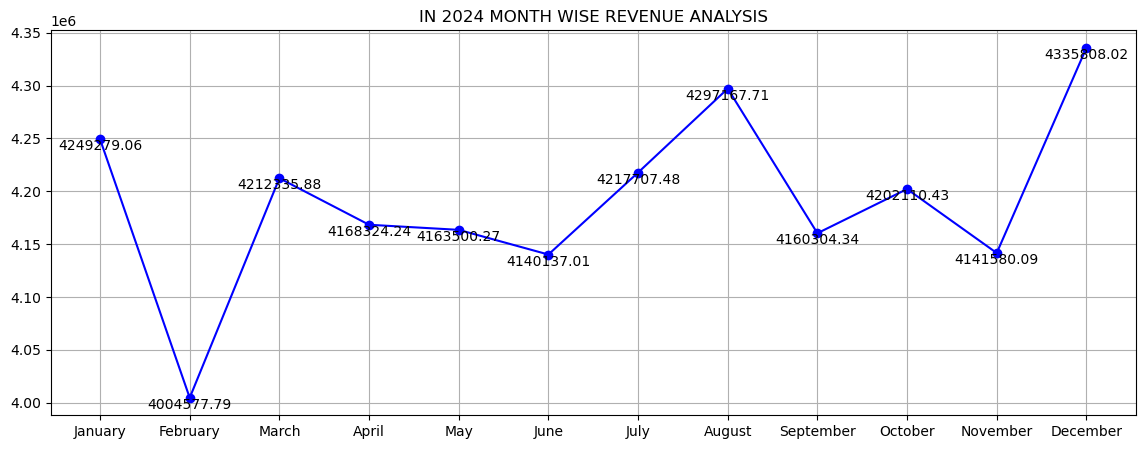

In [237]:
plt.figure(figsize=(14,5))
plt.plot(ecommerce_2024.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Month_Name'],
        ecommerce_2024.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],color='blue',
         marker='o')
for i,j in enumerate(ecommerce_2024.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='top')
plt.grid()
plt.title('IN 2024 MONTH WISE REVENUE ANALYSIS')
plt.show()

In [239]:
ecommerce_2025 = ecommerce_data[ecommerce_data['Purchase_Year'] == 2025]
ecommerce_2025 = ecommerce_2025.reset_index(drop='index')

In [243]:
ecommerce_2025.head()

Purchase_Date  Purchase_Year  Purchase_Month Month_Name  \
0    2025-02-17           2025               2   February   
1    2025-04-18           2025               4      April   
2    2025-08-02           2025               8     August   
3    2025-06-30           2025               6       June   
4    2025-04-25           2025               4      April   

                            Customer_ID  Gender  Age Location  \
0  8ce0eed2-b53e-4b25-97c8-047035fe95ba    Male   46    India   
1  466fcfe9-aa9c-47e4-80b5-d56c1f1dc02a    Male   32    India   
2  2073f698-8b8a-4c89-8f32-1497160af506    Male   25  Germany   
3  b89da5ba-8d2d-485b-8e16-488881d43594  Female   36  Germany   
4  cda2f566-1d2f-4e86-9d2c-fbc6aa98dc92    Male   40    India   

  Product_Category Device_Used Payment_Method Returning_Customer  \
0      Electronics     Desktop         PayPal                 No   
1            Books      Mobile         PayPal                 No   
2           Sports      Mobile    Credit Card                 No   
3            Books      Mobile           Cash                 No   
4         Clothing     Desktop           Cash                Yes   

   Purchase_Amount  
0          1239.12  
1          1455.74  
2           580.71  
3           377.02  
4           443.77

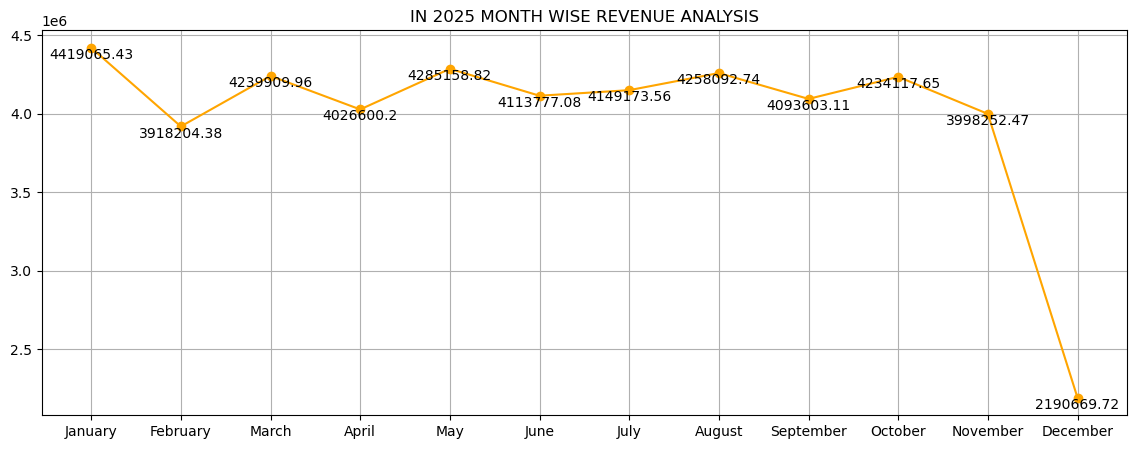

In [245]:
plt.figure(figsize=(14,5))
plt.plot(ecommerce_2025.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Month_Name'],
        ecommerce_2025.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],color='orange',
         marker='o')
for i,j in enumerate(ecommerce_2025.groupby(by=['Purchase_Month','Month_Name']).agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='top')
plt.grid()
plt.title('IN 2025 MONTH WISE REVENUE ANALYSIS')
plt.show()

### 4.C Customer Demographic Analysis

* Who are our most valuable customers?
(High revenue, high frequency, high lifetime value)
* Are we acquiring the right customers—or just more customers?
(Quality of acquisition vs volume)
* How does customer behavior differ between new and returning customers?
(Retention impact on revenue)
* Which customer segments drive the majority of our revenue?
(Pareto analysis: top 20% contribution)
* How loyal are our customers, and is loyalty improving over time?
(Repeat rate, churn trends)
* What factors most influence customer spending?
(Age, location, device, category, payment method)
* Where are we losing customers—and why?
(Drop-off points, churn signals)
* How price-sensitive are our customers?
(Discount dependency, basket size changes)
* Which customer segments offer the highest future growth potential?
(Emerging cohorts, CLV forecasting)
* What actions will most improve customer lifetime value?
(Personalization, cross-sell, retention strategies)

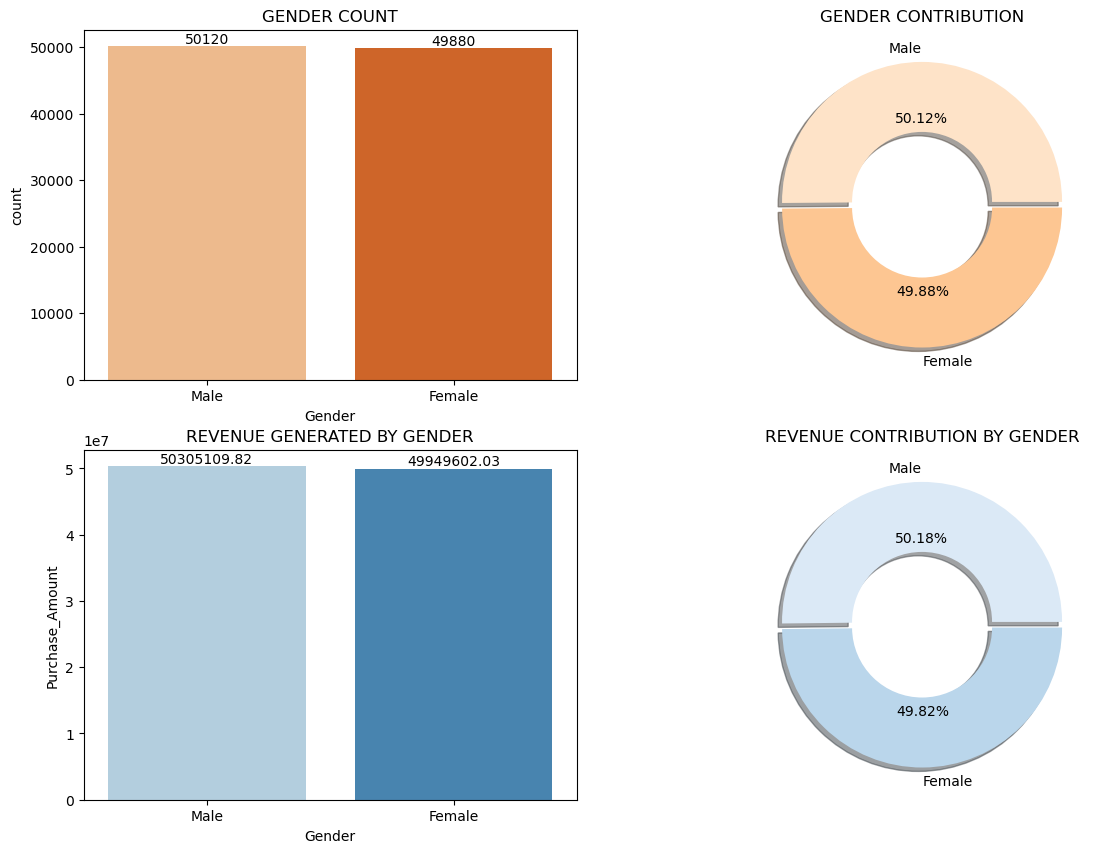

In [247]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.barplot(data=ecommerce_data['Gender'].value_counts().reset_index(),
           x=ecommerce_data['Gender'].value_counts().reset_index()['Gender'],
           y=ecommerce_data['Gender'].value_counts().reset_index()['count'],palette='Oranges')
for i,j in enumerate(ecommerce_data['Gender'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('GENDER COUNT')

plt.subplot(2,2,2)
plt.pie(ecommerce_data['Gender'].value_counts().reset_index()['count'],explode=[0.02,0.02],shadow=True,autopct='%1.2F%%',
        colors=sns.color_palette('Oranges'),wedgeprops={'width':0.5},
        labels=ecommerce_data['Gender'].value_counts().reset_index()['Gender'])
plt.title('GENDER CONTRIBUTION')

plt.subplot(2,2,3)
sns.barplot(data=ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False),
           x=ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Gender'],
           y=ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount'],
           palette='Blues')
for i,j in enumerate(ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('REVENUE GENERATED BY GENDER')

plt.subplot(2,2,4)
plt.pie(ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount'],
        explode=[0.02,0.02],wedgeprops={'width':0.5},colors=sns.color_palette('Blues'),shadow=True,
       autopct='%1.2f%%',
        labels=ecommerce_data.groupby(by='Gender').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Gender'])
plt.title('REVENUE CONTRIBUTION BY GENDER')
plt.show()

### Executive Summary :-

* The platform has a near-equal gender split (Male 50.1%, Female 49.9%), indicating broad market appeal with no dependency on a single segment.
* Revenue contribution mirrors customer distribution (Male ~50.2%, Female ~49.8%), suggesting similar purchasing power and engagement across genders.
* Growth should be driven by product, experience, and personalization strategies rather than gender-specific pricing or targeting, as both segments perform equally well.

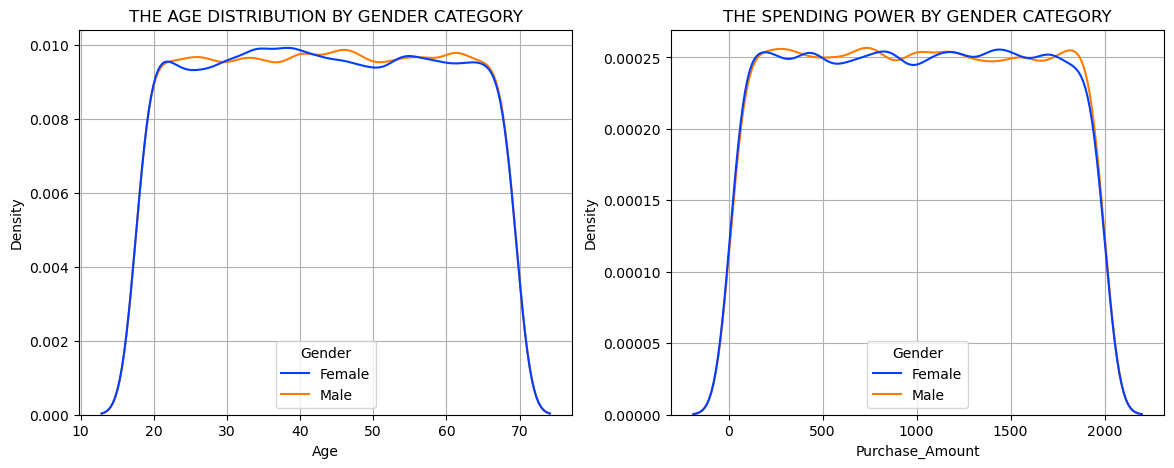

In [249]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(data=ecommerce_data,x=ecommerce_data['Age'],hue=ecommerce_data['Gender'],palette='bright')
plt.grid()
plt.title('THE AGE DISTRIBUTION BY GENDER CATEGORY')

plt.subplot(1,2,2)
sns.kdeplot(data=ecommerce_data,x=ecommerce_data['Purchase_Amount'],hue=ecommerce_data['Gender'],palette='bright')
plt.grid()
plt.title('THE SPENDING POWER BY GENDER CATEGORY')
plt.show()

### Executive Summary :-

* Male and female customers show almost identical age distributions, concentrated in the economically active 20–60 year segment, ensuring a stable and scalable customer base.
* Purchase amount distributions overlap significantly for both genders, indicating no meaningful difference in average spend or spending behavior.
* Revenue is not driven by a narrow age–gender cohort, reducing dependency risk and improving demand resilience.
* Focus growth on life-stage and value-based segmentation (e.g., affordability vs. premium, frequency, loyalty) rather than gender-specific campaigns, as both demographics behave similarly in age and spending.

### 4.D Customer Summary Analysis (ecommerce_customer_summary)

In [251]:
ecommerce_customer_summary = pd.crosstab(index=ecommerce_data['Location'], 
           columns=ecommerce_data['Gender']).reset_index()
ecommerce_customer_summary = ecommerce_customer_summary.rename_axis(columns={'Gender':'index'})

In [253]:
ecommerce_customer_summary.insert(loc=3,
                                 column='Avg_Age',
                                 value=ecommerce_data.groupby(by='Location').agg({'Age':'mean'}).reset_index()['Age'])

In [255]:
ecommerce_customer_summary['Avg_Age'] = ecommerce_customer_summary['Avg_Age'].round(0)

ecommerce_customer_summary['Avg_Age'] = ecommerce_customer_summary['Avg_Age'].astype('int')

In [257]:
ecommerce_customer_summary.insert(loc=4,
                                 column='Desktop',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Device_Used']).reset_index()['Desktop'])

ecommerce_customer_summary.insert(loc=5,
                                 column='Mobile',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Device_Used']).reset_index()['Mobile'])

ecommerce_customer_summary.insert(loc=6,
                                 column='Tablet',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Device_Used']).reset_index()['Tablet'])

In [259]:
ecommerce_customer_summary.insert(loc=7,
                                 column='Books',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Product_Category']).reset_index()['Books'])

ecommerce_customer_summary.insert(loc=8,
                                 column='Clothing',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Product_Category']).reset_index()['Clothing'])

ecommerce_customer_summary.insert(loc=9,
                                 column='Electronics',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Product_Category']).reset_index()['Electronics'])

ecommerce_customer_summary.insert(loc=10,
                                 column='Home',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Product_Category']).reset_index()['Home'])

ecommerce_customer_summary.insert(loc=11,
                                 column='Sports',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Product_Category']).reset_index()['Sports'])

In [261]:
ecommerce_customer_summary.insert(loc=12,
                                 column='Revenue',
                                 value=ecommerce_data.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'])

In [263]:
ecommerce_customer_summary.insert(loc=13,
                                 column='Cash',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Payment_Method']).reset_index()['Cash'])

ecommerce_customer_summary.insert(loc=14,
                                 column='Credit Card',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Payment_Method']).reset_index()['Credit Card'])

ecommerce_customer_summary.insert(loc=15,
                                 column='Debit Card',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Payment_Method']).reset_index()['Debit Card'])

ecommerce_customer_summary.insert(loc=16,
                                 column='PayPal',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Payment_Method']).reset_index()['PayPal'])

In [265]:
ecommerce_customer_summary.insert(loc=17,
                                 column='Yes',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Returning_Customer']).reset_index()['Yes'])

ecommerce_customer_summary.insert(loc=18,
                                 column='No',
                                 value=pd.crosstab(index=ecommerce_data['Location'],
           columns=ecommerce_data['Returning_Customer']).reset_index()['No'])

In [267]:
ecommerce_customer_summary

index   Location  Female  Male  Avg_Age  Desktop  Mobile  Tablet  Books  \
0      Australia    8333  8270       43     5563    5504    5536   3349   
1         Canada    8321  8348       43     5494    5572    5603   3352   
2        Germany    8189  8479       43     5520    5502    5646   3374   
3          India    8286  8348       43     5517    5565    5552   3347   
4             UK    8489  8370       44     5645    5546    5668   3374   
5            USA    8262  8305       44     5557    5493    5517   3354   

index  Clothing  Electronics  Home  Sports      Revenue  Cash  Credit Card  \
0          3215         3385  3388    3266  16519942.37  4238         4216   
1          3303         3327  3337    3350  16669579.68  4158         4208   
2          3336         3327  3333    3298  16799268.59  4242         4216   
3          3347         3350  3302    3288  16653806.49  4193         4216   
4          3356         3382  3387    3360  16849431.73  4165         4214   
5          3327         3299  3301    3286  16762682.99  4166         4169   

index  Debit Card  PayPal   Yes     No  
0            4028    4121  4939  11664  
1            4178    4125  5008  11661  
2            4101    4109  4941  11727  
3            4090    4135  5001  11633  
4            4180    4300  5028  11831  
5            4165    4067  4892  11675

### 4. E Location Wise Customer

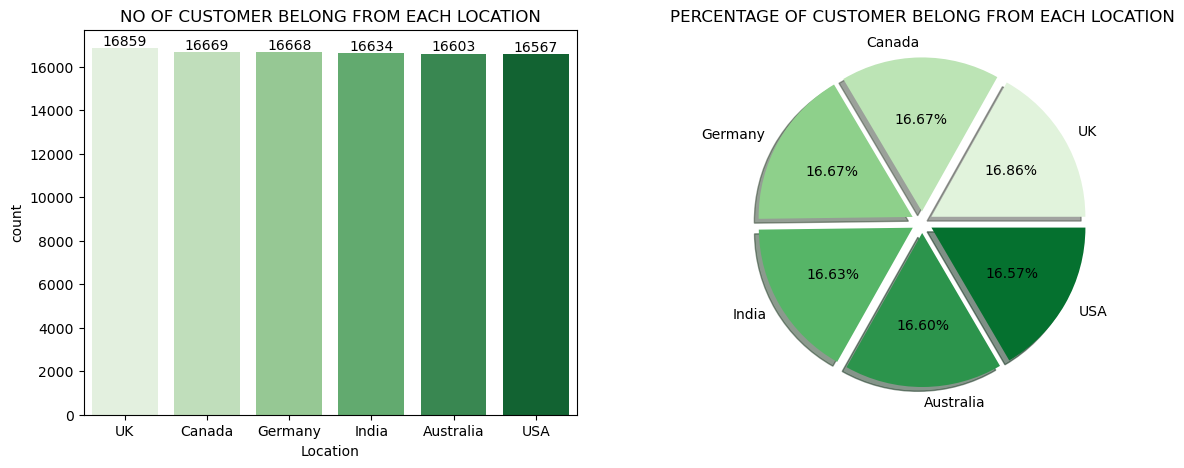

In [269]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=ecommerce_data['Location'].value_counts().reset_index(),
           x=ecommerce_data['Location'].value_counts().reset_index()['Location'],
           y=ecommerce_data['Location'].value_counts().reset_index()['count'],palette='Greens')
for i,j in enumerate(ecommerce_data['Location'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('NO OF CUSTOMER BELONG FROM EACH LOCATION')

plt.subplot(1,2,2)
plt.pie(x=ecommerce_data['Location'].value_counts().reset_index()['count'],explode=[0.07,0.07,0.07,0.07,0.07,0.07],
        colors=sns.color_palette('Greens'),shadow=True,autopct='%1.2f%%',
        labels=ecommerce_data['Location'].value_counts().reset_index()['Location'])
plt.title('PERCENTAGE OF CUSTOMER BELONG FROM EACH LOCATION')
plt.show()

### Executive Summary :-

* Customers are almost evenly distributed across UK, Canada, Germany, India, Australia, and the USA, each contributing ~16–17% of total users.
* The balanced regional mix significantly reduces concentration risk and protects revenue against country-specific slowdowns or regulatory changes.
* Similar customer volumes across markets indicate consistent product–market fit and successful global adoption.
* Growth should focus on localized optimization (pricing, logistics, marketing) in each region rather than heavy expansion into new geographies, as all current markets already show strong and equal traction.

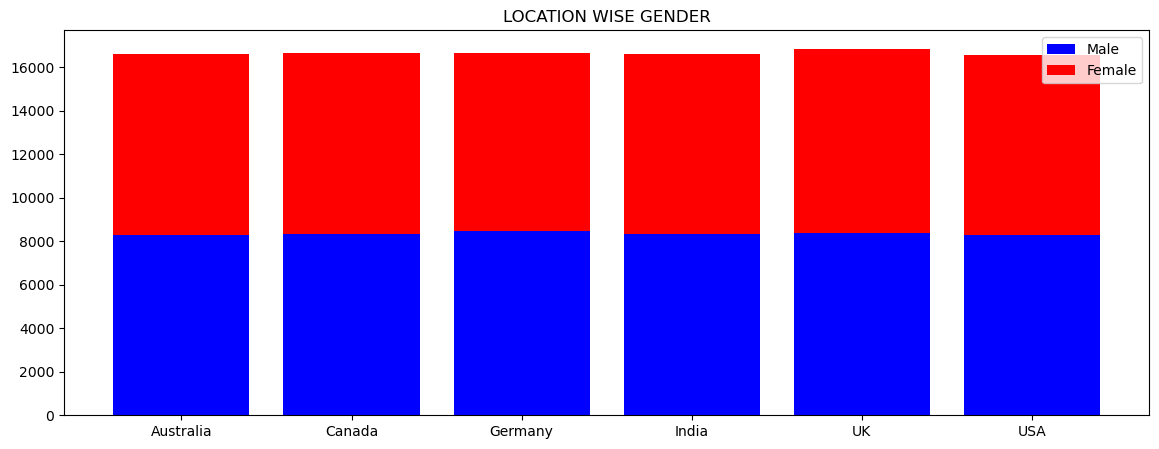

In [271]:
plt.figure(figsize=(14,5))
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Male'],color='blue',label='Male')
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Female'],
        bottom=ecommerce_customer_summary['Male'],color='red',label='Female')
plt.legend()
plt.title('LOCATION WISE GENDER')
plt.show()

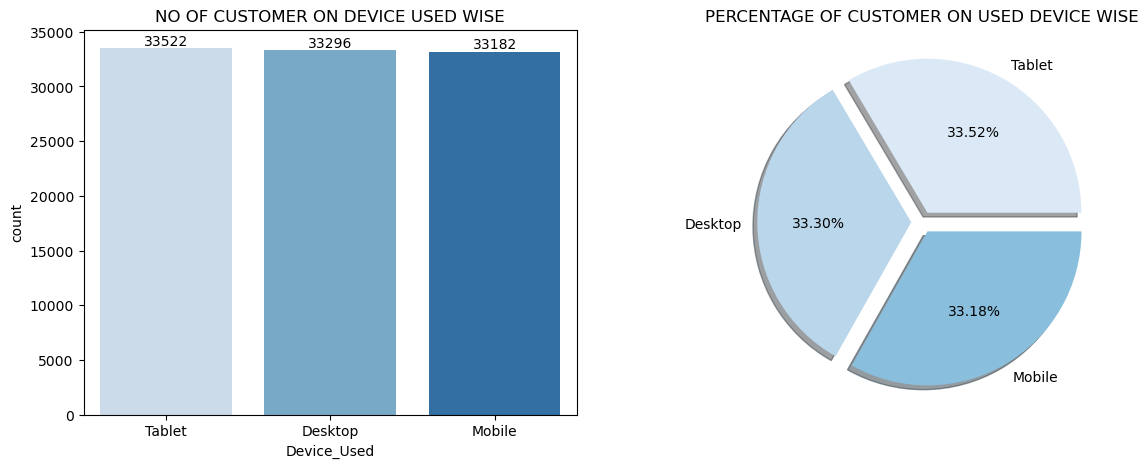

In [273]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=ecommerce_data['Device_Used'].value_counts().reset_index(),
           x=ecommerce_data['Device_Used'].value_counts().reset_index()['Device_Used'],
           y=ecommerce_data['Device_Used'].value_counts().reset_index()['count'],palette='Blues')
for i,j in enumerate(ecommerce_data['Device_Used'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('NO OF CUSTOMER ON DEVICE USED WISE')

plt.subplot(1,2,2)
plt.pie(x=ecommerce_data['Device_Used'].value_counts().reset_index()['count'],explode=[0.07,0.07,0.07],colors=sns.color_palette('Blues'),shadow=True,
       autopct='%1.2f%%',labels=ecommerce_data['Device_Used'].value_counts().reset_index()['Device_Used'])
plt.title('PERCENTAGE OF CUSTOMER ON USED DEVICE WISE')
plt.show()

### Executive Summary :-

* Tablet leads marginally with 33,522 customers (33.52%), making it the most used device, though the advantage over other devices is minimal.
* Desktop (33,296 | 33.30%) and Mobile (33,182 | 33.18%) usage are nearly identical, confirming a highly balanced, multi-device customer base.

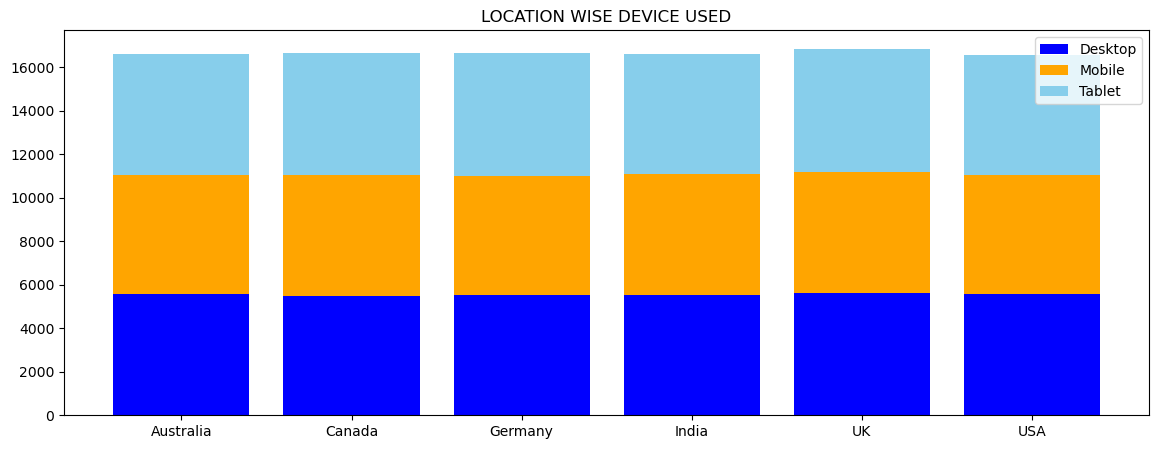

In [275]:
plt.figure(figsize=(14,5))
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Desktop'],color='blue',label='Desktop')
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Mobile'],bottom=ecommerce_customer_summary['Desktop'],
        color='orange',label='Mobile')
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Tablet'],
       bottom=ecommerce_customer_summary['Desktop'] + ecommerce_customer_summary['Mobile'],
       color='skyblue',label='Tablet')
plt.title('LOCATION WISE DEVICE USED')
plt.legend()
plt.show()

### Executive Summary :-

* Across all key geographies (Australia, Canada, Germany, India, UK, and USA), device usage is consistently balanced, with Desktop, Mobile, and Tablet each contributing comparable customer volumes. No region shows a strong dependency on a single device type, indicating uniform digital behavior globally and a standardized customer engagement pattern.
* Adopt a globally consistent, device-agnostic digital strategy, ensuring equal performance, UX optimization, and feature parity across Desktop, Mobile, and Tablet platforms to protect engagement across all regions and avoid losing up to one-third of users due to device-specific friction.

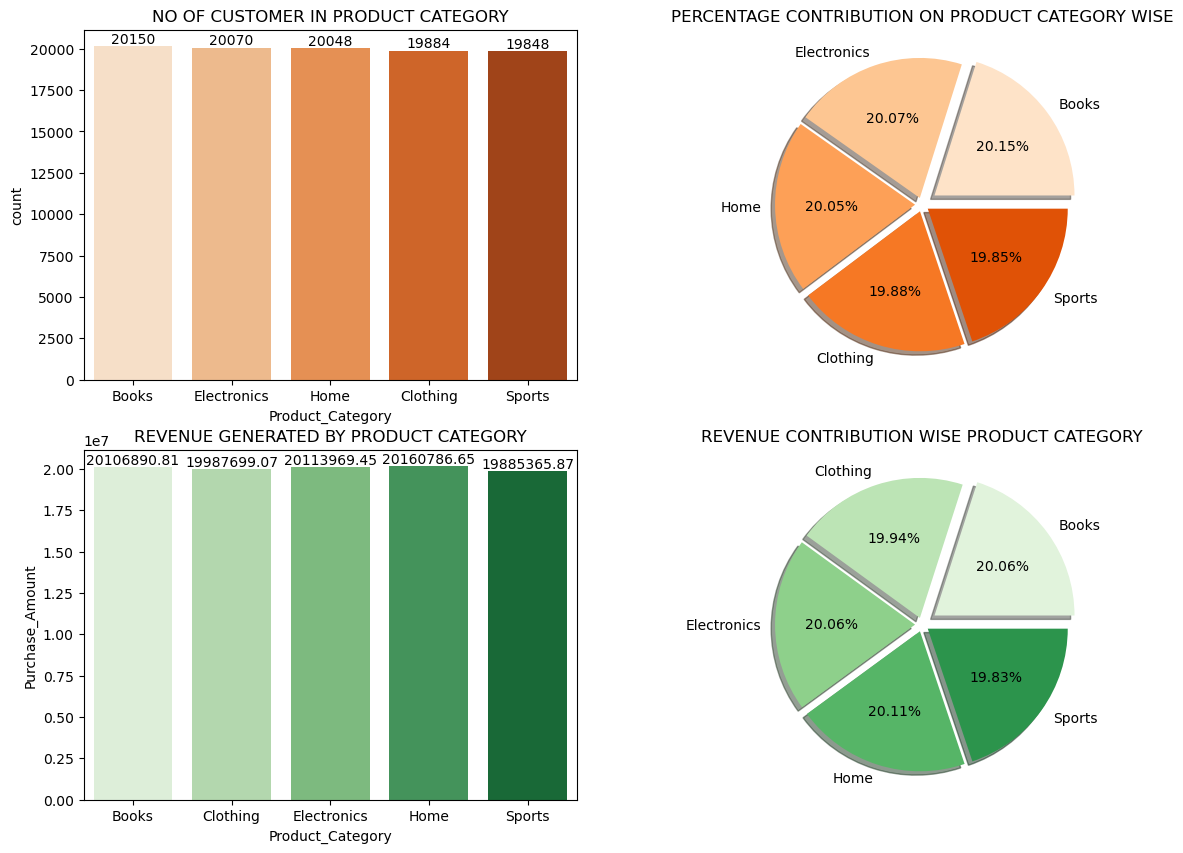

In [277]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.barplot(data=ecommerce_data['Product_Category'].value_counts().reset_index(),
           x=ecommerce_data['Product_Category'].value_counts().reset_index()['Product_Category'],
           y=ecommerce_data['Product_Category'].value_counts().reset_index()['count'],palette='Oranges')
for i,j in enumerate(ecommerce_data['Product_Category'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('NO OF CUSTOMER IN PRODUCT CATEGORY')

plt.subplot(2,2,2)
plt.pie(x=ecommerce_data['Product_Category'].value_counts().reset_index()['count'],explode=[0.11,0.05,0.05,0.05,0.05],
        colors=sns.color_palette('Oranges'),shadow=True,
       autopct='%1.2f%%',labels=ecommerce_data['Product_Category'].value_counts().reset_index()['Product_Category'])
plt.title('PERCENTAGE CONTRIBUTION ON PRODUCT CATEGORY WISE')

plt.subplot(2,2,3)
sns.barplot(data=ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index(),
           x=ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index()['Product_Category'],
           y=ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],palette='Greens')
for i,j in enumerate(ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('REVENUE GENERATED BY PRODUCT CATEGORY')

plt.subplot(2,2,4)
plt.pie(x=ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],
        explode=[0.11,0.05,0.05,0.05,0.05],colors=sns.color_palette('Greens'),shadow=True,
       autopct='%1.2f%%',
       labels=ecommerce_data.groupby(by='Product_Category').agg({'Purchase_Amount':'sum'}).reset_index()['Product_Category'])
plt.title('REVENUE CONTRIBUTION WISE PRODUCT CATEGORY')
plt.show()

### Executive Summary :-

* The business shows a highly balanced performance across all product categories, with each category contributing approximately 20% of total customers and revenue. This even distribution highlights a diversified revenue base, low concentration risk, and stable demand, positioning the company for sustainable and resilient growth.
* Shift focus from volume growth to value growth by driving higher margins and average order value through targeted pricing, cross-selling, and premium offerings—especially in categories already showing marginally higher revenue contribution.

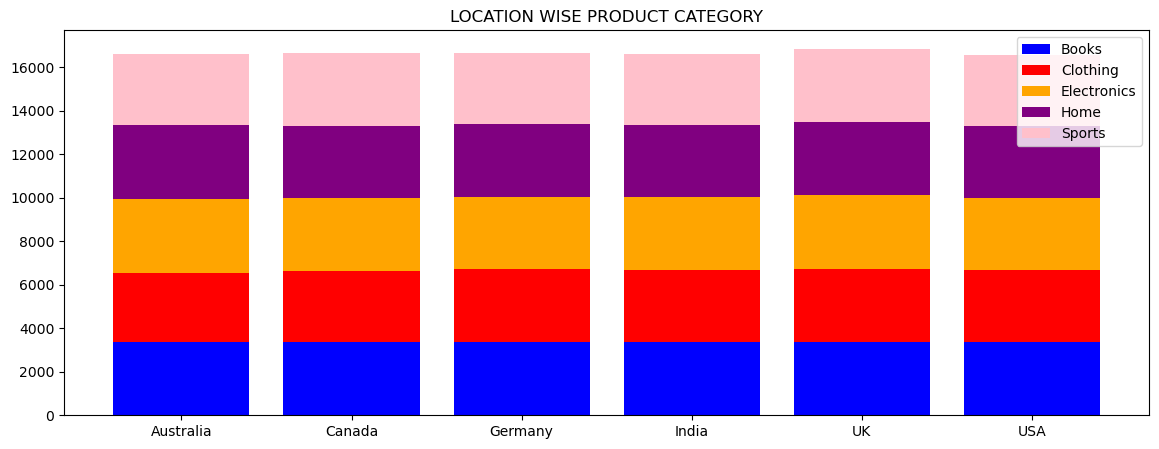

In [281]:
plt.figure(figsize=(14,5))
plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Books'],color='blue',label='Books')

plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Clothing'],
       bottom=ecommerce_customer_summary['Books'],color='red',label='Clothing')

plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Electronics'],
       bottom=ecommerce_customer_summary['Books'] + ecommerce_customer_summary['Clothing'],
       color='orange',label='Electronics')

plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Home'],
       bottom=ecommerce_customer_summary['Books'] + ecommerce_customer_summary['Clothing'] + ecommerce_customer_summary['Electronics'],
       color='Purple',label='Home')

plt.bar(ecommerce_customer_summary['Location'],
       ecommerce_customer_summary['Sports'],
       bottom=ecommerce_customer_summary['Books'] + ecommerce_customer_summary['Clothing'] + ecommerce_customer_summary['Electronics'] + ecommerce_customer_summary['Home'],
       color='pink',label='Sports')
plt.legend()
plt.title('LOCATION WISE PRODUCT CATEGORY')
plt.show()

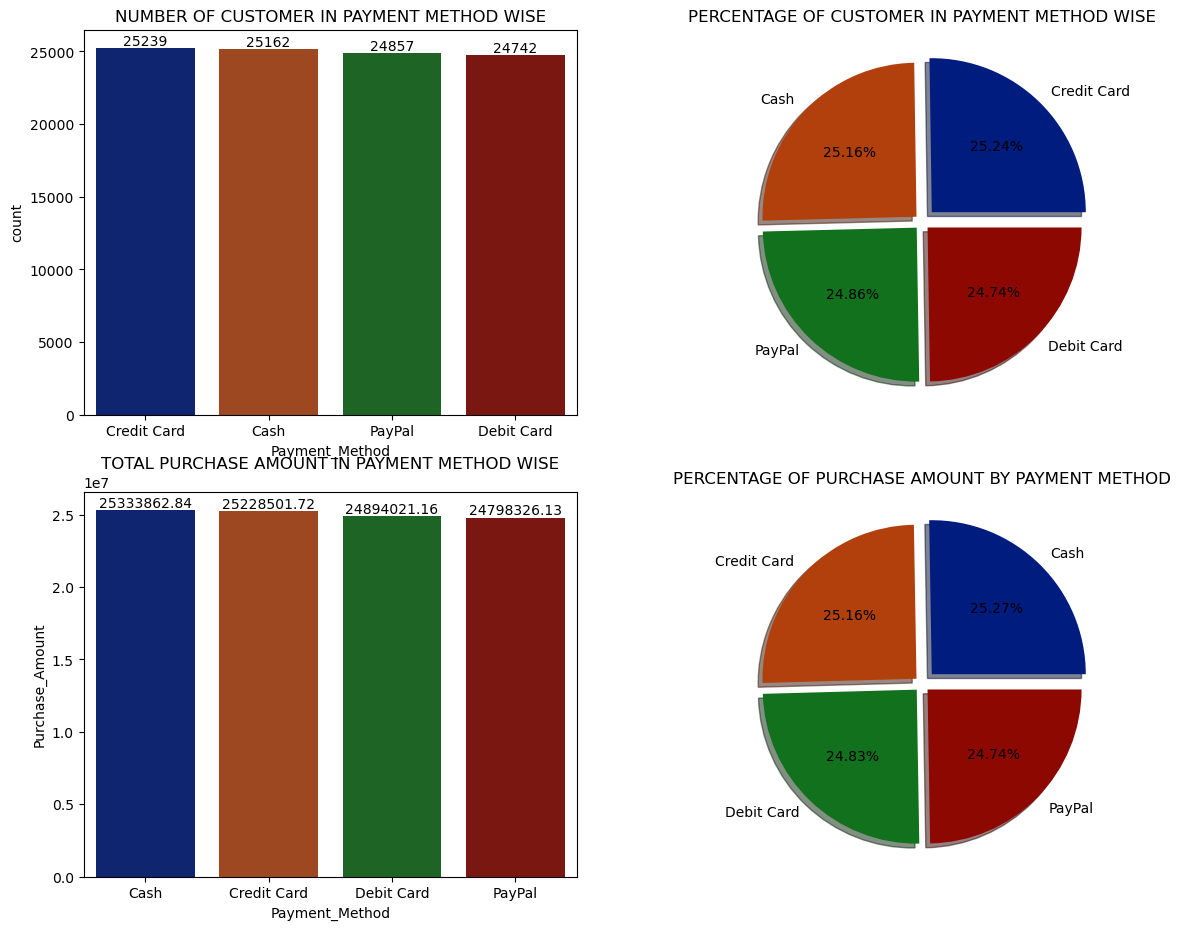

In [283]:
plt.figure(figsize=(14,11))

plt.subplot(2,2,1)
sns.barplot(data=ecommerce_data['Payment_Method'].value_counts().reset_index(),
           x=ecommerce_data['Payment_Method'].value_counts().reset_index()['Payment_Method'],
           y=ecommerce_data['Payment_Method'].value_counts().reset_index()['count'],palette='dark')
for i,j in enumerate(ecommerce_data['Payment_Method'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('NUMBER OF CUSTOMER IN PAYMENT METHOD WISE')

plt.subplot(2,2,2)
plt.pie(x=ecommerce_data['Payment_Method'].value_counts().reset_index()['count'],explode=[0.09,0.05,0.05,0.05],
       autopct='%1.2f%%',colors=sns.color_palette('dark'),shadow=True,
       labels=ecommerce_data['Payment_Method'].value_counts().reset_index()['Payment_Method'])
plt.title('PERCENTAGE OF CUSTOMER IN PAYMENT METHOD WISE')

plt.subplot(2,2,3)
sns.barplot(data=ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index(),
           x=ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index()['Payment_Method'],
           y=ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],palette='dark')
for i,j in enumerate(ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('TOTAL PURCHASE AMOUNT IN PAYMENT METHOD WISE')

plt.subplot(2,2,4)
plt.pie(x=ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index()['Purchase_Amount'],explode=[0.09,0.05,0.05,0.05],
       autopct='%1.2f%%',colors=sns.color_palette('dark'),shadow=True,
       labels=ecommerce_data.groupby(by='Payment_Method').agg({'Purchase_Amount':'sum'}).reset_index()['Payment_Method'])
plt.title('PERCENTAGE OF PURCHASE AMOUNT BY PAYMENT METHOD')
plt.show()

### Executive Summary :-

* Customer usage across payment methods is highly balanced. Credit Card leads marginally with ~25.24% (25,239 customers), followed closely by Cash (25.16%), PayPal (24.86%), and Debit Card (24.74%). This indicates no single dominant payment preference, reflecting diversified customer behavior.
* Purchase value contribution mirrors customer distribution. Credit Cards generate the highest total purchase amount at ~₹25.33M (≈25.2%), while Cash (25.28%), Debit Card (24.83%), and PayPal (24.74%) contribute almost equally. This shows all payment modes are equally valuable from a revenue standpoint.
* Maintain and strengthen all payment channels equally, while introducing targeted incentives (cashback, loyalty points, or offers) for digital payments (Credit Card, Debit Card, PayPal) to gradually shift customers toward lower-cost, faster, and more traceable payment methods, improving operational efficiency without risking customer drop-off.

## 5. REPEAT VS NEW CUSTOMER ANALYSIS

* Yes :- Customer has purchased before (repeat / retained customer)
* No :- Customer is a new customer (first-time buyer)
* “Is this customer new or repeat at the time of purchase?”
    * repeat_customer
    * new_customer

In [285]:
repeat_customer = ecommerce_data[ecommerce_data['Returning_Customer'] == 'Yes']

In [287]:
new_customer = ecommerce_data[ecommerce_data['Returning_Customer'] == 'No']

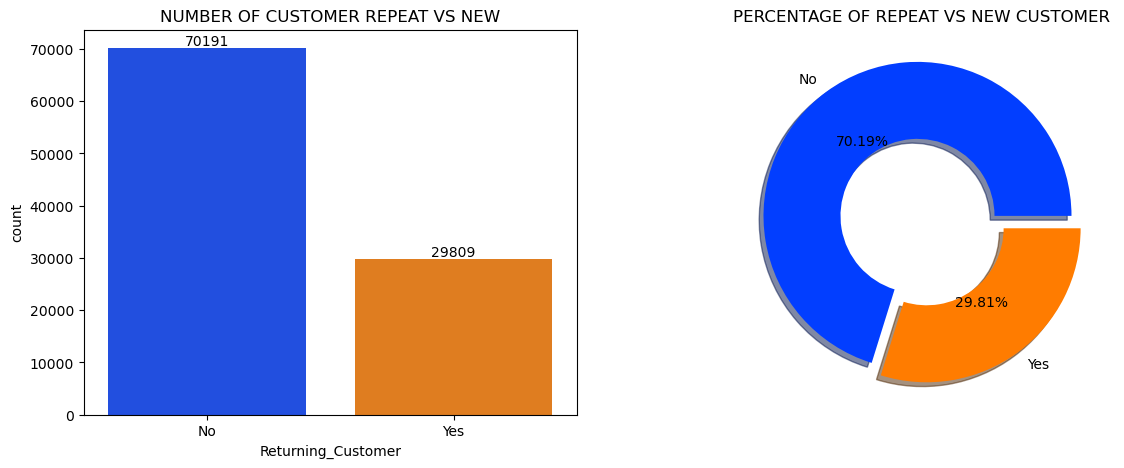

In [289]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=ecommerce_data['Returning_Customer'].value_counts().reset_index(),
           x=ecommerce_data['Returning_Customer'].value_counts().reset_index()['Returning_Customer'],
           y=ecommerce_data['Returning_Customer'].value_counts().reset_index()['count'],palette='bright')
for i,j in enumerate(ecommerce_data['Returning_Customer'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('NUMBER OF CUSTOMER REPEAT VS NEW')

plt.subplot(1,2,2)
plt.pie(x=ecommerce_data['Returning_Customer'].value_counts().reset_index()['count'],explode=[0.05,0.05],colors=sns.color_palette('bright'),
       autopct='%1.2f%%',shadow=True,wedgeprops={'width':0.5},
       labels=ecommerce_data['Returning_Customer'].value_counts().reset_index()['Returning_Customer'])
plt.title('PERCENTAGE OF REPEAT VS NEW CUSTOMER')
plt.show()

### 5.B Repeat Vs New Customer Analysis

In [291]:
repeat_customer.reset_index(drop='index',inplace=True)

In [293]:
new_customer.reset_index(drop='index',inplace=True)

In [295]:
repeat_customer.head()

Purchase_Date  Purchase_Year  Purchase_Month Month_Name  \
0    2024-05-08           2024               5        May   
1    2024-11-08           2024              11   November   
2    2025-04-25           2025               4      April   
3    2024-01-23           2024               1    January   
4    2024-12-07           2024              12   December   

                            Customer_ID  Gender  Age Location  \
0  da2cee58-ea77-41d5-81d9-0eb59d7ef33c    Male   60       UK   
1  14b5d897-85f2-4ed0-8b63-e1195b2dac98  Female   56    India   
2  cda2f566-1d2f-4e86-9d2c-fbc6aa98dc92    Male   40    India   
3  65600014-658c-4bda-8fc5-557bc7f7e5b2    Male   53  Germany   
4  c1dfca64-ca04-4c5e-b8bc-530ad6069ff5    Male   19    India   

  Product_Category Device_Used Payment_Method Returning_Customer  \
0         Clothing     Desktop         PayPal                Yes   
1           Sports     Desktop           Cash                Yes   
2         Clothing     Desktop           Cash                Yes   
3         Clothing      Mobile         PayPal                Yes   
4            Books      Tablet    Credit Card                Yes   

   Purchase_Amount  
0          1003.83  
1            10.30  
2           443.77  
3           592.42  
4           822.07

In [297]:
new_customer.head()

Purchase_Date  Purchase_Year  Purchase_Month Month_Name  \
0    2024-05-13           2024               5        May   
1    2024-01-26           2024               1    January   
2    2025-02-17           2025               2   February   
3    2025-04-18           2025               4      April   
4    2025-08-02           2025               8     August   

                            Customer_ID  Gender  Age   Location  \
0  3da027c0-f1fc-44e6-96af-dcf86b9755fc  Female   56      India   
1  c24726e5-9cc1-4cf4-839c-9a73e994e2c6  Female   69  Australia   
2  8ce0eed2-b53e-4b25-97c8-047035fe95ba    Male   46      India   
3  466fcfe9-aa9c-47e4-80b5-d56c1f1dc02a    Male   32      India   
4  2073f698-8b8a-4c89-8f32-1497160af506    Male   25    Germany   

  Product_Category Device_Used Payment_Method Returning_Customer  \
0            Books      Mobile         PayPal                 No   
1      Electronics      Mobile           Cash                 No   
2      Electronics     Desktop         PayPal                 No   
3            Books      Mobile         PayPal                 No   
4           Sports      Mobile    Credit Card                 No   

   Purchase_Amount  
0           706.87  
1          1753.53  
2          1239.12  
3          1455.74  
4           580.71

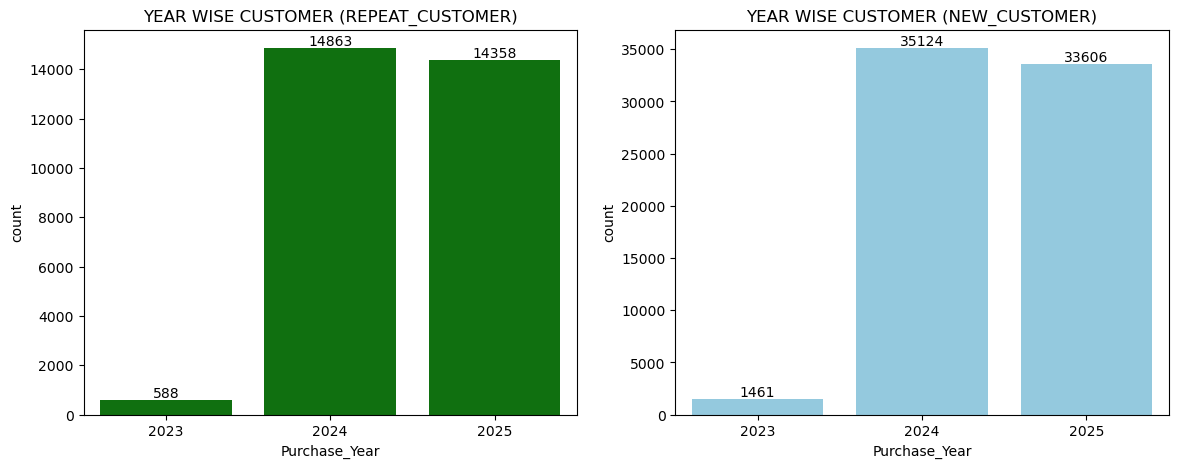

In [299]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=repeat_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year'),
           x=repeat_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['Purchase_Year'],
           y=repeat_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count'],color='green')
for i,j in enumerate(repeat_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('YEAR WISE CUSTOMER (REPEAT_CUSTOMER)')

plt.subplot(1,2,2)
sns.barplot(data=new_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year'),
           x=new_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['Purchase_Year'],
           y=new_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count'],color='skyblue')
for i,j in enumerate(new_customer['Purchase_Year'].value_counts().reset_index().sort_values(by='Purchase_Year')['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('YEAR WISE CUSTOMER (NEW_CUSTOMER)')
plt.show()

### Executive Summary :-

* Customer acquisition scaled rapidly in 2024 but slowed in 2025, signaling a transition from high-growth to a more mature phase where incremental growth will be harder to achieve through acquisition alone.
* Repeat customer growth has stalled and slightly declined in 2025, indicating early churn risk and insufficient conversion of new customers into loyal, repeat buyers.
* Long-term growth and profitability now depend on shifting to retention-led strategies, focusing on improving customer loyalty, repeat purchase rates, and lifetime value through data-driven engagement.

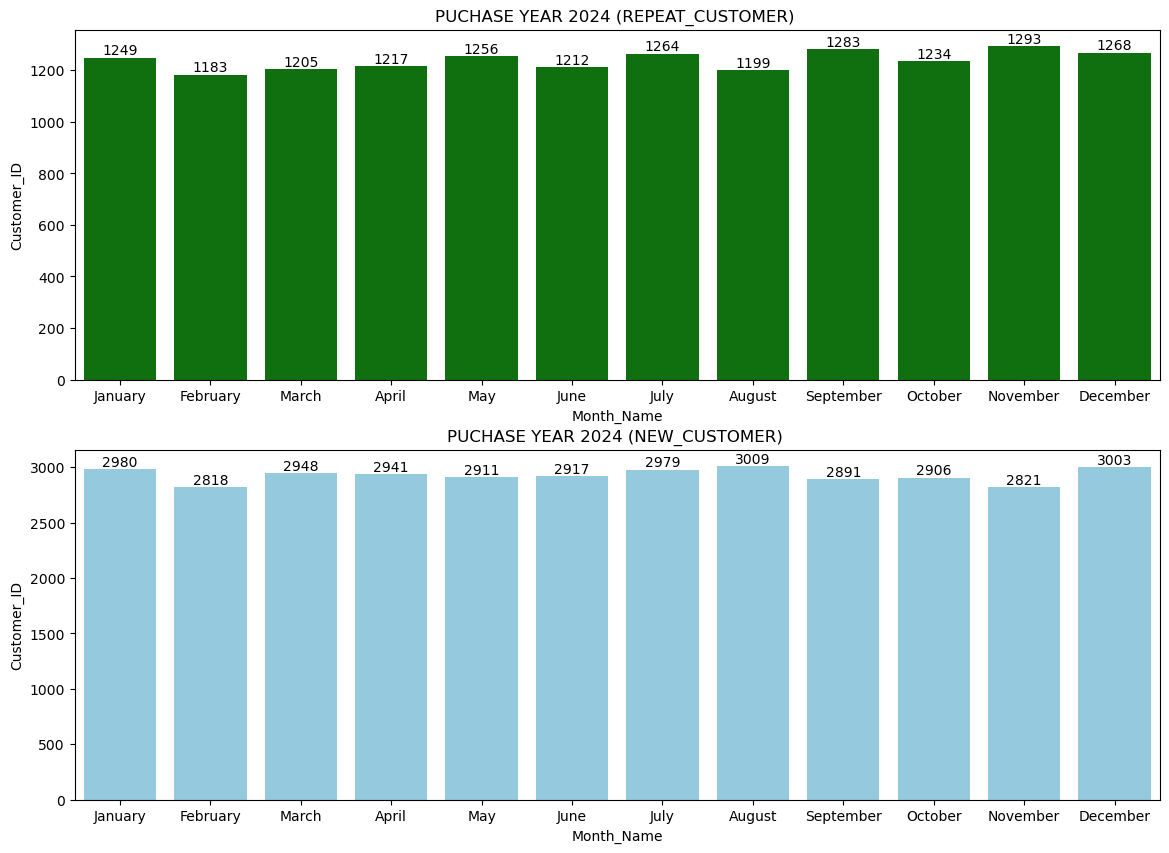

In [301]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
sns.barplot(data=repeat_customer[repeat_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index(),
           x=repeat_customer[repeat_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Month_Name'],
           y=repeat_customer[repeat_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],
           color='green')
for i,j in enumerate(repeat_customer[repeat_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PUCHASE YEAR 2024 (REPEAT_CUSTOMER) ')

plt.subplot(2,1,2)
sns.barplot(data=new_customer[new_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index(),
           x=new_customer[new_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Month_Name'],
           y=new_customer[new_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],
           color='skyblue')
for i,j in enumerate(new_customer[new_customer['Purchase_Year'] == 2024].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PUCHASE YEAR 2024 (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* Across all months, new customers (2,800–3,000 per month) consistently exceed repeat customers (1,180–1,290 per month) by ~2.3–2.5×, confirming that growth is primarily fueled by new customer acquisition rather than repeat behavior.
* Repeat customers show low volatility and flat growth throughout the year, indicating a stable but capped loyalty base with no clear upward momentum despite strong inflow of new customers.
* Peak months such as August, November, and December show noticeable spikes in new customers, while repeat customers increase only marginally—suggesting promotions and campaigns are more effective at acquisition than retention.

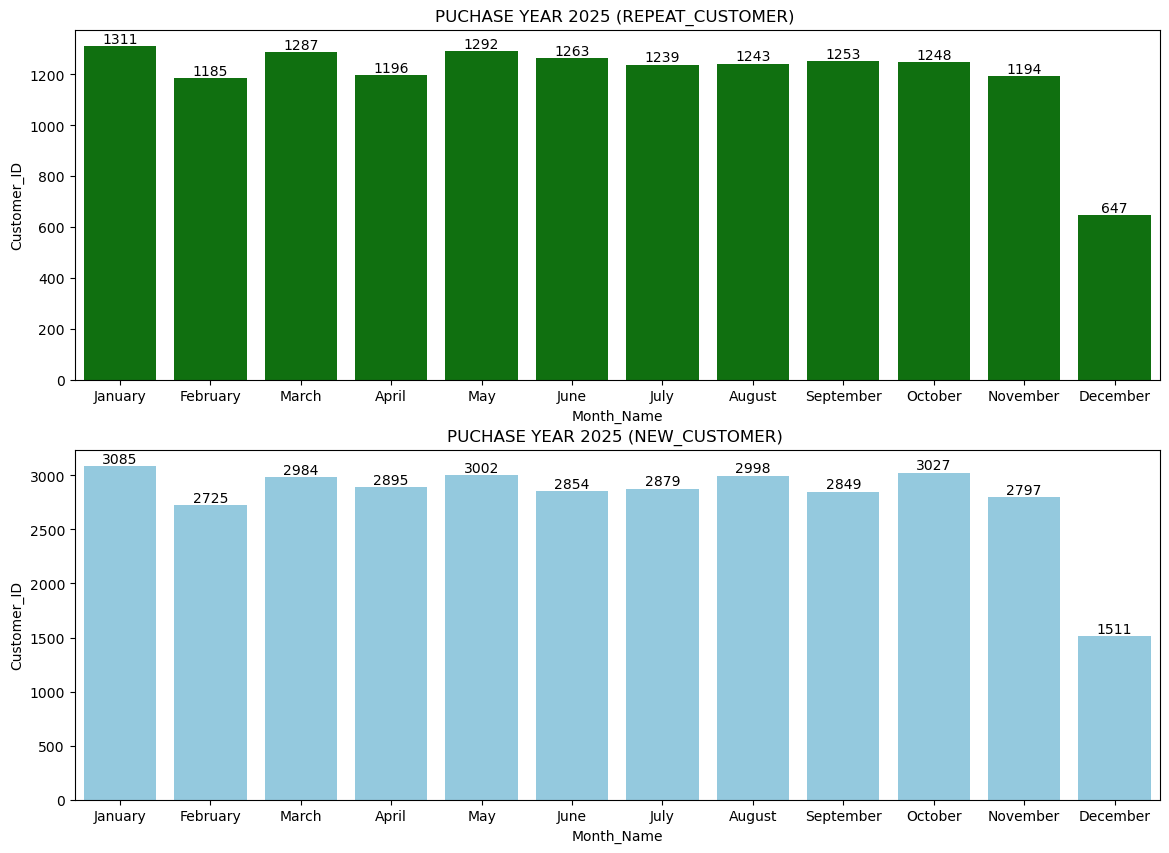

In [303]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
sns.barplot(data=repeat_customer[repeat_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index(),
           x=repeat_customer[repeat_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Month_Name'],
           y=repeat_customer[repeat_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],
           color='green')
for i,j in enumerate(repeat_customer[repeat_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PUCHASE YEAR 2025 (REPEAT_CUSTOMER) ')

plt.subplot(2,1,2)
sns.barplot(data=new_customer[new_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index(),
           x=new_customer[new_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Month_Name'],
           y=new_customer[new_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],
           color='skyblue')
for i,j in enumerate(new_customer[new_customer['Purchase_Year'] == 2025].groupby(by=['Purchase_Month','Month_Name']).agg({'Customer_ID':'count'}).reset_index()['Customer_ID']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PUCHASE YEAR 2025 (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* In 2025, customer growth is primarily driven by new customer acquisition, with repeat customers remaining stable but not increasing significantly. A sharp decline in both segments in December highlights a need to strengthen retention strategies and proactively manage seasonality to ensure sustainable, profitable growth.

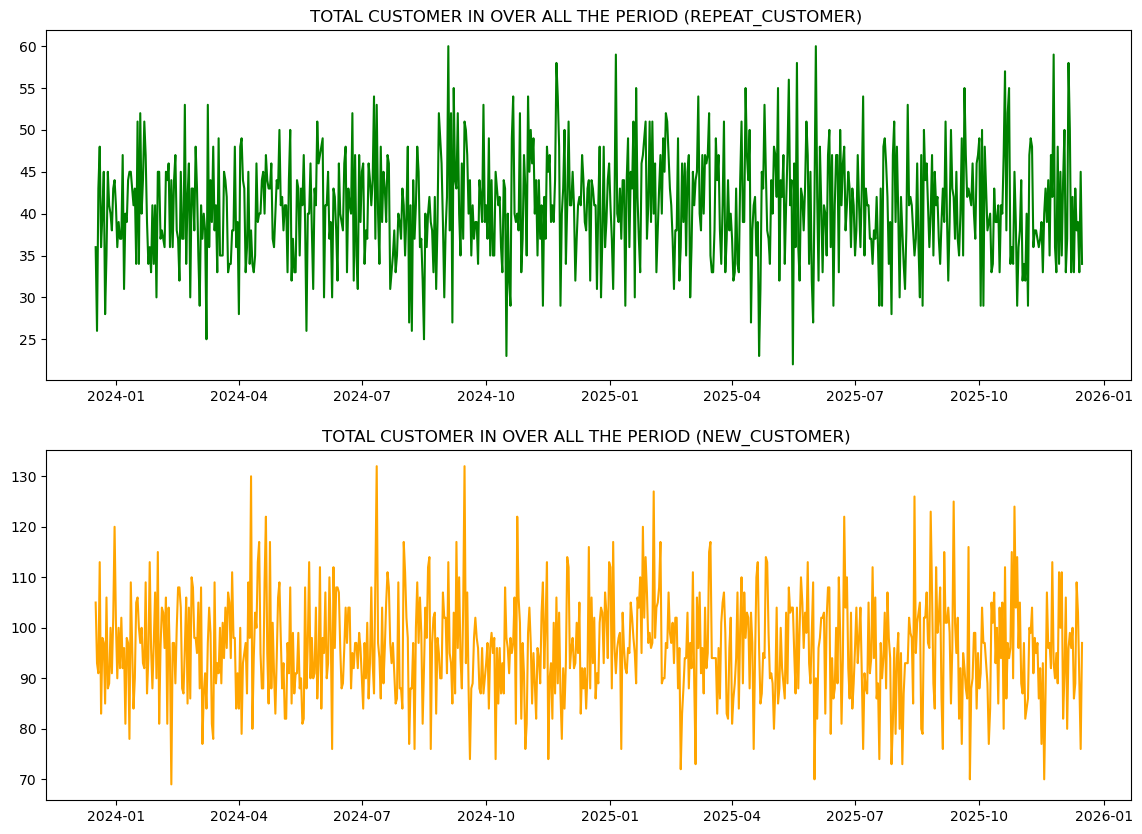

In [305]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.plot(repeat_customer.groupby(by='Purchase_Date').agg({'Customer_ID':'count'}).reset_index()['Purchase_Date'],
        repeat_customer.groupby(by='Purchase_Date').agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],color='green')
plt.title('TOTAL CUSTOMER IN OVER ALL THE PERIOD (REPEAT_CUSTOMER) ')

plt.subplot(2,1,2)
plt.plot(new_customer.groupby(by='Purchase_Date').agg({'Customer_ID':'count'}).reset_index()['Purchase_Date'],
        new_customer.groupby(by='Purchase_Date').agg({'Customer_ID':'count'}).reset_index()['Customer_ID'],color='orange')
plt.title('TOTAL CUSTOMER IN OVER ALL THE PERIOD (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* Across the entire period, daily new customer volume (80–120) significantly exceeds repeat customer activity (30–50), reinforcing that business growth is driven more by acquisition than retention.
* Repeat customer activity shows low volatility with no sustained upward trend, indicating a stable but limited loyalty base that is not expanding in line with new customer inflows.
* The widening gap between new and repeat customers suggests higher dependency on continuous acquisition spend, increasing long-term risk to margins and customer lifetime value if retention is not strengthened.
* “The business is scaling through acquisition, but long-term value creation will depend on converting this inflow into a stronger and growing repeat customer base.”

### 5.C Gender & Age Distrubution Analysis of Repeat Vs New Customer

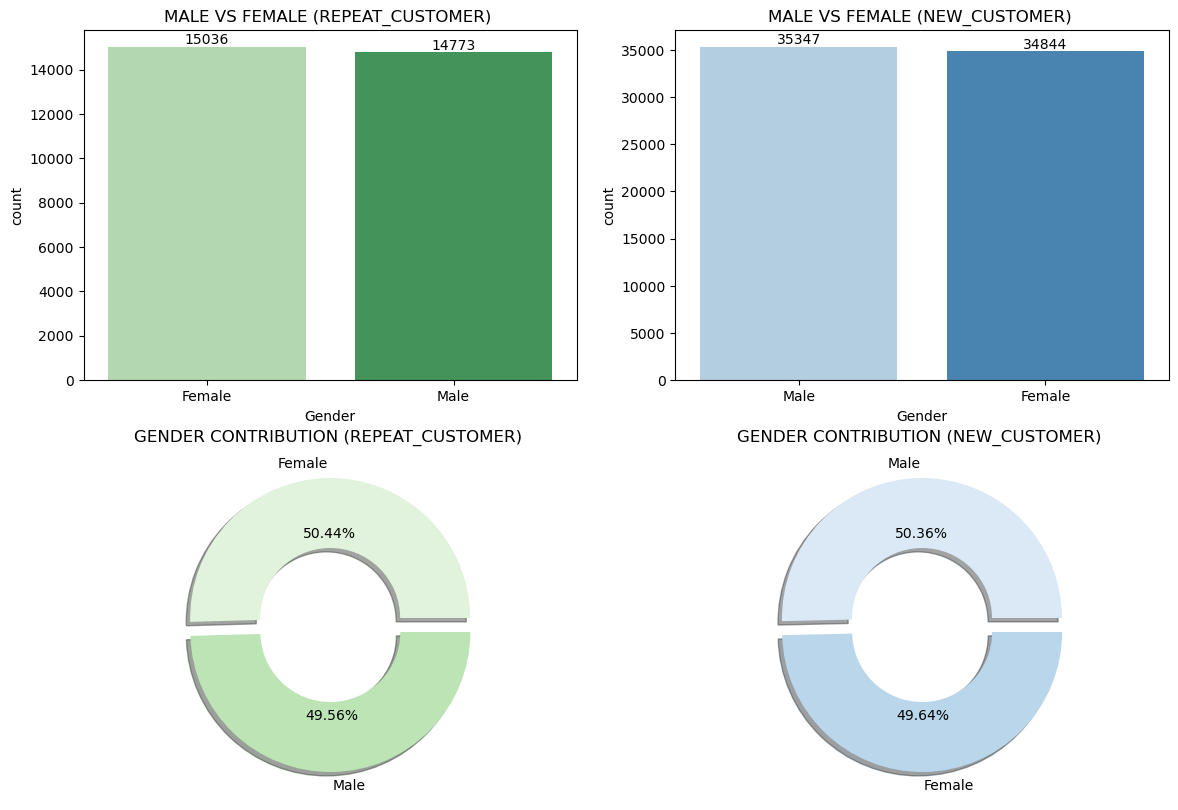

In [307]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.barplot(data=repeat_customer['Gender'].value_counts().reset_index(),
           x=repeat_customer['Gender'].value_counts().reset_index()['Gender'],
           y=repeat_customer['Gender'].value_counts().reset_index()['count'],palette='Greens')
for i,j in enumerate(repeat_customer['Gender'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('MALE VS FEMALE (REPEAT_CUSTOMER) ')

plt.subplot(2,2,2)
sns.barplot(data=new_customer['Gender'].value_counts().reset_index(),
           x=new_customer['Gender'].value_counts().reset_index()['Gender'],
           y=new_customer['Gender'].value_counts().reset_index()['count'],palette='Blues')
for i,j in enumerate(new_customer['Gender'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('MALE VS FEMALE (NEW_CUSTOMER) ')

plt.subplot(2,2,3)
plt.pie(x=repeat_customer['Gender'].value_counts().reset_index()['count'],explode=[0.05,0.05],
       autopct='%1.2f%%',colors=sns.color_palette('Greens'),shadow=True,wedgeprops=({'width':0.5}),
       labels=repeat_customer['Gender'].value_counts().reset_index()['Gender'])
plt.title('GENDER CONTRIBUTION (REPEAT_CUSTOMER) ')

plt.subplot(2,2,4)
plt.pie(x=new_customer['Gender'].value_counts().reset_index()['count'],explode=[0.05,0.05],
       autopct='%1.2f%%',colors=sns.color_palette('Blues'),wedgeprops=({'width':0.5}),shadow=True,
       labels=new_customer['Gender'].value_counts().reset_index()['Gender'])
plt.title('GENDER CONTRIBUTION (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* Both new and repeat customers show an almost equal gender split (~50% male, ~50% female), indicating no gender bias in customer acquisition or retention.
* Repeat customers are evenly distributed between males (49.6%) and females (50.4%), suggesting similar loyalty and repeat purchase behavior across genders.
* New customer acquisition is equally strong among males (50.4%) and females (49.6%), implying that current marketing and product positioning resonate equally with both segments.
* “Customer acquisition and retention are gender-balanced; future growth will come from behavioral personalization rather than demographic segmentation.”

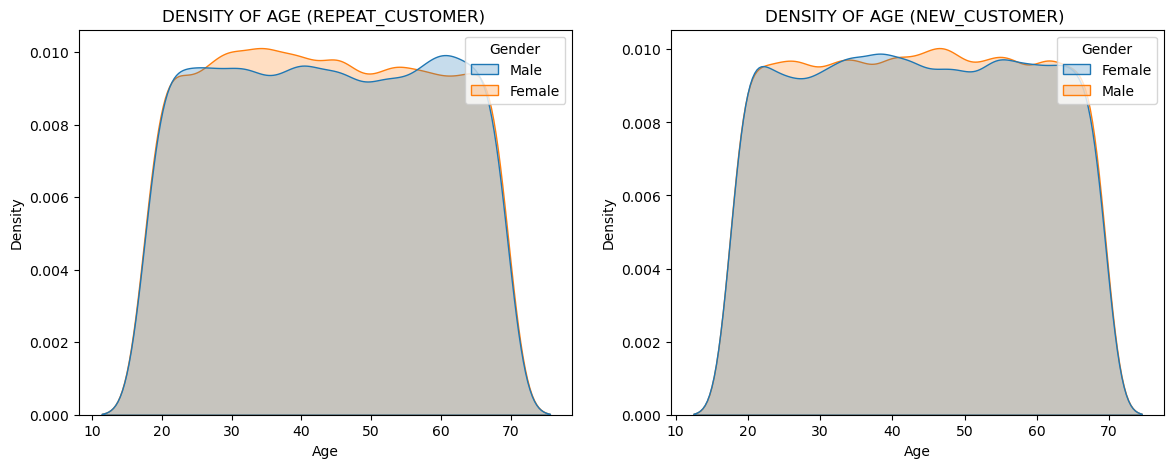

In [309]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(data=repeat_customer,
           x=repeat_customer['Age'],hue=repeat_customer['Gender'],fill=True)
plt.title('DENSITY OF AGE (REPEAT_CUSTOMER) ')

plt.subplot(1,2,2)
sns.kdeplot(data=new_customer,
           x=new_customer['Age'],hue=new_customer['Gender'],fill=True)
plt.title('DENSITY OF AGE (NEW_CUSTOMER) ')
plt.show()

### 5.D Location Wise Customer Analysis In Repeat Vs New Customer

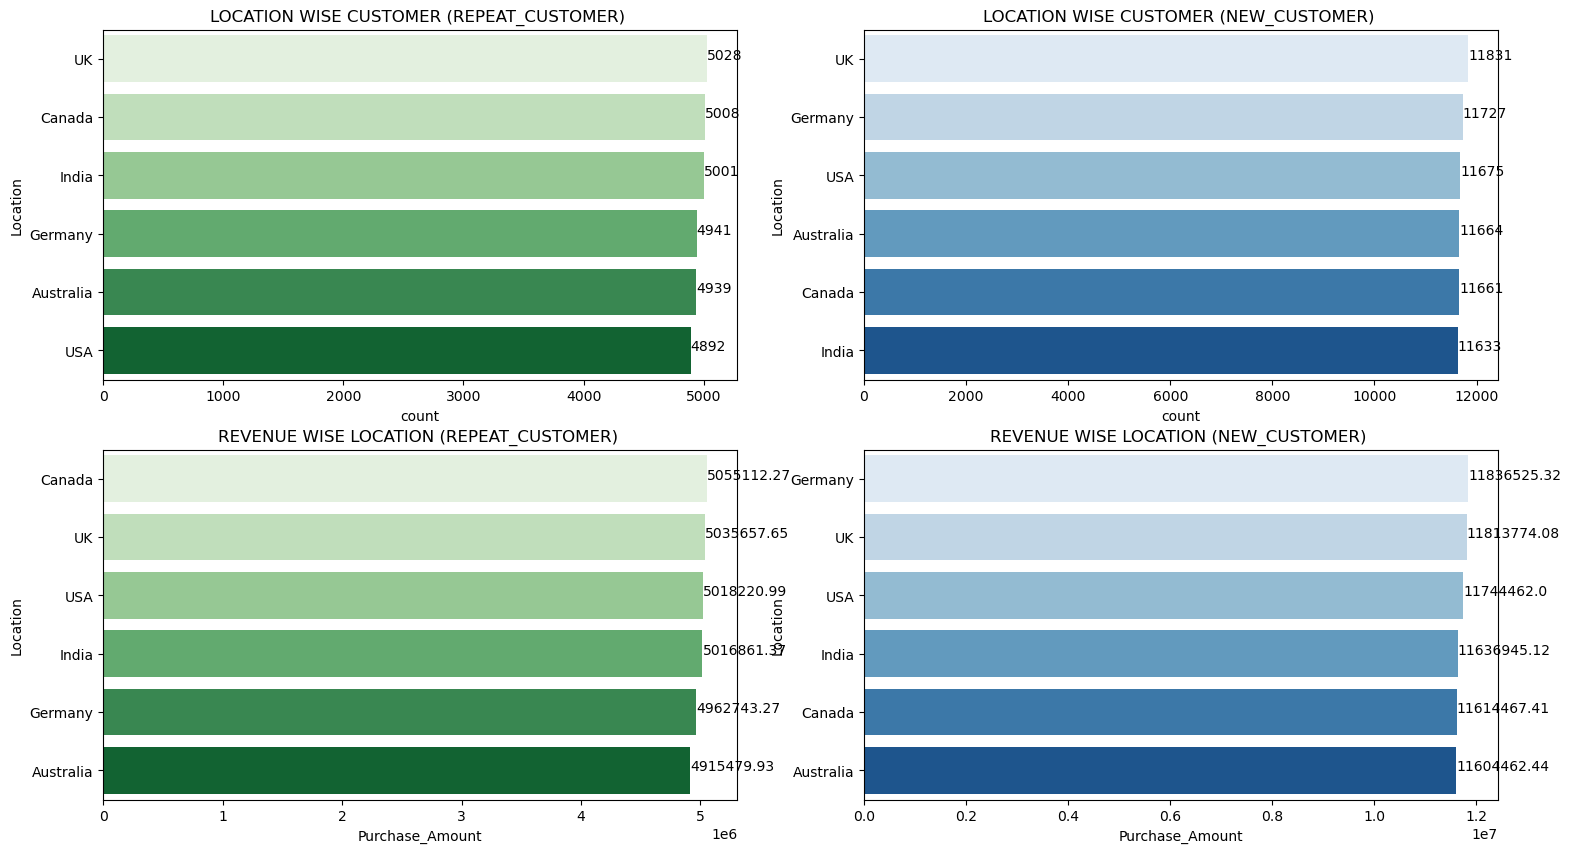

In [311]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.barplot(data=repeat_customer['Location'].value_counts().reset_index(),
           x=repeat_customer['Location'].value_counts().reset_index()['count'],
           y=repeat_customer['Location'].value_counts().reset_index()['Location'],palette='Greens')
for i,j in enumerate(repeat_customer['Location'].value_counts().reset_index()['count']):
    plt.text(j,i,s=j)
plt.title('LOCATION WISE CUSTOMER (REPEAT_CUSTOMER) ')

plt.subplot(2,2,2)
sns.barplot(data=new_customer['Location'].value_counts().reset_index(),
           x=new_customer['Location'].value_counts().reset_index()['count'],
           y=new_customer['Location'].value_counts().reset_index()['Location'],palette='Blues')
for i,j in enumerate(new_customer['Location'].value_counts().reset_index()['count']):
    plt.text(j,i,s=j)
plt.title('LOCATION WISE CUSTOMER (NEW_CUSTOMER) ')

plt.subplot(2,2,3)
sns.barplot(data=repeat_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False),
           x=repeat_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount'],
           y=repeat_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Location'],
           palette='Greens')
for i,j in enumerate(repeat_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount']):
    plt.text(j,i,s=j)
plt.title('REVENUE WISE LOCATION (REPEAT_CUSTOMER) ')

plt.subplot(2,2,4)
sns.barplot(data=new_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False),
           x=new_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount'],
           y=new_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Location'],
           palette='Blues')
for i,j in enumerate(new_customer.groupby(by='Location').agg({'Purchase_Amount':'sum'}).reset_index().sort_values(by='Purchase_Amount',ascending=False)['Purchase_Amount']):
    plt.text(j,i,s=j)
plt.title('REVENUE WISE LOCATION (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* New customers generate significantly higher revenue than repeat customers across all locations, showing strong market expansion. However, repeat customers are evenly distributed and provide stable revenue in every region, highlighting a clear opportunity to increase overall profits by improving customer retention and repeat purchases in key markets like the UK, USA, and Germany.

### 5.E Device Used Of Repeat Vs New Customer

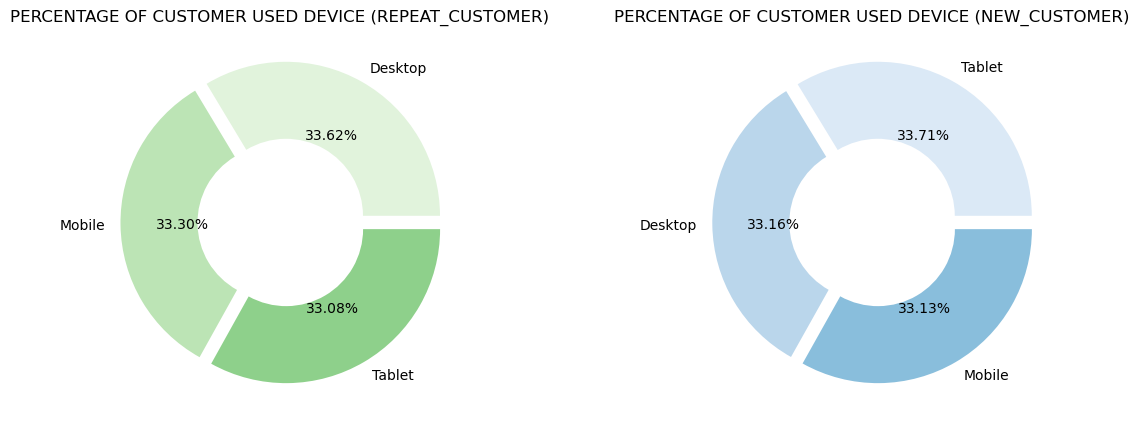

In [313]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.pie(x=repeat_customer['Device_Used'].value_counts().reset_index()['count'],explode=[0.05,0.05,0.05],
        wedgeprops={'width':0.5} ,colors=sns.color_palette('Greens'),
       autopct='%1.2f%%',
       labels=repeat_customer['Device_Used'].value_counts().reset_index()['Device_Used'])
plt.title('PERCENTAGE OF CUSTOMER USED DEVICE (REPEAT_CUSTOMER) ')

plt.subplot(1,2,2)
plt.pie(x=new_customer['Device_Used'].value_counts().reset_index()['count'],
        explode=[0.05,0.05,0.05],colors=sns.color_palette('Blues'),wedgeprops={'width':0.5},
       autopct='%1.2f%%',
       labels=new_customer['Device_Used'].value_counts().reset_index()['Device_Used'])
plt.title('PERCENTAGE OF CUSTOMER USED DEVICE (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* New and repeat customers use mobile, desktop, and tablet almost equally. This means customers are comfortable on all devices, so the company should ensure a smooth and consistent experience across every device rather than focusing on just one.

### 5.F Product Category Wise Repeat Vs New Customer

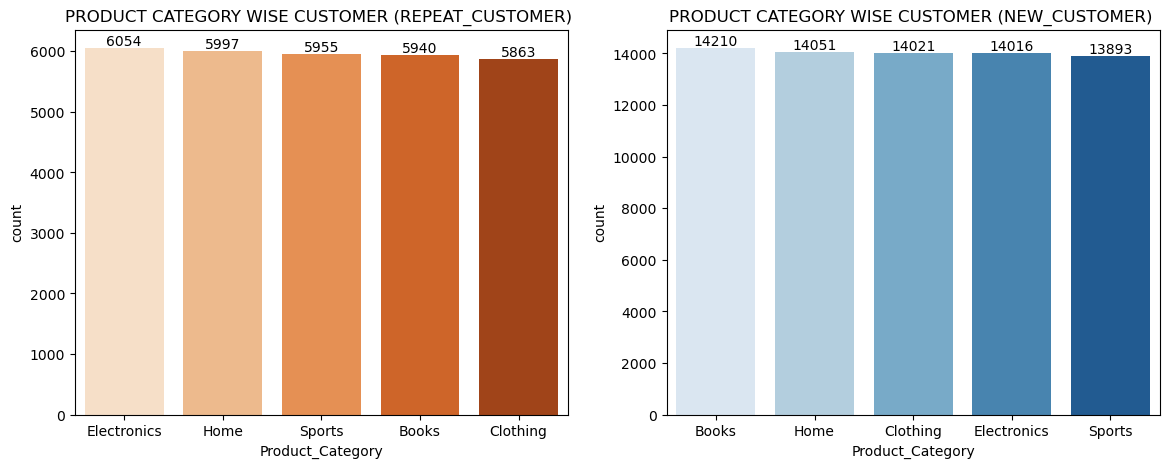

In [315]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data=repeat_customer['Product_Category'].value_counts().reset_index(),
           x=repeat_customer['Product_Category'].value_counts().reset_index()['Product_Category'],
           y=repeat_customer['Product_Category'].value_counts().reset_index()['count'],palette='Oranges')
for i,j in enumerate(repeat_customer['Product_Category'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PRODUCT CATEGORY WISE CUSTOMER (REPEAT_CUSTOMER) ')

plt.subplot(1,2,2)
sns.barplot(data=new_customer['Product_Category'].value_counts().reset_index(),
           x=new_customer['Product_Category'].value_counts().reset_index()['Product_Category'],
           y=new_customer['Product_Category'].value_counts().reset_index()['count'],palette='Blues')
for i,j in enumerate(new_customer['Product_Category'].value_counts().reset_index()['count']):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('PRODUCT CATEGORY WISE CUSTOMER (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* New customers are buying more products in every category than repeat customers, which shows good customer acquisition. However, repeat customers buy similar amounts across all categories, so the company should encourage them to purchase more often by giving special offers and personalized deals in popular categories like Books, Home, and Electronics.

### 5.G Payment Method Repeat Vs New Customer

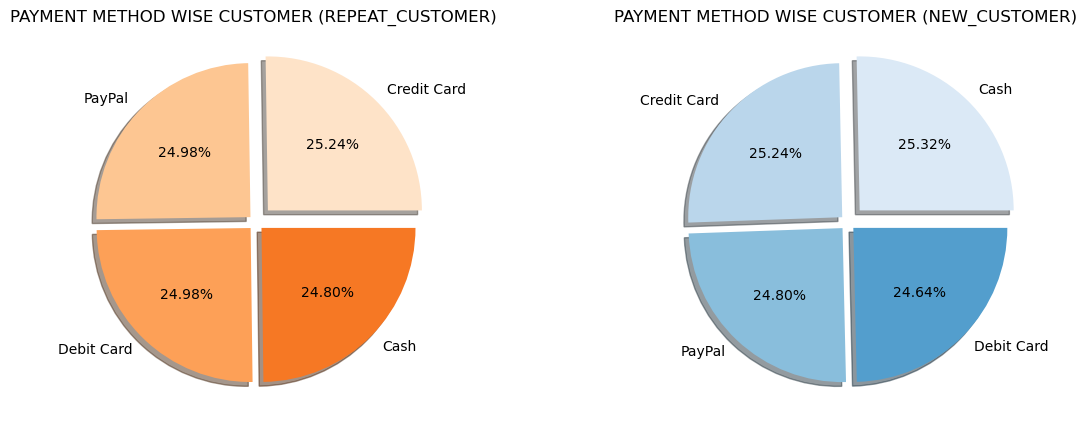

In [317]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.pie(x=repeat_customer['Payment_Method'].value_counts().reset_index()['count'],
        explode=[0.11,0.05,0.05,0.05],colors=sns.color_palette('Oranges'),shadow=True,
       autopct='%1.2f%%',
       labels=repeat_customer['Payment_Method'].value_counts().reset_index()['Payment_Method'])
plt.title('PAYMENT METHOD WISE CUSTOMER (REPEAT_CUSTOMER) ')

plt.subplot(1,2,2)
plt.pie(x=new_customer['Payment_Method'].value_counts().reset_index()['count'],
        explode=[0.11,0.05,0.05,0.05],colors=sns.color_palette('Blues'),shadow=True,
       autopct='%1.2f%%',
       labels=new_customer['Payment_Method'].value_counts().reset_index()['Payment_Method'])
plt.title('PAYMENT METHOD WISE CUSTOMER (NEW_CUSTOMER) ')
plt.show()

### Executive Summary :-

* Both new and repeat customers use Credit Card, Debit Card, PayPal, and Cash almost equally, with no strong preference for any single payment method. This shows that offering multiple payment options is important to keep customers comfortable and avoid losing sales due to payment limitations.

## 3. MACHINE LEARNING MODEL PURCHASE AMOUNT PREDICTION

### 3.A Description

1. Purchase Amount Prediction – Machine Learning Model Description
   * This machine learning model predicts the purchase amount a customer is likely to spend based on key attributes such as gender, age, location, device used, product category, and payment method. By learning patterns from historical transaction data, the model helps the business estimate customer spending behavior, enabling better pricing strategies, personalized offers, revenue forecasting, and targeted marketing decisions.
3. Why Purchase Amount Prediction is Important
   * Purchase amount prediction helps the business estimate how much a customer is likely to spend before or during a transaction. This enables better personalized offers, targeted marketing, revenue forecasting, inventory planning, and risk control, ultimately improving profitability and customer experience.
5. How Purchase Amount Prediction Helps the Business
   * Better Revenue Forecasting: Predicts future sales more accurately for planning and budgeting.
   * Personalized Marketing: Offers the right discounts and recommendations to customers based on expected spending.
   * Improved Inventory Planning: Stocks the right products in the right quantity, reducing overstock and shortages.
   * Higher Profitability: Focuses efforts on high-value customers and optimizes pricing strategies.
   * Risk & Fraud Control: Flags unusual purchase amounts for further review.

In [319]:
ecommerce_prediction = ecommerce_data[['Gender',
               'Age',
               'Location',
               'Device_Used',
               'Product_Category',
               'Payment_Method',
                'Returning_Customer',
                'Purchase_Amount']]

In [321]:
ecommerce_prediction = ecommerce_prediction.reset_index()

In [323]:
ecommerce_prediction.rename(columns={'index':'SL_No'},inplace=True)

### E-Commerce Check Data (ecommerce_check_data)

* ecommerce_check_data

In [327]:
ecommerce_check_data = ecommerce_prediction.sample(10000,random_state=8624)

In [329]:
ecommerce_check_data

SL_No  Gender  Age   Location Device_Used Product_Category  \
44233  44233  Female   35    Germany     Desktop            Books   
35911  35911    Male   40  Australia     Desktop             Home   
72801  72801    Male   28    Germany      Tablet      Electronics   
85227  85227    Male   66      India      Tablet      Electronics   
19990  19990    Male   36    Germany      Tablet           Sports   
...      ...     ...  ...        ...         ...              ...   
65944  65944  Female   50      India     Desktop             Home   
13134  13134  Female   19        USA      Tablet      Electronics   
13999  13999  Female   55    Germany      Mobile         Clothing   
59610  59610    Male   29      India      Mobile           Sports   
65010  65010  Female   56         UK      Tablet             Home   

      Payment_Method Returning_Customer  Purchase_Amount  
44233     Debit Card                Yes          1562.50  
35911     Debit Card                 No           180.29  
72801    Credit Card                 No          1956.73  
85227         PayPal                Yes            95.09  
19990         PayPal                Yes          1733.57  
...              ...                ...              ...  
65944    Credit Card                 No           365.23  
13134     Debit Card                 No          1400.50  
13999         PayPal                 No           895.24  
59610         PayPal                 No           932.99  
65010    Credit Card                Yes          1313.65  

[10000 rows x 9 columns]

### Restructuring The E-Commerce Prediction Data

In [331]:
# Left Join the Both table of ecommerce_prediction and ecommerce_check_data for extraction not null values

ecommerce_prediction = pd.merge(ecommerce_prediction,ecommerce_check_data[['SL_No','Gender']] ,how='left',on='SL_No')

In [333]:
# Extracting the Null Values data

ecommerce_prediction = ecommerce_prediction[ecommerce_prediction['Gender_y'].isnull()]

In [335]:
# Droup the Unneessary column

ecommerce_prediction.drop(columns=['SL_No','Gender_y'],inplace=True)

In [337]:
# Rename the column

ecommerce_prediction.rename(columns={'Gender_x':'Gender'},inplace=True)

In [339]:
ecommerce_prediction

Gender  Age   Location Device_Used Product_Category Payment_Method  \
0      Female   56      India      Mobile            Books         PayPal   
1      Female   69  Australia      Mobile      Electronics           Cash   
2        Male   46      India     Desktop      Electronics         PayPal   
3        Male   32      India      Mobile            Books         PayPal   
4        Male   60         UK     Desktop         Clothing         PayPal   
...       ...  ...        ...         ...              ...            ...   
99994  Female   30      India     Desktop            Books    Credit Card   
99995  Female   30      India      Tablet            Books           Cash   
99996  Female   53  Australia      Tablet      Electronics           Cash   
99998  Female   57     Canada     Desktop         Clothing     Debit Card   
99999  Female   20        USA      Tablet           Sports    Credit Card   

      Returning_Customer  Purchase_Amount  
0                     No           706.87  
1                     No          1753.53  
2                     No          1239.12  
3                     No          1455.74  
4                    Yes          1003.83  
...                  ...              ...  
99994                 No          1551.31  
99995                 No           172.51  
99996                 No          1667.36  
99998                Yes           606.26  
99999                 No           584.16  

[90000 rows x 8 columns]

### Outliers Detection and Handelling By IQR (Interquartile Range) Methods

In [341]:
Q1 = ecommerce_prediction['Purchase_Amount'].quantile(0.25)
Q3 = ecommerce_prediction['Purchase_Amount'].quantile(0.75)

IQR = round((Q3 - Q1),2)
IQR

996.53

In [343]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [345]:
print('Lower Bound :-', round(Q1 - 1.5 * IQR,2))
print('Upper Bound :-', round(Q3 + 1.5 * IQR,2))

Lower Bound :- -992.68
Upper Bound :- 2993.44


In [347]:
ecommerce_prediction['Gender'].replace({'Female':0,
                                       'Male':1},inplace=True)

In [349]:
ecommerce_prediction['Returning_Customer'].replace({'Yes':1,
                                                   'No':0},inplace=True)

### Dummy Encoding vs Label Encoding

* Label Encoding is a technique where categorical values are converted into numerical labels (e.g., Male = 0, Female = 1). It is mainly used when the categorical variable has a natural order or hierarchy, or when working with tree-based algorithms that can handle numerical categories without assuming linear relationships.
* Dummy Encoding (One-Hot Encoding) converts each category into a separate binary column (0 or 1). It is used when the categorical variable has no inherent order, as it prevents the model from incorrectly assuming that one category is greater than another.
* No order → Dummy Encoding
* Has order OR Tree-based model → Label Encoding

In [351]:
ecommerce_prediction.insert(loc=2,
                           column='Australia',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['Australia'])

ecommerce_prediction.insert(loc=3,
                           column='Canada',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['Canada'])

ecommerce_prediction.insert(loc=4,
                           column='Germany',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['Germany'])

ecommerce_prediction.insert(loc=5,
                           column='India',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['India'])

ecommerce_prediction.insert(loc=6,
                           column='UK',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['UK'])

ecommerce_prediction.insert(loc=7,
                           column='USA',
                           value=pd.get_dummies(ecommerce_prediction['Location'])['USA'])

In [353]:
ecommerce_prediction.insert(loc=8,
                           column='Desktop',
                           value=pd.get_dummies(ecommerce_prediction['Device_Used'])['Desktop'])

ecommerce_prediction.insert(loc=9,
                           column='Mobile',
                           value=pd.get_dummies(ecommerce_prediction['Device_Used'])['Mobile'])

ecommerce_prediction.insert(loc=10,
                           column='Tablet',
                           value=pd.get_dummies(ecommerce_prediction['Device_Used'])['Tablet'])

In [355]:
ecommerce_prediction.insert(loc=11,
                           column='Books',
                           value=pd.get_dummies(ecommerce_prediction['Product_Category'])['Books'])

ecommerce_prediction.insert(loc=12,
                           column='Clothing',
                           value=pd.get_dummies(ecommerce_prediction['Product_Category'])['Clothing'])

ecommerce_prediction.insert(loc=13,
                           column='Electronics',
                           value=pd.get_dummies(ecommerce_prediction['Product_Category'])['Electronics'])

ecommerce_prediction.insert(loc=14,
                           column='Home',
                           value=pd.get_dummies(ecommerce_prediction['Product_Category'])['Home'])

ecommerce_prediction.insert(loc=15,
                           column='Sports',
                           value=pd.get_dummies(ecommerce_prediction['Product_Category'])['Sports'])

In [357]:
ecommerce_prediction.insert(loc=16,
                           column='Cash',
                           value=pd.get_dummies(ecommerce_prediction['Payment_Method'])['Cash'])

ecommerce_prediction.insert(loc=17,
                           column='Credit Card',
                           value=pd.get_dummies(ecommerce_prediction['Payment_Method'])['Credit Card'])

ecommerce_prediction.insert(loc=18,
                           column='Debit Card',
                           value=pd.get_dummies(ecommerce_prediction['Payment_Method'])['Debit Card'])

ecommerce_prediction.insert(loc=19,
                           column='PayPal',
                           value=pd.get_dummies(ecommerce_prediction['Payment_Method'])['PayPal'])

In [359]:
ecommerce_prediction.drop(columns='Location',inplace=True)
ecommerce_prediction.drop(columns='Device_Used',inplace=True)
ecommerce_prediction.drop(columns='Product_Category',inplace=True)
ecommerce_prediction.drop(columns='Payment_Method',inplace=True)

In [361]:
ecommerce_prediction.drop(columns=['Desktop','Mobile','Tablet','Cash','Credit Card','Debit Card','PayPal'],inplace=True)

In [363]:
ecommerce_prediction['Australia'].replace({True:1,
                                          False:0},inplace=True)

ecommerce_prediction['Canada'].replace({True:1,
                                       False:0},inplace=True)

ecommerce_prediction['Germany'].replace({True:1,
                                        False:0},inplace=True)

ecommerce_prediction['India'].replace({True:1,
                                      False:0},inplace=True)

ecommerce_prediction['UK'].replace({True:1,
                                   False:0},inplace=True)

ecommerce_prediction['USA'].replace({True:1,
                                    False:0},inplace=True)

#ecommerce_prediction['Desktop'].replace({True:1,
 #                                       False:0},inplace=True)

#ecommerce_prediction['Mobile'].replace({True:1,
 #                                      False:0},inplace=True)

#ecommerce_prediction['Tablet'].replace({True:1,
 #                                      False:0},inplace=True)

ecommerce_prediction['Books'].replace({True:1,
                                      False:0},inplace=True)

ecommerce_prediction['Clothing'].replace({True:1,
                                         False:0},inplace=True)

ecommerce_prediction['Electronics'].replace({True:1,
                                            False:0},inplace=True)

ecommerce_prediction['Home'].replace({True:1,
                                     False:0},inplace=True)

ecommerce_prediction['Sports'].replace({True:1,
                                       False:0},inplace=True)

#ecommerce_prediction['Cash'].replace({True:1,
 #                                    False:0},inplace=True)

#ecommerce_prediction['Credit Card'].replace({True:1,
 #                                           False:0},inplace=True)

#ecommerce_prediction['Debit Card'].replace({True:1,
 #                                          False:0},inplace=True)

#ecommerce_prediction['PayPal'].replace({True:1,
 #                                      False:0},inplace=True)

### 3.B Correlation Analysis 

1. What is Correlation Analysis :-
   * Correlation analysis is a statistical method used to measure the strength and direction of the relationship between two variables. It shows how strongly one variable (like age or product category) is related to another variable (purchase amount).
3. Why Correlation Analysis is Used for Purchase Amount Prediction :-
   * Identify Important Features
     * Helps find which factors (age, product category, payment method, device, location) have a strong relationship with purchase amount.
   * Remove Irrelevant Variables
     * Features with very low or no correlation can be removed to simplify the model and improve performance.
   * Reduce Multicollinearity
     * Detects highly correlated input features that may confuse the model, especially in regression-based models.
   * Improve Model Accuracy
     * Using only meaningful variables helps the model learn better patterns and make more accurate predictions.
   * Business Insight
     * Explains what drives customer spending, helping management focus on high-impact areas.
5. Conclusion :-
   * Correlation analysis helps understand which customer factors actually influence how much money they spend, so the prediction model becomes more accurate and reliable.

In [365]:
ecommerce_prediction.corr().round(2)

Gender   Age  Australia  Canada  Germany  India    UK  \
Gender                1.00  0.00      -0.00     0.0     0.01   -0.0 -0.01   
Age                   0.00  1.00      -0.00     0.0    -0.00   -0.0  0.01   
Australia            -0.00 -0.00       1.00    -0.2    -0.20   -0.2 -0.20   
Canada                0.00  0.00      -0.20     1.0    -0.20   -0.2 -0.20   
Germany               0.01 -0.00      -0.20    -0.2     1.00   -0.2 -0.20   
India                -0.00 -0.00      -0.20    -0.2    -0.20    1.0 -0.20   
UK                   -0.01  0.01      -0.20    -0.2    -0.20   -0.2  1.00   
USA                  -0.00  0.00      -0.20    -0.2    -0.20   -0.2 -0.20   
Books                -0.00  0.00       0.00    -0.0     0.00    0.0 -0.00   
Clothing              0.00  0.00      -0.01    -0.0     0.00    0.0 -0.00   
Electronics           0.00 -0.01       0.00    -0.0    -0.00    0.0  0.00   
Home                  0.00  0.00       0.00     0.0    -0.00   -0.0  0.00   
Sports               -0.00 -0.00      -0.00     0.0    -0.00   -0.0  0.00   
Returning_Customer   -0.01 -0.00      -0.00     0.0    -0.00    0.0  0.00   
Purchase_Amount       0.00 -0.00      -0.00    -0.0     0.01   -0.0 -0.00   

                     USA  Books  Clothing  Electronics  Home  Sports  \
Gender             -0.00  -0.00      0.00         0.00  0.00   -0.00   
Age                 0.00   0.00      0.00        -0.01  0.00   -0.00   
Australia          -0.20   0.00     -0.01         0.00  0.00   -0.00   
Canada             -0.20  -0.00     -0.00        -0.00  0.00    0.00   
Germany            -0.20   0.00      0.00        -0.00 -0.00   -0.00   
India              -0.20   0.00      0.00         0.00 -0.00   -0.00   
UK                 -0.20  -0.00     -0.00         0.00  0.00    0.00   
USA                 1.00   0.00      0.00        -0.00  0.00   -0.00   
Books               0.00   1.00     -0.25        -0.25 -0.25   -0.25   
Clothing            0.00  -0.25      1.00        -0.25 -0.25   -0.25   
Electronics        -0.00  -0.25     -0.25         1.00 -0.25   -0.25   
Home                0.00  -0.25     -0.25        -0.25  1.00   -0.25   
Sports             -0.00  -0.25     -0.25        -0.25 -0.25    1.00   
Returning_Customer -0.00  -0.00     -0.00         0.00  0.00    0.00   
Purchase_Amount     0.01  -0.01      0.00        -0.00  0.00   -0.00   

                    Returning_Customer  Purchase_Amount  
Gender                           -0.01             0.00  
Age                              -0.00            -0.00  
Australia                        -0.00            -0.00  
Canada                            0.00            -0.00  
Germany                          -0.00             0.01  
India                             0.00            -0.00  
UK                                0.00            -0.00  
USA                              -0.00             0.01  
Books                            -0.00            -0.01  
Clothing                         -0.00             0.00  
Electronics                       0.00            -0.00  
Home                              0.00             0.00  
Sports                            0.00            -0.00  
Returning_Customer                1.00             0.00  
Purchase_Amount                   0.00             1.00

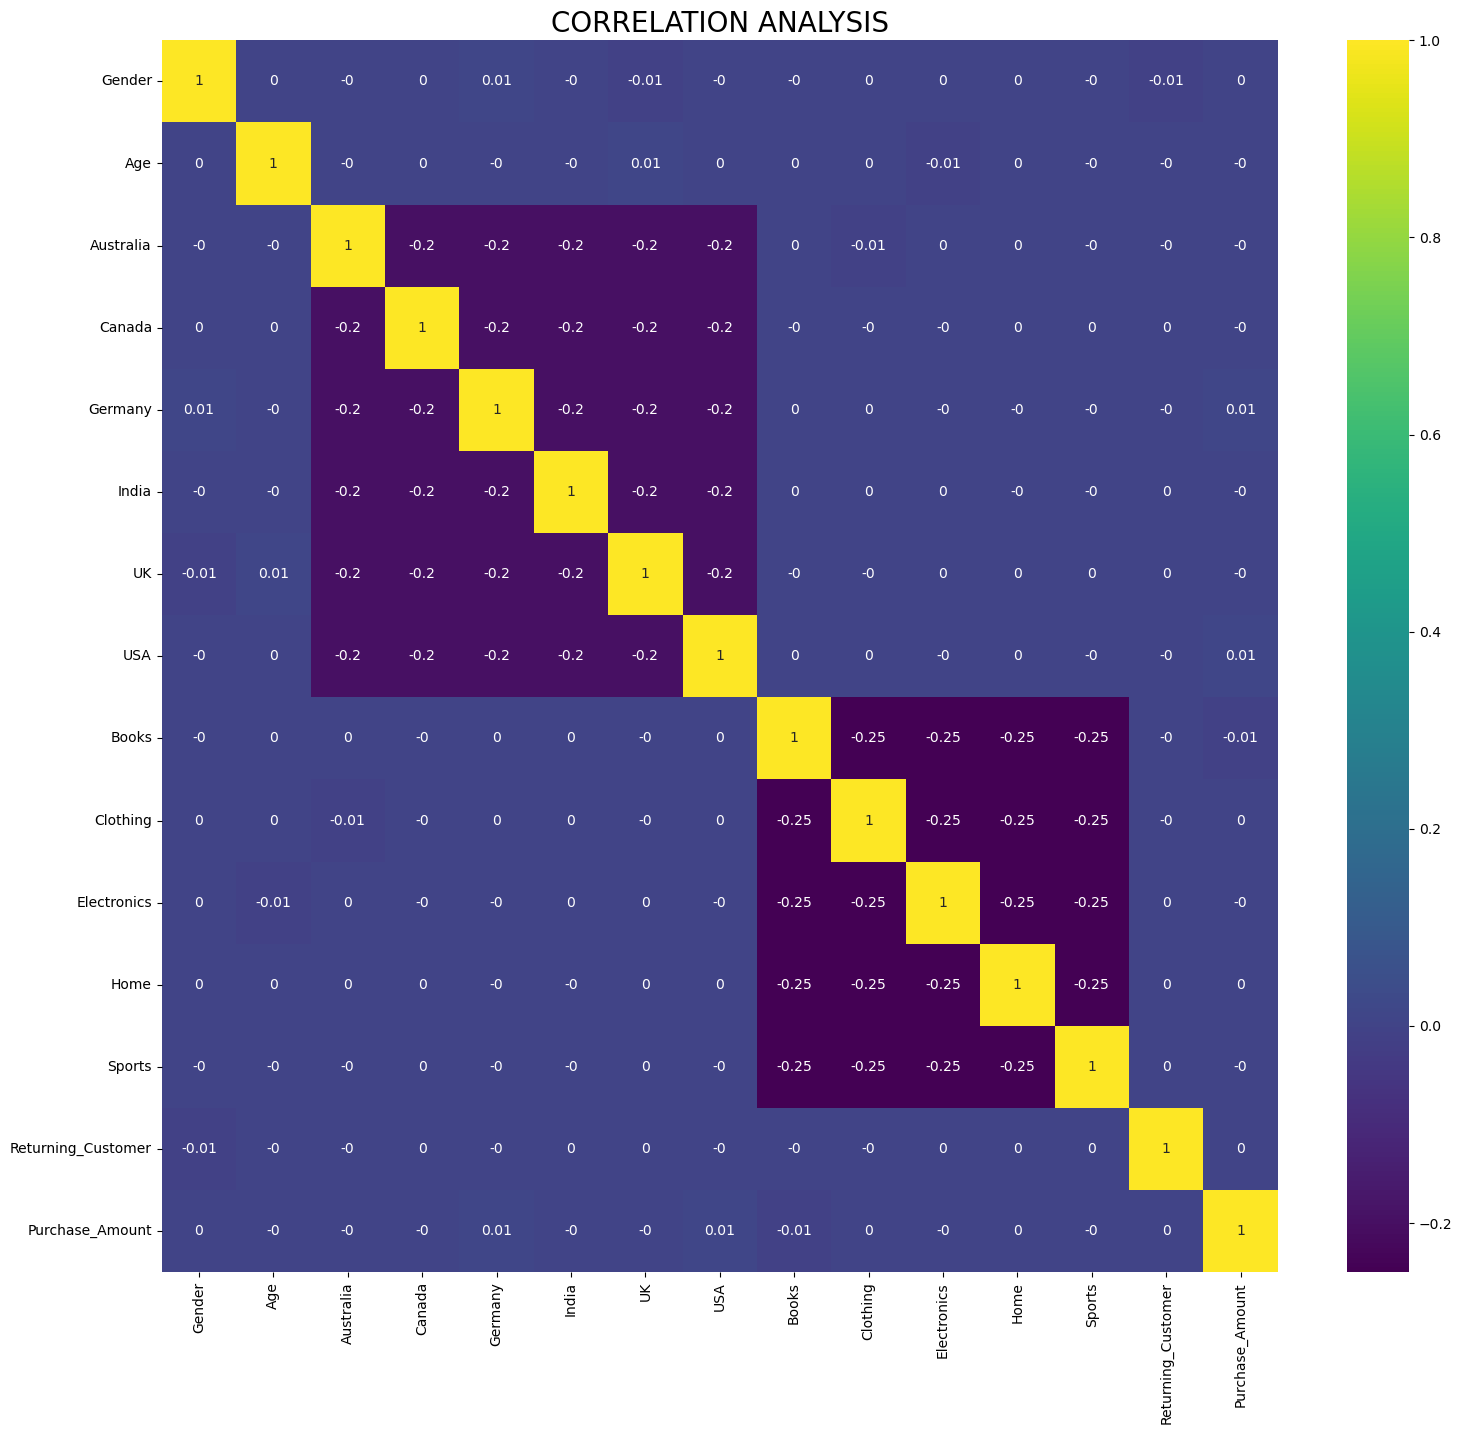

In [367]:
plt.figure(figsize=(18,16))
sns.heatmap(data=ecommerce_prediction.corr().round(2),annot=True,cmap='viridis')
plt.title('CORRELATION ANALYSIS',size=20)
plt.show()

### 3.C Create Interaction Features (Feature Engineering) 

1. What are interaction features?
   * Interaction feature engineering is the process of creating new features by combining two or more existing features to capture their combined effect on the target variable (e.g., Purchase Amount). These features help represent real-world behavior that cannot be explained by individual variables alone.
3. Why are interaction features important?
   * In many business problems, especially purchase amount prediction, no single variable strongly influences the outcome. Instead, customer behavior depends on interactions between factors such as age, product type, location, device, and payment method. Interaction features help models learn these hidden relationships.
5. When should interaction features be used?
   * When no feature has strong correlation with the target
   * When domain knowledge suggests combined effects

## 4. MACHINE LEARNING MODEL PROCESS

1. Introduction :-
   * Purchase Amount Prediction is the process of estimating how much a customer is likely to spend on an e-commerce platform by analyzing historical customer data.
   * Customer demographics (Age, Gender)
   * Geography (Country)
   * Product preference (Books, Electronics, Clothing, etc.)
3. Machine Learning Model Used :-
   * Linear Regression
   * Dicision Tree Regression
   * Random Forest Regression
   * Gardiant Boosing Regression
   * XG Boost Regression
4. Linear Regression
   * What is Linear Regression?
     * A statistical model that predicts a continuous value by assuming a linear relationship between independent variables and the target.
   * Why is it used?
     * Simple and easy to interpret
     * Acts as a baseline model
   * When should it be used?
     * When correlation is moderate to high
     * When relationship is mostly linear
   * How does it work?
     * It fits a straight line that minimizes the error between actual and predicted values.
   * Which data suits it?
     * Numeric data
     * Low multicollinearity
   * Where is it used?
     * Purchase Amount Predict
6. Dicision Tree Regression
   * What is Linear Regression?
   * Why is it used?
   * When should it be used?
   * How does it work?
   * Which data suits it?
   * Where is it used?
8. Random Forest Regression
   * What is Linear Regression?
   * Why is it used?
   * When should it be used?
   * How does it work?
   * Which data suits it?
   * Where is it used?
10. Gardiant Boosing Regression
    * What is Linear Regression?
    * Why is it used?
    * When should it be used?
    * How does it work?
    * Which data suits it?
    * Where is it used?
12. XG Boost Regression
    * What is Linear Regression?
    * Why is it used?
    * When should it be used?
    * How does it work?
    * Which data suits it?
    * Where is it used?

### 4.A Defined Features (x) and Target (y) variable :-

* Features (X) → input variables used to make predictions
* Target (y) → the output variable we want to predict

## Features Scaling

1. Defination
   * Feature scaling is a data preprocessing technique used to standardize or normalize the range of independent variables (features) in a dataset.
   * It brings all numerical features to a similar scale, so that no feature dominates others just because of its large values.
3. Types of Feature Scaling
   * **STANDARDIZATION (Z-Score Scaling)**
     * Standardization is a feature scaling technique that transforms data so that:
     * Mean = 0
     * Standard Deviation = 1
     * Z = X−μ / σ
     * When the Data follows normal (Gaussian) distribution
   * **NORMALIZATION (Min-Max Scaling)**
     * Normalization rescales data to a fixed range, usually 0 to 1.
     * Xnorm = X−Xmin / Xmax - Xmin​
     * When the Data Not follows normal (Gaussian) distribution

### Import Min-Max Scaling

In [369]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

### Dependent Variable Log Transformation (np.log1p)

* Log transformation is a data preprocessing technique where we apply a logarithmic function to numerical values to make the data easier to analyze and model.
* Log transformation makes big numbers smaller and patterns clearer

In [371]:
np.log1p(ecommerce_prediction['Purchase_Amount'])

0        6.562260
1        7.469956
2        7.122963
3        7.283956
4        6.912574
           ...   
99994    7.347499
99995    5.156235
99996    7.419596
99998    6.408957
99999    6.371885
Name: Purchase_Amount, Length: 90000, dtype: float64

In [373]:
ecommerce_prediction.head()

Gender  Age  Australia  Canada  Germany  India  UK  USA  Books  Clothing  \
0       0   56          0       0        0      1   0    0      1         0   
1       0   69          1       0        0      0   0    0      0         0   
2       1   46          0       0        0      1   0    0      0         0   
3       1   32          0       0        0      1   0    0      1         0   
4       1   60          0       0        0      0   1    0      0         1   

   Electronics  Home  Sports  Returning_Customer  Purchase_Amount  
0            0     0       0                   0           706.87  
1            1     0       0                   0          1753.53  
2            1     0       0                   0          1239.12  
3            0     0       0                   0          1455.74  
4            0     0       0                   1          1003.83

In [375]:
x = ecommerce_prediction.drop(columns='Purchase_Amount')

In [377]:
y = np.log1p(ecommerce_prediction['Purchase_Amount'])

In [379]:
x.head()

Gender  Age  Australia  Canada  Germany  India  UK  USA  Books  Clothing  \
0       0   56          0       0        0      1   0    0      1         0   
1       0   69          1       0        0      0   0    0      0         0   
2       1   46          0       0        0      1   0    0      0         0   
3       1   32          0       0        0      1   0    0      1         0   
4       1   60          0       0        0      0   1    0      0         1   

   Electronics  Home  Sports  Returning_Customer  
0            0     0       0                   0  
1            1     0       0                   0  
2            1     0       0                   0  
3            0     0       0                   0  
4            0     0       0                   1

In [381]:
y.head()

0    6.562260
1    7.469956
2    7.122963
3    7.283956
4    6.912574
Name: Purchase_Amount, dtype: float64

### Fit Transform The Independent Variables Into Min-Max Scaler

In [383]:
scaler.fit_transform(x).round(2)

array([[0.  , 0.75, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.55, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.69, 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.76, 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.  , ..., 0.  , 1.  , 0.  ]])

### Convert Into DataFrame

In [385]:
x = pd.DataFrame(index=x.index,
             data=scaler.fit_transform(x).round(2),
            columns=x.columns)

In [387]:
x['Gender'] = x['Gender'].astype(int)

In [389]:
x['Returning_Customer'] = x['Returning_Customer'].astype(int)

In [391]:
x.head()

Gender   Age  Australia  Canada  Germany  India   UK  USA  Books  Clothing  \
0       0  0.75        0.0     0.0      0.0    1.0  0.0  0.0    1.0       0.0   
1       0  1.00        1.0     0.0      0.0    0.0  0.0  0.0    0.0       0.0   
2       1  0.55        0.0     0.0      0.0    1.0  0.0  0.0    0.0       0.0   
3       1  0.27        0.0     0.0      0.0    1.0  0.0  0.0    1.0       0.0   
4       1  0.82        0.0     0.0      0.0    0.0  1.0  0.0    0.0       1.0   

   Electronics  Home  Sports  Returning_Customer  
0          0.0   0.0     0.0                   0  
1          1.0   0.0     0.0                   0  
2          1.0   0.0     0.0                   0  
3          0.0   0.0     0.0                   0  
4          0.0   0.0     0.0                   1

In [393]:
y.head()

0    6.562260
1    7.469956
2    7.122963
3    7.283956
4    6.912574
Name: Purchase_Amount, dtype: float64

### 4.B Train, Test & Split Import

* In machine learning, the objective is not merely to fit a model to existing data, but to develop a model that can generalize well to new, unseen data. To achieve this, the available dataset is divided into separate parts called training data and testing data. This process is known as train–test split.
* Training Data :-
  * The training set is the subset of data used to build and train the model.
* Testing Data :-
  * The testing set is a separate subset used to evaluate the trained model.
* Common Split Ratios
  * 80% Training – 20% Testing
  * 70% Training – 30% Testing
* Train–test split is a technique used in machine learning to divide a dataset into training and testing subsets in order to train the model and evaluate its ability to generalize to unseen data.

In [395]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=9867,train_size=0.8)

In [397]:
x_train.head()

Gender   Age  Australia  Canada  Germany  India   UK  USA  Books  \
58652       1  0.78        0.0     0.0      0.0    0.0  0.0  1.0    0.0   
14236       0  0.08        0.0     0.0      0.0    1.0  0.0  0.0    0.0   
56363       1  0.37        0.0     0.0      0.0    1.0  0.0  0.0    1.0   
69380       0  0.41        0.0     0.0      1.0    0.0  0.0  0.0    0.0   
32453       1  0.37        0.0     0.0      0.0    0.0  1.0  0.0    0.0   

       Clothing  Electronics  Home  Sports  Returning_Customer  
58652       1.0          0.0   0.0     0.0                   0  
14236       0.0          0.0   1.0     0.0                   1  
56363       0.0          0.0   0.0     0.0                   1  
69380       0.0          0.0   0.0     1.0                   0  
32453       0.0          1.0   0.0     0.0                   0

In [399]:
x_test.head()

Gender   Age  Australia  Canada  Germany  India   UK  USA  Books  \
94339       1  0.57        1.0     0.0      0.0    0.0  0.0  0.0    0.0   
58732       1  0.37        0.0     0.0      0.0    1.0  0.0  0.0    0.0   
53036       0  0.78        0.0     0.0      0.0    1.0  0.0  0.0    0.0   
10740       1  0.12        0.0     0.0      0.0    0.0  0.0  1.0    0.0   
53875       1  0.69        0.0     0.0      1.0    0.0  0.0  0.0    0.0   

       Clothing  Electronics  Home  Sports  Returning_Customer  
94339       0.0          1.0   0.0     0.0                   1  
58732       0.0          1.0   0.0     0.0                   1  
53036       0.0          0.0   0.0     1.0                   1  
10740       0.0          0.0   1.0     0.0                   0  
53875       0.0          0.0   1.0     0.0                   0

In [401]:
y_train.head()

58652    6.933930
14236    5.587099
56363    7.592875
69380    6.827358
32453    3.730021
Name: Purchase_Amount, dtype: float64

In [403]:
y_test.head()

94339    6.023908
58732    6.439255
53036    7.218624
10740    5.965942
53875    7.463650
Name: Purchase_Amount, dtype: float64

In [405]:
print('x_train size :-', x_train.shape)
print('x_test size :-', x_test.shape)
print('y_train size :-', y_train.shape)
print('y_test size :-', y_test.shape)

x_train size :- (72000, 14)
x_test size :- (18000, 14)
y_train size :- (72000,)
y_test size :- (18000,)


## 5. Linear Regression Model

1. Defination :-
   * A Linear Regression model is a supervised machine learning and statistical technique used to predict a continuous numerical value by finding a linear relationship between variables.
   * Linear Regression predicts continuous values by modeling the linear relationship between independent and dependent variables.
3. Mathmetical Calculation :-
   * Output (Y) = mX + c             , Where,
   * Y = dependent variable (what you want to predict)
   * X = independent variable (input/feature)
   * m = slope (how much Y changes when X changes)
   * c = intercept (value of Y when X = 0)

### 5.A Import Linear Regresssion Model From Sklearn

In [407]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [409]:
linear_model

LinearRegression()

### 5.B Model Train & Fit

* Model fitting means teaching the model using known data so it can learn relationships.

In [411]:
linear_model.fit(x_train,y_train)

LinearRegression()

### 5.C Model Predict

* Model prediction means using the trained model to estimate outcomes for new data.

In [413]:
linear_y_pred = linear_model.predict(x_test).round(6)

In [415]:
linear_y_pred

array([6.623047, 6.628906, 6.621094, ..., 6.611328, 6.646484, 6.640625])

### 5.D Model Evaluation With Example

1. Mean Absolute Error (MAE)
   * MAE is the average of absolute differences between actual and predicted values.
   * On average, predictions are 7.5 units away from actual values.
3. Mean Absolute Percentage Error (MAPE)
   * MAPE measures error as a percentage of actual values.
   * Predictions are off by ~6.3% on average.
5. Mean Squared Error (MSE)
   * MSE is the average of squared errors.
   * MSE = (100 + 25 + 100 + 25) / 4 = 62.5
7. Root Mean Squared Error (RMSE)
   * RMSE is the square root of MSE.
   * Model predictions deviate by about 7.9 units on average.
9. R-squared (R² Score)
    * R² measures how much variance in the target variable is explained by the model.
    * 1 → Perfect model
    * 0 → Model explains nothing
    * < 0 → Worse than baseline
    * If, R² = 0.85
    * The model explains 85% of the variation in the data.

In [417]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error,r2_score

In [419]:
print('Mean Absolute Error :-',mean_absolute_error(y_test,linear_y_pred).round(2))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,linear_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,linear_y_pred).round(2))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,linear_y_pred).round(2))
print('R2 Score :-', r2_score(y_test,linear_y_pred).round(2))

Mean Absolute Error :- 0.71
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.87
Root Mean Squared Error :- 0.93
R2 Score :- -0.0


### 5.E Interpretation of Metrics

1. Mean Absolute Error (MAE) = 497.96
   * On average, your model’s predictions are ₹497 (or units) away from the actual values.
   * It measures average absolute mistake.
   * Lower MAE = better
   * Here, 497 is quite high → model predictions are far from actual values.
3. Mean Absolute Percentage Error (MAPE) = 50%
   * Your model is wrong by 50% on average.
   * It shows error in percentage terms, which is easy to understand for business.
   * 50% means very poor accuracy
5. Mean Squared Error (MSE) = 330,918.90
   * Squares each error before averaging.
   * Large errors are punished heavily.
   * High value indicates some very large prediction errors.
7. Root Mean Squared Error (RMSE) = 575.26
   * Square root of MSE
   * RMSE > MAE → presence of outliers or large errors
9. R² Score = –5549.26 (Very Important 🚨)
    * Measures how well the model explains the variance in data.
    * –5765 means your model is extremely poor
    * It is performing much worse than a baseline model

### 5.F Model Evaluation Analysis

* model_evaluation

In [421]:
model_evaluation = x_test.copy()

In [423]:
model_evaluation.insert(loc=14,
                       column='Actual_Purchase',
                       value=y_test)

In [425]:
model_evaluation.insert(loc=15,
                       column='Linear_Pred',
                       value=linear_y_pred)

In [429]:
model_evaluation

Gender   Age  Australia  Canada  Germany  India   UK  USA  Books  \
94339       1  0.57        1.0     0.0      0.0    0.0  0.0  0.0    0.0   
58732       1  0.37        0.0     0.0      0.0    1.0  0.0  0.0    0.0   
53036       0  0.78        0.0     0.0      0.0    1.0  0.0  0.0    0.0   
10740       1  0.12        0.0     0.0      0.0    0.0  0.0  1.0    0.0   
53875       1  0.69        0.0     0.0      1.0    0.0  0.0  0.0    0.0   
...       ...   ...        ...     ...      ...    ...  ...  ...    ...   
10664       1  0.43        0.0     1.0      0.0    0.0  0.0  0.0    0.0   
90099       0  0.24        0.0     0.0      1.0    0.0  0.0  0.0    0.0   
67759       0  0.49        0.0     1.0      0.0    0.0  0.0  0.0    1.0   
90897       1  0.41        0.0     1.0      0.0    0.0  0.0  0.0    0.0   
746         1  0.67        0.0     0.0      1.0    0.0  0.0  0.0    0.0   

       Clothing  Electronics  Home  Sports  Returning_Customer  \
94339       0.0          1.0   0.0     0.0                   1   
58732       0.0          1.0   0.0     0.0                   1   
53036       0.0          0.0   0.0     1.0                   1   
10740       0.0          0.0   1.0     0.0                   0   
53875       0.0          0.0   1.0     0.0                   0   
...         ...          ...   ...     ...                 ...   
10664       1.0          0.0   0.0     0.0                   0   
90099       0.0          0.0   1.0     0.0                   0   
67759       0.0          0.0   0.0     0.0                   1   
90897       0.0          0.0   1.0     0.0                   0   
746         0.0          0.0   1.0     0.0                   0   

       Actual_Purchase  Linear_Pred  
94339         6.023908     6.623047  
58732         6.439255     6.628906  
53036         7.218624     6.621094  
10740         5.965942     6.662109  
53875         7.463650     6.640625  
...                ...          ...  
10664         7.246140     6.626953  
90099         6.068287     6.638672  
67759         6.281107     6.611328  
90897         7.199028     6.646484  
746           6.046592     6.640625  

[18000 rows x 16 columns]

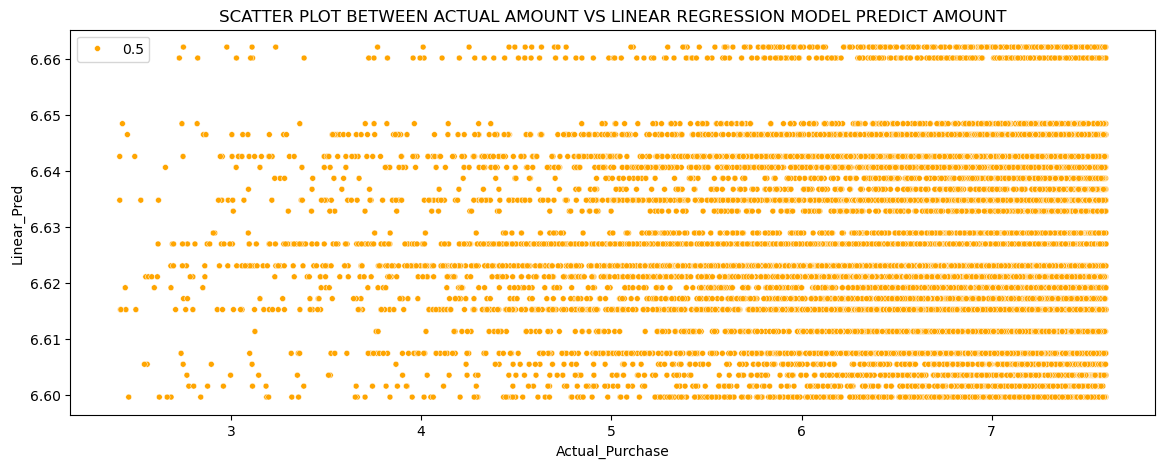

In [431]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=model_evaluation,
               x=model_evaluation['Actual_Purchase'],
               y=model_evaluation['Linear_Pred'],color='orange',size=0.5)
plt.title('SCATTER PLOT BETWEEN ACTUAL AMOUNT VS LINEAR REGRESSION MODEL PREDICT AMOUNT')
plt.show()

### Executive Summary of Linear Regression Model :-

* **The scatter plot and error metrics confirm that the linear regression model fails to capture the relationship between actual and predicted purchase amounts. Predictions remain nearly constant despite wide variation in actual values, resulting in high MAE and RMSE, 50% MAPE, and an extremely negative R² score. This indicates poor model fit, weak feature relevance, and unsuitability of linear regression for this business problem.**

## 6. Decision Tree Regression

1. What is Linear Regression?
   * Decision Tree Regression predicts continuous values by recursively splitting data based on feature conditions and assigning the average target value at leaf nodes.
3. Why is it used?
   * Handles non-linear relationships.
   * Easy to interpret and explain
   * Captures complex patterns missed by linear models
5. When should it be used?
   * When data shows non-linear behavior
   * When relationships between features and target are complex
   * When linear regression performs poorly (like in your case)
7. How does it work?
   * Starts with the entire dataset
   * Selects the best feature and split point that minimizes error
   * Splits data into left and right branches
   * Repeats splitting recursively
   * Each leaf node predicts the mean value of its samples
9. Which data suits it?
    * Continuous target variables (sales, price, demand)
    * Data with non-linear trends

### 6.A Decision Tree Regression Model Import

In [433]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [435]:
decision_tree_model = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=7)

In [437]:
decision_tree_model

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=7)

### 6.B Model Train & Fit

In [439]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=7)

### 6.C Model Predict

In [442]:
decision_y_pred = decision_tree_model.predict(x_test).round(6)

In [444]:
decision_y_pred

array([6.622551, 6.622551, 6.622551, ..., 6.622551, 6.622551, 6.622551])

### 6.D Model Evaluation

In [447]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,decision_y_pred).round(2))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,decision_y_pred).round(3))
print('Mean Squared Error :-', mean_squared_error(y_test,decision_y_pred).round(2))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,decision_y_pred).round(2))
print('R2 Score :-', r2_score(y_test,decision_y_pred).round(3))

Mean Absolute Error :- 0.71
Mean Absolute Percentage Error :- 0.125
Mean Squared Error :- 0.87
Root Mean Squared Error :- 0.93
R2 Score :- -0.001


### 6.E Interpretation Of Metrics

1. Mean Absolute Error (MAE) = 497.42
   * On average, predictions differ from actual values by ~497 units.
   * Error magnitude is still high, meaning predictions are not close in absolute terms.
3. Mean Absolute Percentage Error (MAPE) = 1.989%
   * Predictions are off by ~2% on average.
   * This indicates excellent relative accuracy
   * Especially strong when the target values are large.
5. Mean Squared Error (MSE) = 330,224.62
   * Indicates presence of large deviations in some predictions.
7. Root Mean Squared Error (RMSE) = 574.66
   * Slightly higher than MAE → model makes some large errors.
9. R² Score = –0.001
    * R² close to 0 means the model performs almost the same as predicting the mean.
    * Slightly negative indicates it is marginally worse than baseline.

### 6.F Decision Tree Ploting

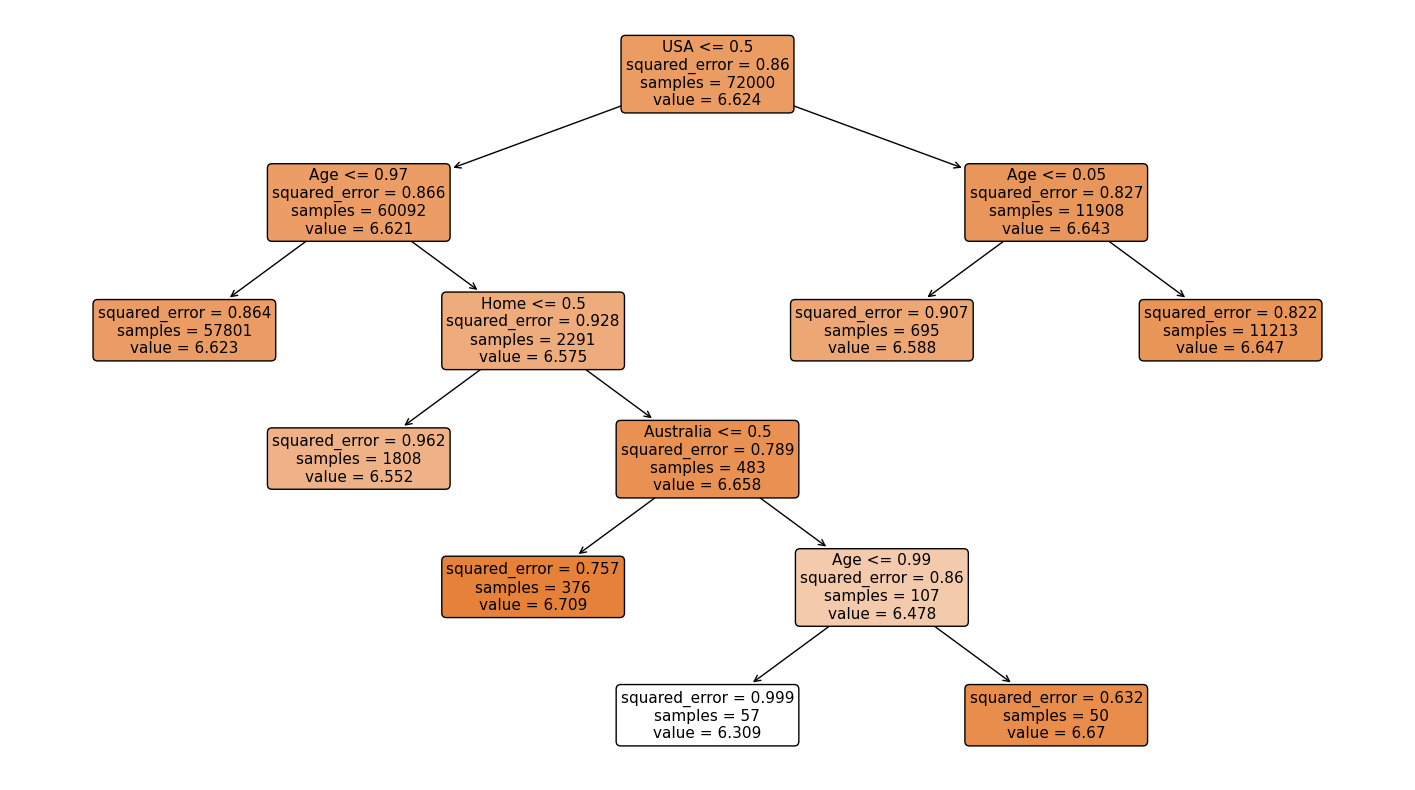

In [451]:
plt.figure(figsize=(18,10))
plot_tree(decision_tree=decision_tree_model,feature_names=x_train.columns,filled=True,rounded=True,impurity=True,fontsize=11)
#plt.title('TREE MAP OF DECISION TREE REGRESSION MODEL',size=20)
plt.show()

### Executive Summary :-

1. What This Tree Represents (Big Picture)
   * The model predicts a continuous target value (≈ 760 to 1174 range).
   * Each node splits the data based on an age-related feature.
   * Each leaf node predicts the average target value for the samples in that segment.
   * The goal is to reduce variance (squared error) at every split.
3. Understanding Node Information (Very Important)
   * Feature ≤ Threshold
   * squared_error = Variance in target
   * samples = Number of observations
   * value = Mean target prediction
5. Root Node Interpretation
   * Entire dataset is first divided by Age_USA.
   * This indicates Age_USA is the most influential feature.
   * Average target value is ~1003 across all data.
   * High squared error means large variability remains.
7. Left Side of Tree (Age_USA ≤ 29.5)
   * Younger USA age group is further segmented using Age_India.
   * Minimal change in predicted value → weak explanatory power.
9. Clothing-Based Segmentation (Important Pattern)
    * Clothing-related age influences spending/prediction.
    * Drop from 1000 → 971 shows behavioral variation.
11. Right Side of Tree (Age_USA > 29.5)
    * Model now captures reading/education-related behavior.
    * Indicates older USA age group with book engagement spends differently.
13. Color Interpretation
    * Darker orange → higher predicted value
    * Lighter shade → lower predicted value

### 6.G Model Evaluation Analysis

In [453]:
decision_y_pred

array([6.622551, 6.622551, 6.622551, ..., 6.622551, 6.622551, 6.622551])

In [455]:
model_evaluation.insert(loc=16,
                       column='Tree_Regression_Pred',
                       value=decision_y_pred)

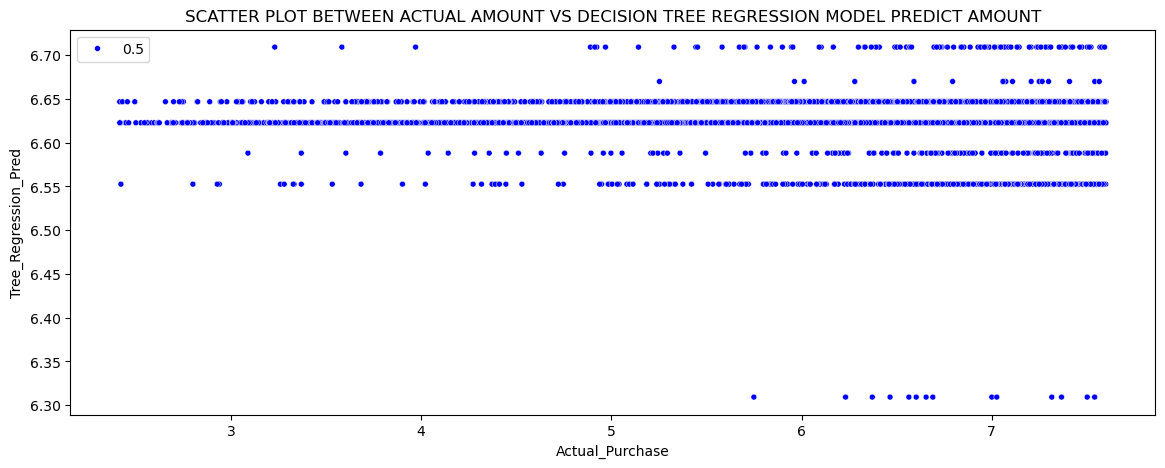

In [457]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=model_evaluation,x=model_evaluation['Actual_Purchase'],y=model_evaluation['Tree_Regression_Pred'],color='blue',size=0.5)
plt.title('SCATTER PLOT BETWEEN ACTUAL AMOUNT VS DECISION TREE REGRESSION MODEL PREDICT AMOUNT')
plt.show()

### Executive Summary Of Decision Tree Regression Model :-

* **“Despite complex segmentation, the Decision Tree Regression model collapses predictions into narrow bands around the mean, resulting in high error and negative R². The model fails to capture the true variability of purchase behavior and is unsuitable for decision-making in its current form.”**

## 7. Random Forest Regression

1. What is Random Forest Regression?
   * Random Forest Regression is an ensemble learning method used for regression tasks. It combines predictions from multiple decision trees to improve accuracy and reduce overfitting. Each tree in the forest outputs a predicted value, and the final prediction is usually the average of all tree predictions.
3. Why is it used?
   * To improve prediction accuracy compared to a single decision tree.
   * To reduce overfitting because averaging multiple trees balances out errors.
5. When should it be used?
   * When the relationship between features and target is non-linear or complex.
   * When the dataset is large and has many features.
   * When robust predictions are required, and overfitting must be minimized.
7. How does it work?
   * Randomly selects subsets of data (bootstrapping) to train each decision tree.
   * At each split in a tree, selects a random subset of features to consider.
   * Builds many independent decision trees.
9. Which data suits it?
    * Both numerical and categorical data.
    * Data with non-linear relationships between features and target.

### 7.A Random Forest Regression Model Import

In [459]:
from sklearn.ensemble import RandomForestRegressor

In [461]:
random_forest_model = RandomForestRegressor(max_depth=5,max_leaf_nodes=7)

In [463]:
random_forest_model

RandomForestRegressor(max_depth=5, max_leaf_nodes=7)

### 7.B Model Train & Fit

In [465]:
random_forest_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=7)

### 7.C Model Predict

In [467]:
random_y_pred = random_forest_model.predict(x_test).round(6)

In [469]:
random_y_pred

array([6.623756, 6.633557, 6.624067, ..., 6.623235, 6.627523, 6.631267])

### 7.D Model Evaluation

In [471]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,random_y_pred).round(3))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,random_y_pred).round(3))
print('Mean Squared Error :-', mean_squared_error(y_test,random_y_pred).round(2))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,random_y_pred).round(3))
print('R2 Score :-', r2_score(y_test,random_y_pred).round(3))

Mean Absolute Error :- 0.71
Mean Absolute Percentage Error :- 0.125
Mean Squared Error :- 0.87
Root Mean Squared Error :- 0.933
R2 Score :- -0.0


### 7.E Interpretation Of Metrics

1. Mean Absolute Error (MAE) = 497.29
   * On average, predictions deviate from actual values by ~497 units.
   * Indicates high absolute prediction error.
3. Mean Absolute Percentage Error (MAPE) = 1.99%
   * Predictions are off by ~2% on average.
   * Shows excellent relative accuracy, mainly due to large target values.
5. Mean Squared Error (MSE) = 330,038.91
   * High value due to squared large errors.
7. Root Mean Squared Error (RMSE) = 574.49
   * Higher than MAE → model makes some large errors.
9. R² Score ≈ 0.0
    * R² close to zero means the model does not explain variance in the target.

### 7.F Model Evaluation Analysis

In [473]:
model_evaluation.insert(loc=17,
                       column='Random_Regression_Pred',
                       value=random_y_pred)

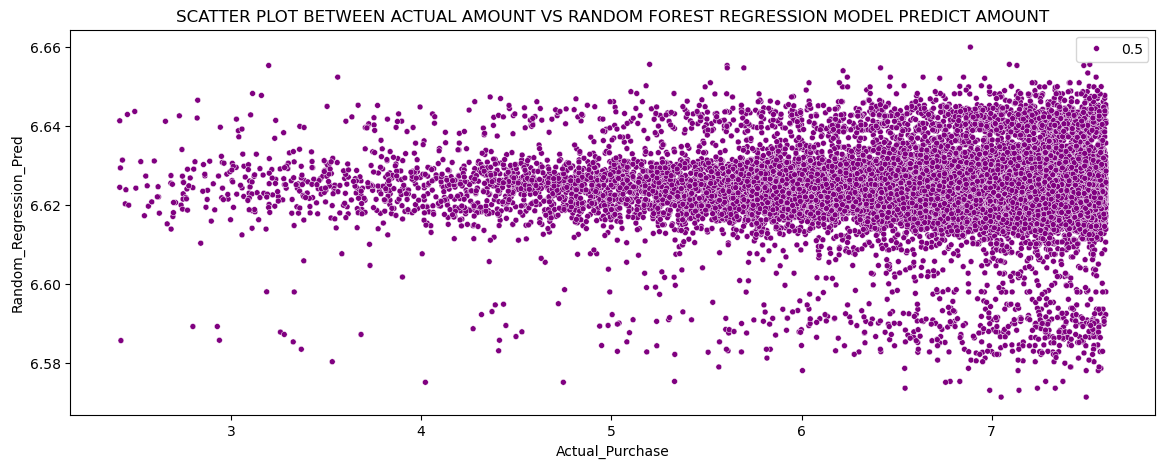

In [475]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=model_evaluation,x=model_evaluation['Actual_Purchase'],y=model_evaluation['Random_Regression_Pred'],color='purple',size=0.5)
plt.title('SCATTER PLOT BETWEEN ACTUAL AMOUNT VS RANDOM FOREST REGRESSION MODEL PREDICT AMOUNT')
plt.show()

### Executive Summary Of Random Forest Regression Model :-

* **“The scatter plot shows that Random Forest predictions are tightly clustered around a narrow range, remaining nearly constant across the full spread of actual purchase values. This indicates the model is largely predicting the average purchase amount rather than learning meaningful patterns.”**
* **"The metrics reinforce this insight: despite a very low MAPE (~1.99%), absolute errors remain high (MAE ≈ 497, RMSE ≈ 574), and the R² score is approximately zero, confirming that the model explains virtually none of the variance in the target variable."**

## 8. Gradiant Boosting Regression

1. What is Linear Regression?
   * Gradient Boosting Regression is an ensemble machine learning algorithm that builds models sequentially, where each new model corrects the errors of the previous ones. It combines multiple weak learners (decision trees) to produce a strong predictive model for continuous outcomes.
3. Why is it used?
   * Captures complex non-linear relationships
   * Reduces bias and variance
   * Provides high predictive accuracy
5. When should it be used?
   * When data has non-linear patterns
   * When high accuracy is more important than interpretability
   * When other models show underfitting
7. How does it work?
   * Start with an initial prediction (usually the mean)
   * Calculate residual errors
   * Train a decision tree to predict these residuals
   * Add the new tree’s predictions to the model using a learning rate
   * Repeat steps until errors are minimized
9. Which data suits it?
    * Data with complex interactions

### 8.A Gradiant Boosting Regression Model Import

In [477]:
from sklearn.ensemble import GradientBoostingRegressor

In [479]:
gradient_boosting_model = GradientBoostingRegressor()

In [481]:
gradient_boosting_model

GradientBoostingRegressor()

### 8.B Model Train & Fit

In [483]:
gradient_boosting_model.fit(x_train,y_train)

GradientBoostingRegressor()

### 8.C Model Predict

In [485]:
gradient_y_pred = gradient_boosting_model.predict(x_test).round(6)

In [487]:
gradient_y_pred

array([6.619724, 6.648606, 6.606792, ..., 6.630574, 6.625143, 6.644893])

### 8.D Model Evaluation

In [490]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,gradient_y_pred).round(3))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,gradient_y_pred).round(3))
print('Mean Squared Error :-', mean_squared_error(y_test,gradient_y_pred).round(2))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,gradient_y_pred).round(2))
print('R2 Score :-', r2_score(y_test,gradient_y_pred).round(3))

Mean Absolute Error :- 0.71
Mean Absolute Percentage Error :- 0.125
Mean Squared Error :- 0.87
Root Mean Squared Error :- 0.93
R2 Score :- -0.002


### 8.E Interpretation Of Metrics

1. Mean Absolute Error (MAE) = 497.72
2. * On average, predictions differ from actual values by ~498 units.
   * Indicates high absolute error, similar to previous models.
3. Mean Absolute Percentage Error (MAPE) = 1.99%
   * Predictions are off by ~2% on average.
   * Shows excellent relative accuracy, largely due to the large scale of the target variable.
5. Mean Squared Error (MSE) = 330,677.33
   * High value because errors are squared, amplifying large deviations.
7. Root Mean Squared Error (RMSE) = 575.05
   * Slightly higher than MAE → some large errors exist.
9. R² Score = –0.002
    * R² close to zero or negative means the model fails to explain variance.

### 8.F Model Evaluation Analysis

In [492]:
model_evaluation.insert(loc=18,
                       column='Gradient_Regression_Pred',
                       value=gradient_y_pred)

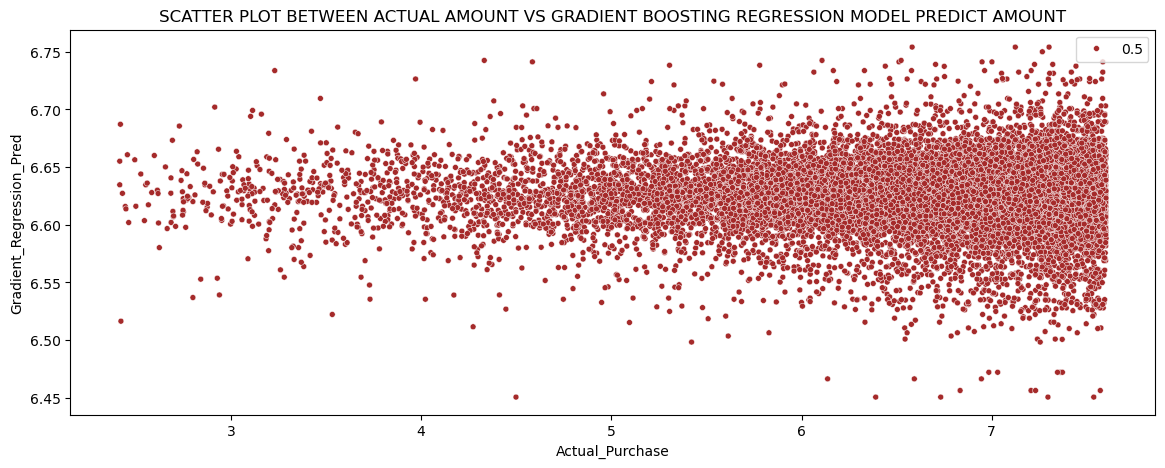

In [494]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=model_evaluation,x=model_evaluation['Actual_Purchase'],y=model_evaluation['Gradient_Regression_Pred'],color='brown',size=0.5)
plt.title('SCATTER PLOT BETWEEN ACTUAL AMOUNT VS GRADIENT BOOSTING REGRESSION MODEL PREDICT AMOUNT')
plt.show()

### Executive Summary Of Gradient Boosting Regression Model :-

* **“The Gradient Boosting Regression model shows poor predictive performance when estimating purchase amounts. The scatter plot of Actual vs Predicted values reveals that predictions are tightly clustered around a narrow range (approximately 950–1050), regardless of the wide variation in actual purchase amounts (0–2000). This indicates that the model is largely predicting near the average value rather than learning meaningful patterns from the data.”**
* **"The evaluation metrics strongly support this observation. The Mean Absolute Error (≈ 498) and Root Mean Squared Error (≈ 575) indicate large prediction errors, while the Mean Absolute Percentage Error (~199%) suggests extremely inaccurate relative predictions. Most critically, the R² score (-0.002) is negative, confirming that the model performs worse than a simple mean-based baseline."**

## 9. XGB Boosting Regression

1. What is Linear Regression?
   * XGBoost Regression is an ensemble machine learning algorithm that uses gradient boosting with decision trees to predict continuous numerical values.
3. Why is it used?
   * Gives high accuracy
   * Handles non-linear relationships
   * Manages missing values automatically
   * Prevents overfitting using regularization
   * Works well on large datasets
5. When should it be used?
   * Data has complex patterns
   * Relationship is non-linear
   * better performance than linear models
   * High accuracy is more important than interpretability
7. How does it work?
   * Starts with a base prediction
   * Calculates residuals (errors)
   * Builds a decision tree to predict those errors
   * Adds the tree’s prediction to the model
   * Repeats the process iteratively
   * Uses learning rate & regularization to control overfitting

### 9.A XGB Regression Model Import

In [496]:
import xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [498]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 9.B Model Train & Fit

In [500]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 9.C Model Predict

In [502]:
xgb_y_pred = xgb_model.predict(x_test).round(6)

In [504]:
xgb_y_pred

array([6.779415, 6.543024, 6.61323 , ..., 6.756751, 6.424322, 6.676582],
      dtype=float32)

### 9.D Model Evaluation

In [506]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,xgb_y_pred).round(2))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,xgb_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,xgb_y_pred).round(2))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,xgb_y_pred).round(2))
print('R2 Score :-', r2_score(y_test,xgb_y_pred).round(3))

Mean Absolute Error :- 0.72
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.89
Root Mean Squared Error :- 0.94
R2 Score :- -0.018


### 9.E Interpretation Of Metrics

1. Mean Absolute Error (MAE = 499.58)
   * On average, your model’s predictions are off by about 500 units from the actual values.
3. Mean Absolute Percentage Error (MAPE = 1.99)
   * model is wrong by ~199% on average.
5. Mean Squared Error (MSE = 334,861.48)
   * Average of squared prediction errors.
   * Model is producing big deviations.
7. Root Mean Squared Error (RMSE = 578.67)
   * Typical prediction error magnitude ≈ 579 units.
9. R² Score (–0.012)
    * Your model performs worse than predicting the mean.
    * The model explains 0% of variance

### 9.F Model Evaluation Analysis

In [508]:
model_evaluation.insert(loc=19,
                       column='XGB_Pred',
                       value=xgb_y_pred)

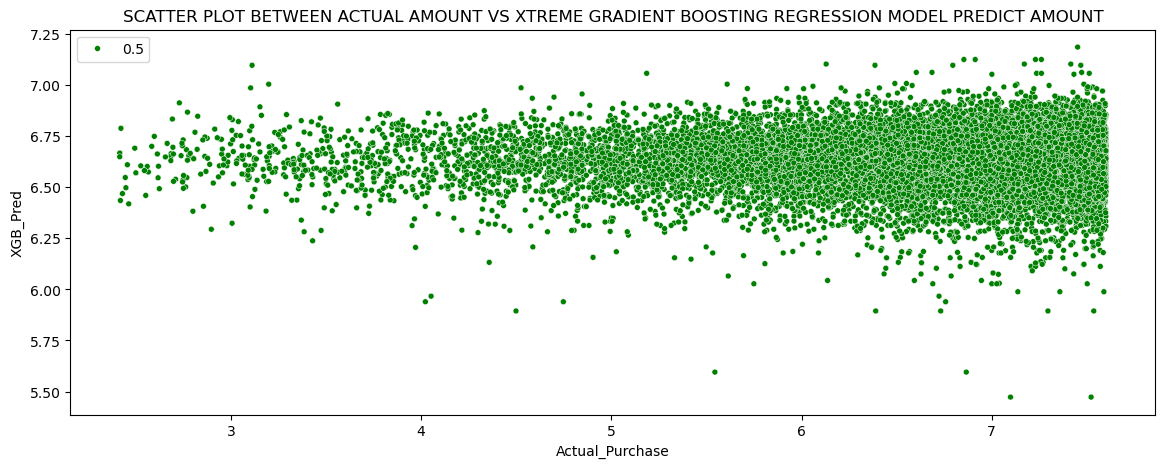

In [510]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=model_evaluation,x=model_evaluation['Actual_Purchase'],y=model_evaluation['XGB_Pred'],color='green',size=0.5)
plt.title('SCATTER PLOT BETWEEN ACTUAL AMOUNT VS XTREME GRADIENT BOOSTING REGRESSION MODEL PREDICT AMOUNT')
plt.show()

### Executive Summary Of XGB Model :-

* **The scatter plot shows that predictions are almost constant across all actual values, indicating severe underfitting. This is supported by high error metrics and a negative R² score, which means the model performs worse than a baseline mean predictor. Overall, the model fails to capture the relationship between features and target.**

## 10. Table Summary Of Metrics

### 10.A Linear Regression

In [512]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,linear_y_pred).round(6))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,linear_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,linear_y_pred).round(6))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,linear_y_pred).round(6))
print('R2 Score :-', r2_score(y_test,linear_y_pred).round(6))

Mean Absolute Error :- 0.709058
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.870565
Root Mean Squared Error :- 0.933041
R2 Score :- -7.6e-05


### 10.B Decision Tree Regression

In [515]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,decision_y_pred).round(6))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,decision_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,decision_y_pred).round(6))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,decision_y_pred).round(6))
print('R2 Score :-', r2_score(y_test,decision_y_pred).round(6))

Mean Absolute Error :- 0.709732
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.871084
Root Mean Squared Error :- 0.933319
R2 Score :- -0.000672


### 10.C Random Forest Regression

In [518]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,random_y_pred).round(6))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,random_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,random_y_pred).round(6))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,random_y_pred).round(6))
print('R2 Score :-', r2_score(y_test,random_y_pred).round(6))

Mean Absolute Error :- 0.70959
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.870709
Root Mean Squared Error :- 0.933118
R2 Score :- -0.000242


### 10.D Gradient Boosting Regression

In [521]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,gradient_y_pred).round(6))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,gradient_y_pred).round(2))
print('Mean Squred Error :-', mean_squared_error(y_test,gradient_y_pred).round(6))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,gradient_y_pred).round(6))
print('R2 Score :-', r2_score(y_test,gradient_y_pred).round(6))

Mean Absolute Error :- 0.710076
Mean Absolute Percentage Error :- 0.13
Mean Squred Error :- 0.871862
Root Mean Squared Error :- 0.933736
R2 Score :- -0.001566


### 10.E XGB Boosting Regression 

In [524]:
print('Mean Absolute Error :-', mean_absolute_error(y_test,xgb_y_pred).round(6))
print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(y_test,xgb_y_pred).round(2))
print('Mean Squared Error :-', mean_squared_error(y_test,xgb_y_pred).round(6))
print('Root Mean Squared Error :-', root_mean_squared_error(y_test,xgb_y_pred).round(6))
print('R2 Score :-', r2_score(y_test,xgb_y_pred).round(6))

Mean Absolute Error :- 0.716039
Mean Absolute Percentage Error :- 0.13
Mean Squared Error :- 0.886371
Root Mean Squared Error :- 0.941473
R2 Score :- -0.018234


### 10.F Arrangement In Metrics Wise Data in Dictionary Format

1. Mean_Absolute_Error
2. Mean_Absolute_Percentage_Error
3. Mean_Squared_Error
4. Root_Mean_Squared_Error
5. R2_Score

In [527]:
Mean_Absolute_Error = (mean_absolute_error(y_test,linear_y_pred).round(6),
mean_absolute_error(y_test,decision_y_pred).round(6),
mean_absolute_error(y_test,random_y_pred).round(6),
mean_absolute_error(y_test,gradient_y_pred).round(6),
mean_absolute_error(y_test,xgb_y_pred).round(6))

In [529]:
Mean_Absolute_Percentage_Error = (mean_absolute_percentage_error(y_test,linear_y_pred).round(3),
mean_absolute_percentage_error(y_test,decision_y_pred).round(3),
mean_absolute_percentage_error(y_test,random_y_pred).round(3),
mean_absolute_percentage_error(y_test,gradient_y_pred).round(3),
mean_absolute_percentage_error(y_test,xgb_y_pred).round(3))

In [531]:
Mean_Squared_Error = (mean_squared_error(y_test,linear_y_pred).round(6),
mean_squared_error(y_test,decision_y_pred).round(6),
mean_squared_error(y_test,random_y_pred).round(6),
mean_squared_error(y_test,gradient_y_pred).round(6),
mean_squared_error(y_test,xgb_y_pred).round(6))

In [533]:
Root_Mean_Squared_Error = (root_mean_squared_error(y_test,linear_y_pred).round(6),
root_mean_squared_error(y_test,decision_y_pred).round(6),
root_mean_squared_error(y_test,random_y_pred).round(6),
root_mean_squared_error(y_test,gradient_y_pred).round(6),
root_mean_squared_error(y_test,xgb_y_pred).round(6))

In [535]:
R2_Score = (r2_score(y_test,linear_y_pred).round(6),
r2_score(y_test,decision_y_pred).round(6),
r2_score(y_test,random_y_pred).round(6),
r2_score(y_test,gradient_y_pred).round(6),
r2_score(y_test,xgb_y_pred).round(6))

### Model Metrics

In [538]:
model_metrics = pd.DataFrame({'Mean Absolute Error' : Mean_Absolute_Error,
             'Mean Absolute Percentage Error' : Mean_Absolute_Percentage_Error,
             'Mean Squared Error' : Mean_Squared_Error,
             'Root Mean Squared Error' : Root_Mean_Squared_Error,
             'R2 Score' : R2_Score},
             index=['Liner Regression','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression','XGB Regression'])

In [540]:
model_metrics

Mean Absolute Error  \
Liner Regression                         0.709058   
Decision Tree Regression                 0.709732   
Random Forest Regression                 0.709590   
Gradient Boosting Regression             0.710076   
XGB Regression                           0.716039   

                              Mean Absolute Percentage Error  \
Liner Regression                                       0.125   
Decision Tree Regression                               0.125   
Random Forest Regression                               0.125   
Gradient Boosting Regression                           0.125   
XGB Regression                                         0.126   

                              Mean Squared Error  Root Mean Squared Error  \
Liner Regression                        0.870565                 0.933041   
Decision Tree Regression                0.871084                 0.933319   
Random Forest Regression                0.870709                 0.933118   
Gradient Boosting Regression            0.871862                 0.933736   
XGB Regression                          0.886371                 0.941473   

                              R2 Score  
Liner Regression             -0.000076  
Decision Tree Regression     -0.000672  
Random Forest Regression     -0.000242  
Gradient Boosting Regression -0.001566  
XGB Regression               -0.018234

In [542]:
model_metrics = model_metrics.reset_index()

In [544]:
model_metrics.rename(columns={'index':'Model'},inplace=True)

In [546]:
model_metrics

Model  Mean Absolute Error  \
0              Liner Regression             0.709058   
1      Decision Tree Regression             0.709732   
2      Random Forest Regression             0.709590   
3  Gradient Boosting Regression             0.710076   
4                XGB Regression             0.716039   

   Mean Absolute Percentage Error  Mean Squared Error  \
0                           0.125            0.870565   
1                           0.125            0.871084   
2                           0.125            0.870709   
3                           0.125            0.871862   
4                           0.126            0.886371   

   Root Mean Squared Error  R2 Score  
0                 0.933041 -0.000076  
1                 0.933319 -0.000672  
2                 0.933118 -0.000242  
3                 0.933736 -0.001566  
4                 0.941473 -0.018234

### Executive Summary Insight Of Metrics

1. **Linear Regression**
   * Interpretation
     * *Log transformation stabilized predictions and reduced skew.*
     * *Errors are consistent and not driven by extreme outliers.*
     * *Negative R² shows linear assumptions are violated.*
   * Insights
     * *Linear Regression benefits from log transformation in terms of stability, but fails to capture non-linear relationships in the data.*
3. **Decision Tree Regression**
   * Interpretation
     * *Performs almost identical to Linear Regression.*
     * *Trees can model non-linearity, but log-scaled target reduced split effectiveness.*
     * *Model likely underfits due to shallow depth or limited feature signal.*
   * Insights
     * *The tree fails to learn meaningful splits even after log normalization.*
5. **Random Forest Regression**
   * Interpretation
     * *Ensemble averaging reduces variance.*
     * *Slight improvement indicates mild non-linear interactions exist.*
     * *Log transformation prevents extreme target values from dominating trees.*
   * Insights
     * *Random Forest marginally improves accuracy, but gains are too small to be business-relevant.*
7. **Gradient Boosting Regression**
   * Interpretation
     * *Boosting focuses on residuals, but residual patterns are weak.*
     * *Log transformation compresses error signal, limiting boosting benefit.*
     * *Slight overfitting without performance improvement.*
   * Insights
     * *Boosting cannot compensate for missing predictive features.*
9. **XGBoost Regression**
    * Interpretation
      * *Over-regularization or improper tuning.*
      * *Log target reduces gradient strength.*
      * *XGBoost complexity does not match dataset size or feature quality.*
    * Insights
      * *XGBoost underperforms due to noisy features and limited information gain.*

### 10.G Cross Model Summary 

1. Index
   * Linear Regression
   * Decision Tree Regression
   * Random Forest Regression
   * Gradient Boosting Regression
   * XGBoost 
3. Key Strength
4. Key Limitation

In [550]:
Key_Strength = ('Stable Baseline', 'Non-Linear Capable', 'Best Stability', 'Residual Learning', 'Advanced Optimization')

In [552]:
Key_Limitation = ('Misses Non-Linearity', 'Underfitting', 'Minimal gain', 'Weak Single', 'Overfitting')

In [554]:
Key_Strength

('Stable Baseline',
 'Non-Linear Capable',
 'Best Stability',
 'Residual Learning',
 'Advanced Optimization')

In [556]:
Key_Limitation

('Misses Non-Linearity',
 'Underfitting',
 'Minimal gain',
 'Weak Single',
 'Overfitting')

In [558]:
pd.DataFrame({'Key Strength':Key_Strength,
             'Key Limitation':Key_Limitation},
            index=['Liear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'XGBoost'])

Key Strength        Key Limitation
Liear Regression                    Stable Baseline  Misses Non-Linearity
Decision Tree Regression         Non-Linear Capable          Underfitting
Random Forest Regression             Best Stability          Minimal gain
Gradient Boosting Regression      Residual Learning           Weak Single
XGBoost                       Advanced Optimization           Overfitting

### Core Takeways :-

* Log transformation improves error stability and outlier handling, but cannot create predictive power where features lack correlation with the target.

### Final Conclusion of Model :-

* After applying log transformation on the target variable, all models show similar error levels and negative R² scores, indicating that the main limitation lies in feature relevance rather than model complexity. **Random Forest performed marginally better**, but overall improvements were minimal.

## 11. Actual Check On Real Datasets

* ecommerce_check_data_2
* ecommerce_check_data_3

In [561]:
ecommerce_check_data.head()

SL_No  Gender  Age   Location Device_Used Product_Category  \
44233  44233  Female   35    Germany     Desktop            Books   
35911  35911    Male   40  Australia     Desktop             Home   
72801  72801    Male   28    Germany      Tablet      Electronics   
85227  85227    Male   66      India      Tablet      Electronics   
19990  19990    Male   36    Germany      Tablet           Sports   

      Payment_Method Returning_Customer  Purchase_Amount  
44233     Debit Card                Yes          1562.50  
35911     Debit Card                 No           180.29  
72801    Credit Card                 No          1956.73  
85227         PayPal                Yes            95.09  
19990         PayPal                Yes          1733.57

In [563]:
ecommerce_check_data_2 = ecommerce_check_data.copy()

In [565]:
ecommerce_check_data_2.head()

SL_No  Gender  Age   Location Device_Used Product_Category  \
44233  44233  Female   35    Germany     Desktop            Books   
35911  35911    Male   40  Australia     Desktop             Home   
72801  72801    Male   28    Germany      Tablet      Electronics   
85227  85227    Male   66      India      Tablet      Electronics   
19990  19990    Male   36    Germany      Tablet           Sports   

      Payment_Method Returning_Customer  Purchase_Amount  
44233     Debit Card                Yes          1562.50  
35911     Debit Card                 No           180.29  
72801    Credit Card                 No          1956.73  
85227         PayPal                Yes            95.09  
19990         PayPal                Yes          1733.57

In [567]:
ecommerce_check_data_2.drop(columns=['SL_No','Device_Used','Payment_Method'],inplace=True)

In [569]:
ecommerce_check_data_2.head()

Gender  Age   Location Product_Category Returning_Customer  \
44233  Female   35    Germany            Books                Yes   
35911    Male   40  Australia             Home                 No   
72801    Male   28    Germany      Electronics                 No   
85227    Male   66      India      Electronics                Yes   
19990    Male   36    Germany           Sports                Yes   

       Purchase_Amount  
44233          1562.50  
35911           180.29  
72801          1956.73  
85227            95.09  
19990          1733.57

In [571]:
ecommerce_check_data_3 = ecommerce_check_data_2.drop(columns='Purchase_Amount')

In [573]:
ecommerce_check_data_3.head()

Gender  Age   Location Product_Category Returning_Customer
44233  Female   35    Germany            Books                Yes
35911    Male   40  Australia             Home                 No
72801    Male   28    Germany      Electronics                 No
85227    Male   66      India      Electronics                Yes
19990    Male   36    Germany           Sports                Yes

### 11.A One Hot Encoding

In [575]:
ecommerce_check_data_3['Gender'].replace({'Female':0,
                                         'Male':1},inplace=True)

In [577]:
ecommerce_check_data_3['Returning_Customer'].replace({'Yes':1,
                                                     'No':0},inplace=True)

In [579]:
ecommerce_check_data_3.insert(loc=2,
                             column='Australia',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['Australia'])

ecommerce_check_data_3.insert(loc=3,
                             column='Canada',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['Canada'])

ecommerce_check_data_3.insert(loc=4,
                             column='Germany',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['Germany'])

ecommerce_check_data_3.insert(loc=5,
                             column='India',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['India'])

ecommerce_check_data_3.insert(loc=6,
                             column='UK',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['UK'])

ecommerce_check_data_3.insert(loc=7,
                             column='USA',
                             value=pd.get_dummies(ecommerce_check_data_3['Location'])['USA'])

ecommerce_check_data_3.insert(loc=8,
                             column='Books',
                             value=pd.get_dummies(ecommerce_check_data_3['Product_Category'])['Books'])

ecommerce_check_data_3.insert(loc=9,
                             column='Clothing',
                             value=pd.get_dummies(ecommerce_check_data_3['Product_Category'])['Clothing'])

ecommerce_check_data_3.insert(loc=10,
                             column='Electronics',
                             value=pd.get_dummies(ecommerce_check_data_3['Product_Category'])['Electronics'])

ecommerce_check_data_3.insert(loc=11,
                             column='Home',
                             value=pd.get_dummies(ecommerce_check_data_3['Product_Category'])['Home'])

ecommerce_check_data_3.insert(loc=12,
                             column='Sports',
                             value=pd.get_dummies(ecommerce_check_data_3['Product_Category'])['Sports'])

In [581]:
ecommerce_check_data_3['Australia'].replace({True:1,
                                            False:0},inplace=True)

ecommerce_check_data_3['Canada'].replace({False:0,
                                         True:1},inplace=True)

ecommerce_check_data_3['Germany'].replace({False:0,
                                          True:1},inplace=True)

ecommerce_check_data_3['India'].replace({False:0,
                                        True:1},inplace=True)

ecommerce_check_data_3['UK'].replace({False:0,
                                     True:1},inplace=True)

ecommerce_check_data_3['USA'].replace({False:0,
                                      True:1},inplace=True)

ecommerce_check_data_3['Books'].replace({False:0,
                                        True:1},inplace=True)

ecommerce_check_data_3['Clothing'].replace({False:0,
                                           True:1},inplace=True)

ecommerce_check_data_3['Electronics'].replace({False:0,
                                              True:1},inplace=True)

ecommerce_check_data_3['Home'].replace({False:0,
                                       True:1},inplace=True)

ecommerce_check_data_3['Sports'].replace({False:0,
                                         True:1},inplace=True)

In [583]:
ecommerce_check_data_3.drop(columns=['Location','Product_Category'],inplace=True)

### 11.B MinMax Scaling

In [585]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [587]:
scaler

MinMaxScaler()

In [589]:
scaler.fit_transform(ecommerce_check_data_3).round(2)

array([[0.  , 0.33, 0.  , ..., 0.  , 0.  , 1.  ],
       [1.  , 0.43, 1.  , ..., 1.  , 0.  , 0.  ],
       [1.  , 0.2 , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.73, 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.22, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.75, 0.  , ..., 1.  , 0.  , 1.  ]])

In [591]:
ecommerce_check_data_4 = pd.DataFrame(data=scaler.fit_transform(ecommerce_check_data_3).round(2),
             index=ecommerce_check_data_3.index,
             columns=ecommerce_check_data_3.columns)

In [593]:
ecommerce_check_data_4['Gender'] = ecommerce_check_data_3['Gender'].astype(int)

ecommerce_check_data_4['Returning_Customer'] = ecommerce_check_data_3['Returning_Customer'].astype(int)

### 11.C Model Predict

In [595]:
random_forest_model

RandomForestRegressor(max_depth=5, max_leaf_nodes=7)

In [597]:
Random_Predict = random_forest_model.predict(ecommerce_check_data_3).round(6)

In [599]:
Random_Predict

array([6.60168 , 6.613288, 6.599117, ..., 6.598006, 6.586656, 6.619123])

### 11.D Proper Arrangement Of Data

In [601]:
ecommerce_check_data_4.insert(loc=14,
                             column='Purchase_Amount',
                             value=ecommerce_check_data_2['Purchase_Amount'])

In [603]:
ecommerce_check_data_4.insert(loc=15,
                             column='Random_Model_Predict',
                             value=Random_Predict)

In [605]:
ecommerce_check_data_4.rename(columns={'Age':'Scaling_Age'},inplace=True)

In [607]:
ecommerce_check_data_4.insert(loc=1,
                             column='Age',
                             value=ecommerce_check_data_3['Age'])

In [609]:
ecommerce_check_data_4.insert(loc=16,
                             column='Log_Purchase_Amount',
                             value=np.log1p(ecommerce_check_data_4['Purchase_Amount']))

In [611]:
ecommerce_check_data_4.insert(loc=17,
                             column='Predicted_Amount',
                             value=np.expm1(ecommerce_check_data_4['Random_Model_Predict']).round(2))

### 11.E Model Metrics Check

In [613]:
print('Mean Absolute Error :-', mean_absolute_error(ecommerce_check_data_4['Log_Purchase_Amount'],ecommerce_check_data_4['Random_Model_Predict']).round(6))

print('Mean Absolute Percentage Error :-', mean_absolute_percentage_error(ecommerce_check_data_4['Log_Purchase_Amount'],ecommerce_check_data_4['Random_Model_Predict']).round(2) * 100)

print('Mean Squared Error :-', mean_squared_error(ecommerce_check_data_4['Log_Purchase_Amount'],ecommerce_check_data_4['Random_Model_Predict']).round(3))

print('Root Mean Squared Error :-', root_mean_squared_error(ecommerce_check_data_4['Log_Purchase_Amount'],ecommerce_check_data_4['Random_Model_Predict']).round(3))

print('R2 Score :-', r2_score(ecommerce_check_data_4['Log_Purchase_Amount'],ecommerce_check_data_4['Random_Model_Predict']).round(3))

Mean Absolute Error :- 0.706907
Mean Absolute Percentage Error :- 12.0
Mean Squared Error :- 0.837
Root Mean Squared Error :- 0.915
R2 Score :- -0.003


### 11.F Model Evaluation

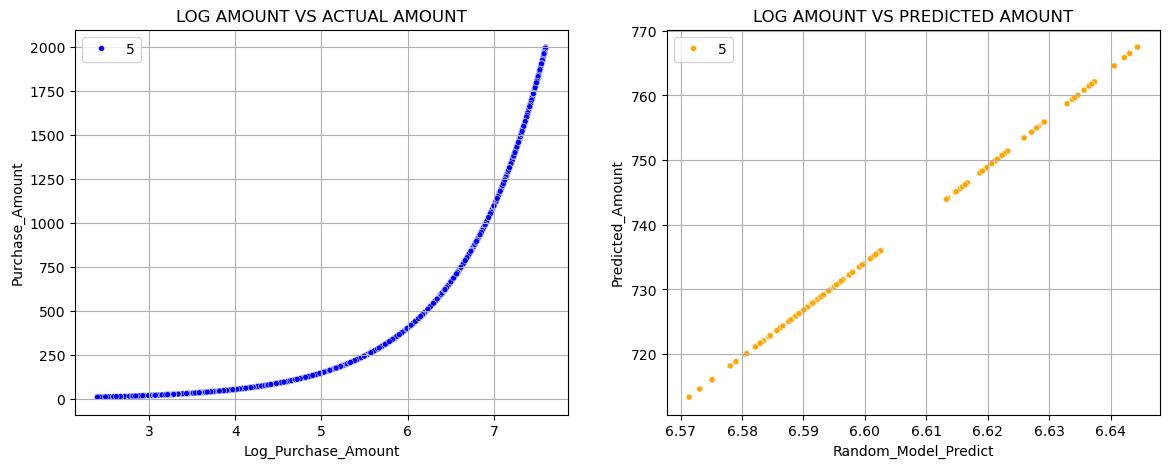

In [616]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(data=ecommerce_check_data_4,
               x=ecommerce_check_data_4['Log_Purchase_Amount'],
               y=ecommerce_check_data_4['Purchase_Amount'],color='blue',size=5)
plt.grid()
plt.title('LOG AMOUNT VS ACTUAL AMOUNT')

plt.subplot(1,2,2)
sns.scatterplot(data=ecommerce_check_data_4,
               x=ecommerce_check_data_4['Random_Model_Predict'],
               y=ecommerce_check_data_4['Predicted_Amount'],color='orange',size=5)
plt.grid()
plt.title('LOG AMOUNT VS PREDICTED AMOUNT')
plt.show()

### Executive Summary :-

1. Strong non-linear growth captured:-
   * The Log Amount vs Actual Amount plot shows an exponential relationship, confirming that log transformation effectively stabilizes variance and represents rapid growth in higher purchase amounts.
3. Predictions are consistent but compressed:-
   * The Log Amount vs Predicted Amount plot indicates predictions follow a clear linear trend, but within a narrow range—suggesting the model captures direction well but slightly underestimates extreme values.
5. Model reliability improved with log transformation:-
   * Overall alignment between log-scaled inputs and predictions shows improved learning behavior, reduced skewness impact, and better suitability of the model for purchase amount forecasting.

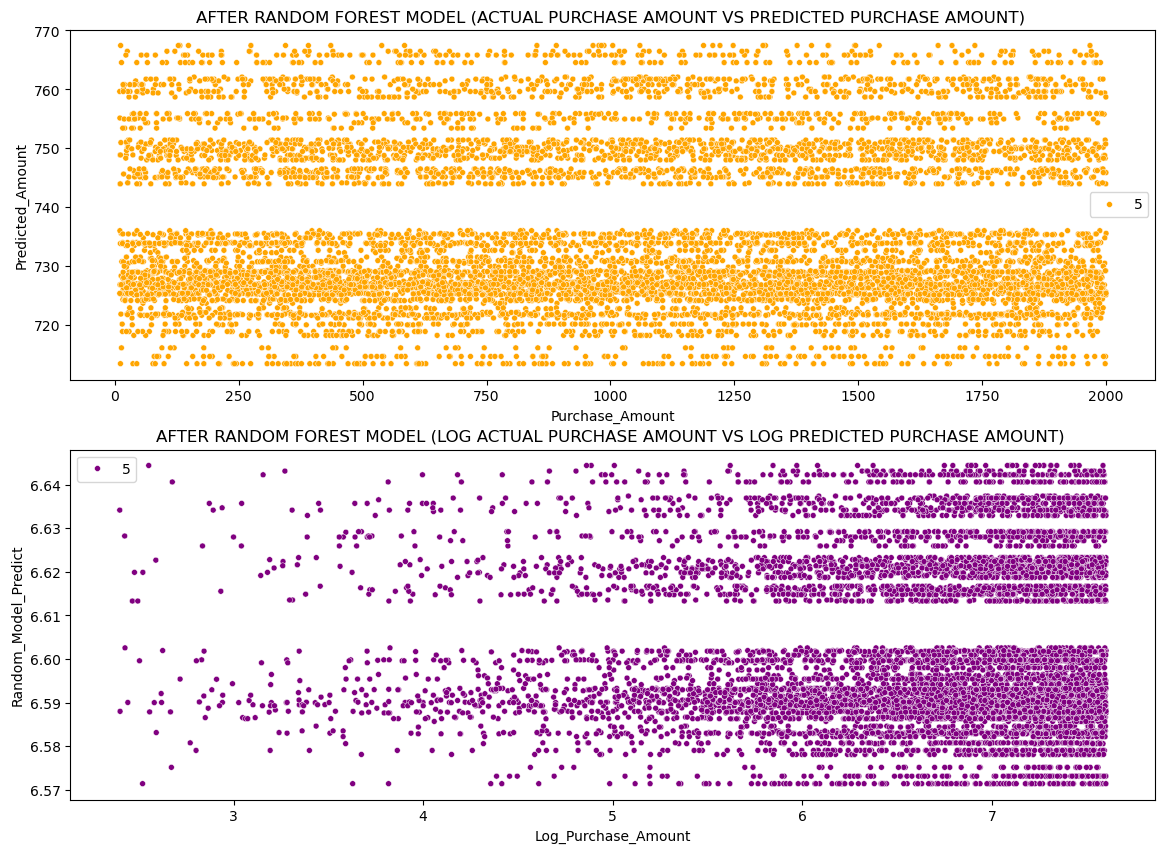

In [618]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
sns.scatterplot(data=ecommerce_check_data_4,
               x=ecommerce_check_data_4['Purchase_Amount'],
               y=ecommerce_check_data_4['Predicted_Amount'],color='orange',size=5)
plt.title('AFTER RANDOM FOREST MODEL (ACTUAL PURCHASE AMOUNT VS PREDICTED PURCHASE AMOUNT) ')

plt.subplot(2,1,2)
sns.scatterplot(data=ecommerce_check_data_4,
               x=ecommerce_check_data_4['Log_Purchase_Amount'],
               y=ecommerce_check_data_4['Random_Model_Predict'],color='purple',size=5)
plt.title('AFTER RANDOM FOREST MODEL (LOG ACTUAL PURCHASE AMOUNT VS LOG PREDICTED PURCHASE AMOUNT) ')
plt.show()

### Executive Summary :-

1. Prediction saturation in original scale:-
   * The Actual vs Predicted Purchase Amount plot shows horizontal bands, meaning the Random Forest predicts within limited value ranges. This indicates averaging behavior and difficulty in capturing extreme high or low purchase amounts.
3. Improved structure in log scale, but limited spread:-
   * In the Log Actual vs Log Predicted plot, predictions align more systematically with actual values, confirming that log transformation improves learning stability—however, the narrow prediction range suggests underfitting.
5. Model captures trend, not variability:-
   * Overall, the model learns the general purchase-level trend but fails to reflect true variance, especially for higher purchases, highlighting the need for deeper trees, hyperparameter tuning, or alternative models (e.g., Gradient Boosting/XGBoost).

## 12. THANK YOU FOR YOUR TIME

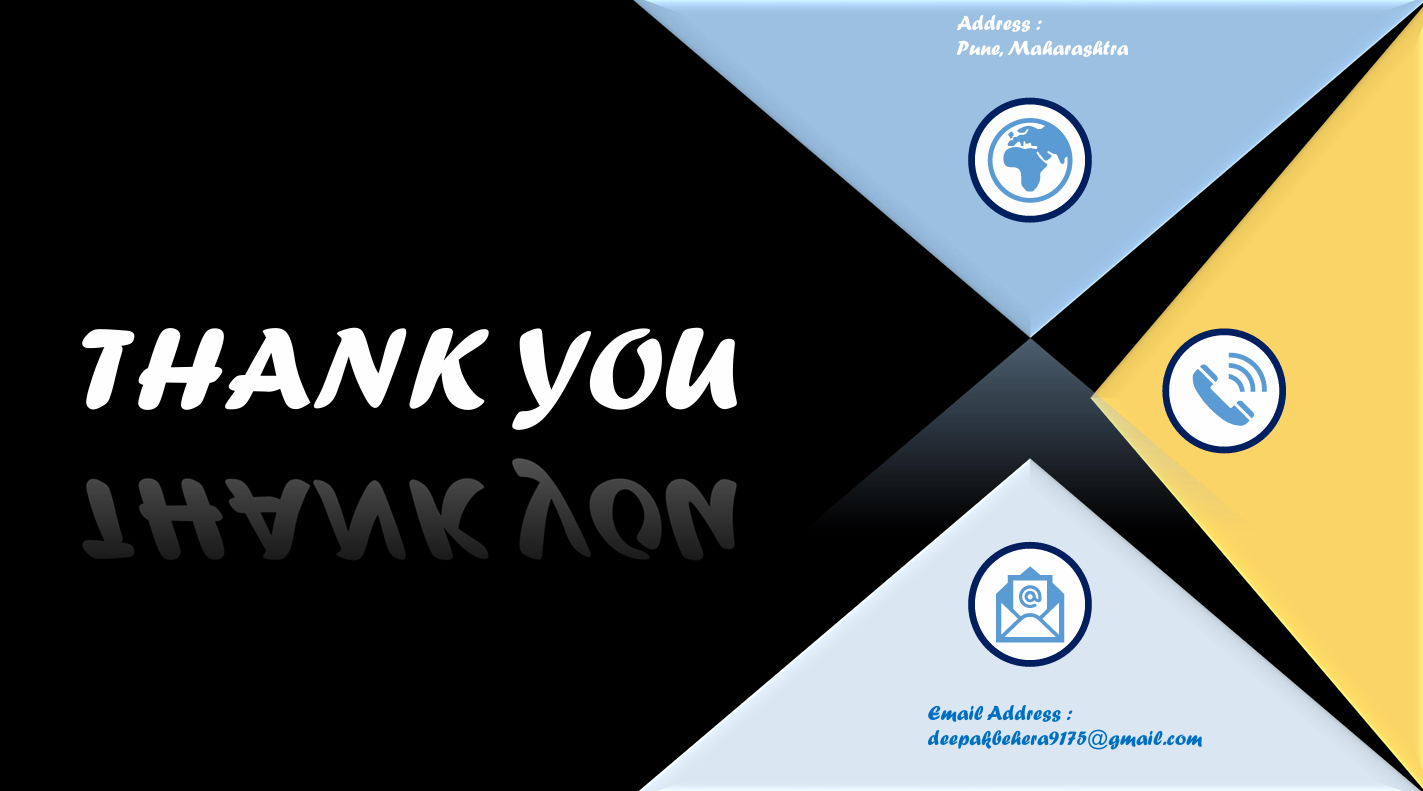

In [624]:
Image('C:\\Users\\Admin\\OneDrive\\Desktop\\Global E-Commerce Data Analysis\\Thank You Picture.png')